# **1.  라이브러리 import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

# **2. 데이터 준비**

- CRIM: 도시별 1인당 범죄율
- ZN: 25,000 피트를 초과하는 주거용 토지의 비율
- INDUS: 비상업 면적의 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 주택당 평균 방의 개수
- AGE: 1940년 이전에 건축된 자가주택의 비율
- DIS: 5개의 보스턴 고용 센터와의 거리
- RAD: 고속도로 접근성 지수
- TAX: 10,000달러당 재산세율
- PTRATIO: 도시별 교사와 학생 수 비율
- B: 마을의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값, 단위: 천달러) --- target 데이터

### **2-1. 학습용 데이터 준비**

In [2]:
### 데이터 불러오기

train = pd.read_csv('./datasets/train.csv')
train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5


In [3]:
### 학습용 데이터 수 확인

len(train)

455

In [4]:
### 데이터 정보 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       455 non-null    object 
 1   CRIM     455 non-null    float64
 2   ZN       455 non-null    float64
 3   INDUS    455 non-null    float64
 4   CHAS     455 non-null    float64
 5   NOX      455 non-null    float64
 6   RM       455 non-null    float64
 7   AGE      455 non-null    float64
 8   DIS      455 non-null    float64
 9   RAD      455 non-null    float64
 10  TAX      455 non-null    float64
 11  PTRATIO  455 non-null    float64
 12  B        455 non-null    float64
 13  LSTAT    455 non-null    float64
 14  MEDV     455 non-null    float64
dtypes: float64(14), object(1)
memory usage: 53.4+ KB


- 데이터 세트 feature의 null값은 존재하지 않음
- ID를 제외한 모든 컬럼이 float형임

In [5]:
### 데이터 통계치 확인

train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.659998,11.165934,11.092747,0.065934,0.555160,6.285352,68.320440,3.788439,9.551648,407.892308,18.453846,356.285714,12.604967,22.574725
std,8.888075,22.953757,6.821697,0.248440,0.116524,0.699346,27.893807,2.082031,8.718624,169.446805,2.149137,92.664335,7.090388,9.120759
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079230,0.000000,5.160000,0.000000,0.449000,5.881000,44.700000,2.100350,4.000000,278.000000,17.400000,375.990000,6.970000,17.100000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.208000,76.700000,3.199200,5.000000,330.000000,19.000000,391.700000,11.280000,21.200000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.627000,93.850000,5.164950,24.000000,666.000000,20.200000,396.375000,16.695000,25.100000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


- 데이터 간의 스케일 차이가 상당함을 확인할 수 있다.

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

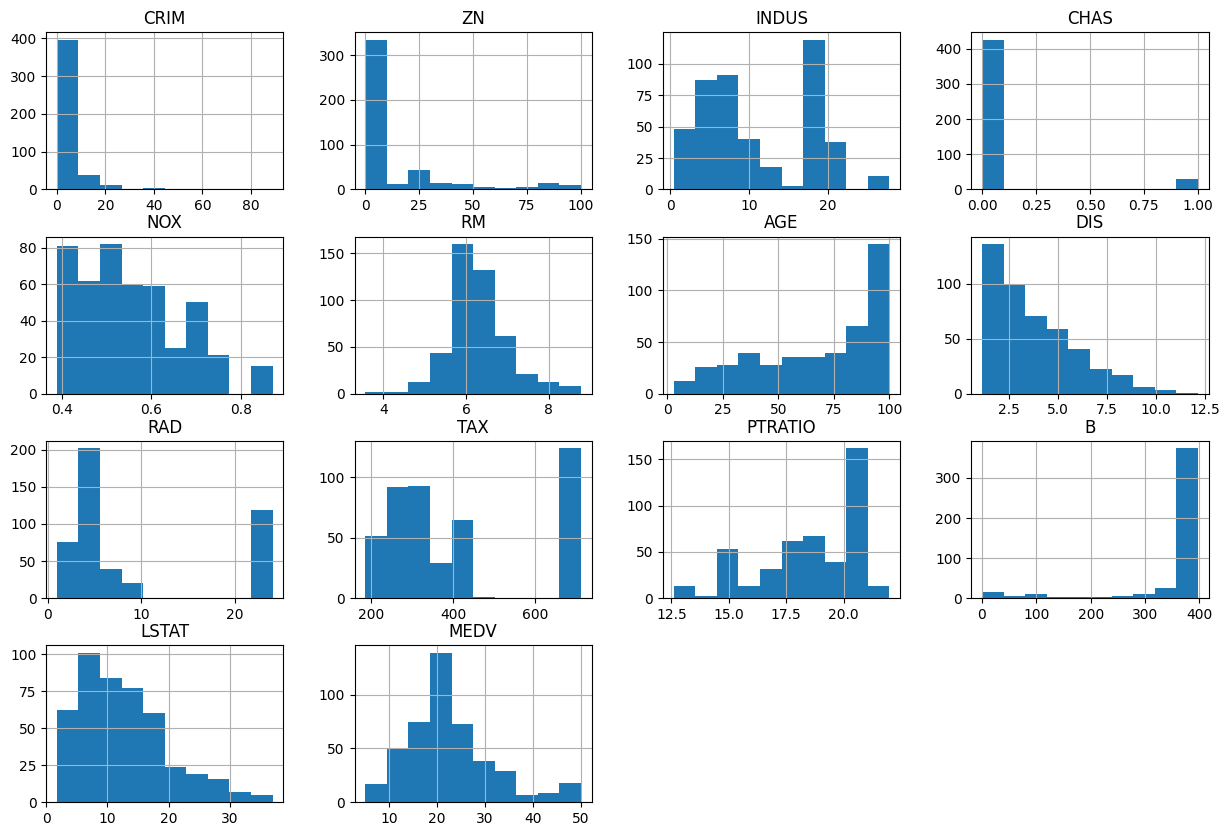

In [6]:
### 데이터 분포 확인

fig = plt.figure(figsize = (15,10))
ax = fig.gca()
train.hist(ax = ax)

- 데이터 간의 왜곡 정도가 상당함을 확인할 수 있다.

In [7]:
X = train.drop(columns=['ID', 'MEDV']) # ID 컬럼의 경우 불필요하므로 제거
y = train['MEDV'] 

In [8]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.1,random_state = 0)

# train: 학습에 사용할 훈련용 데이터
# valid: 학습 결과 평가에 사용할 테스트용 데이터

In [9]:
X_train.shape, X_valid.shape

((409, 13), (46, 13))

In [10]:
X_train.head(3) # feature data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
340,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
448,0.34109,0.0,7.38,0.0,0.493,6.415,40.1,4.7211,5.0,287.0,19.6,396.90,6.12


In [11]:
X_valid.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
354,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
60,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80
293,0.08308,0.0,2.46,0.0,0.488,5.604,89.8,2.9879,3.0,193.0,17.8,391.00,13.98


In [12]:
y_train.shape, y_valid.shape

((409,), (46,))

In [13]:
y_train.head(3) # target data

141    28.0
340    24.7
448    25.0
Name: MEDV, dtype: float64

In [14]:
y_valid.head(3)

354    37.3
60     18.4
293    26.4
Name: MEDV, dtype: float64

### **2-2. 예측용 데이터 준비**
- 정답(target data)가 없는 데이터

In [15]:
### 데이터 불러오기

test = pd.read_csv("./datasets/test.csv")
test = test.drop(columns = ['ID']) # ID 컬럼의 경우 불필요하므로 제거
test.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92
1,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
2,5.44114,0.0,18.10,0.0,0.713,6.655,98.2,2.3552,24.0,666.0,20.2,355.29,17.73


In [16]:
### 예측용 데이터 수 확인

len(test)

51

In [17]:
### 데이터 정보 확인

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     51 non-null     float64
 1   ZN       51 non-null     float64
 2   INDUS    51 non-null     float64
 3   CHAS     51 non-null     float64
 4   NOX      51 non-null     float64
 5   RM       51 non-null     float64
 6   AGE      51 non-null     float64
 7   DIS      51 non-null     float64
 8   RAD      51 non-null     float64
 9   TAX      51 non-null     float64
 10  PTRATIO  51 non-null     float64
 11  B        51 non-null     float64
 12  LSTAT    51 non-null     float64
dtypes: float64(13)
memory usage: 5.3 KB


- 결측치는 존재하지 않음을 확인할 수 있다.

# **3. 데이터 전처리**

### **StandardScaler**
- 분석 시 변수들의 스케일이 다른 경우 컬럼 별 단위 또는 범위를 통일시켜주기 위해 표준화를 수행
- 표준화: 데이터 값들을 평균이 0이고 분산이 1인 정규 분포로 만드는 것

In [18]:
from sklearn.preprocessing import StandardScaler

### StandardScaler 객체 생성
scaler = StandardScaler()

### 학습 데이터에 대해서만 fit(), transform() 수행
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

### 테스트 데이터 스케일링
# 학습할 때와 동일한 기반 설정으로 동일하게 테스트 데이터를 변환해야 함
# 테스트 데이터에서는 transform만 수행
scaled_X_valid = scaler.transform(X_valid)

### 예측용 데이터 스케일링
scaled_test = scaler.transform(test)

In [19]:
### 학습용 데이터

pd.DataFrame(scaled_X_train,columns = X_train.columns).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.401507,0.588942,-0.912798,-0.276253,-1.103629,0.608020,-1.253647,0.776612,-0.633338,-0.755190,0.265600,0.445919,-1.022478
1,-0.388418,-0.498933,-0.613894,-0.276253,-0.916244,-0.126920,-2.222987,0.929976,-0.748464,-1.039756,-0.237742,0.419267,-0.724799
2,-0.368300,-0.498933,-0.545365,-0.276253,-0.532955,0.163638,-1.016697,0.451109,-0.518211,-0.719619,0.540150,0.445919,-0.907560


In [20]:
### 평가용 데이터

pd.DataFrame(scaled_X_valid,columns = X_valid.columns).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.397330,2.982266,-0.899676,-0.276253,-1.231392,1.207651,-1.461875,0.640587,-0.633338,-0.968614,0.357116,0.445919,-1.262006
1,-0.320487,-0.498933,-0.434551,-0.276253,-0.149667,0.277582,0.932754,0.323513,-0.633338,-0.601050,1.180766,0.348049,0.017322
2,-0.396863,-0.498933,-1.262735,-0.276253,-0.575543,-0.991470,0.767607,-0.379029,-0.748464,-1.276894,-0.283500,0.381473,0.180700


In [21]:
### 예측용 데이터

pd.DataFrame(scaled_test,columns = test.columns).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.393806,-0.498933,0.403839,3.619869,-0.047457,-0.497238,0.911213,-0.426255,-0.518211,-0.784832,-0.924117,0.445919,0.726214
1,0.317809,-0.498933,1.017687,3.619869,0.642463,1.019643,1.044049,-1.234218,1.669196,1.527266,0.814700,0.392943,-1.345080
2,0.196298,-0.498933,1.017687,-0.276253,1.340900,0.505470,1.069180,-0.682069,1.669196,1.527266,0.814700,-0.008589,0.699908


- 표준화가 제대로 진행된 것을 확인할 수 있다.

# **4. 평가 지표 만들기**

### **4-1. MSE(Mean Squared Error)**
- 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값
- ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

### **4-2. MAE(Mean Absolute Error)**
- 예측값과 실제값의 차이에 대한 절대값에 대하여 평균을 낸 값
- $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

### **4-3. RMSE(Root Mean Squared Error)**
- 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 후 루트를 씌운 값
- $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

In [22]:
### 모델별 성능 확인을 위한 함수

my_predictions = {} # 예측값을 저장할 빈 딕셔너리

### 예측 결과 시각화
def plot_predictions(name_,pred,actual): # model, 예측값, 실제값
    df = pd.DataFrame({'prediction' : pred,'actual' : y_valid})
    df = df.sort_values(by = 'actual').reset_index(drop = True) # 실제값 기준 오름차순 정렬
    
    plt.figure(figsize = (12,9))
    plt.scatter(df.index,df['prediction'],marker = 'x',color = 'r')
    plt.scatter(df.index,df['actual'],alpha = 0.7,marker = 'o',color = 'black')
    plt.title(name_,fontsize = 15)
    plt.legend(['prediction','actual'],fontsize = 12)
    plt.show()

### rmse(mean squared error) 계산    
def rmse_eval(name_,pred,actual):
    global my_predictions # 예측값
    global colors # 색상값
    
    ### 예측 결과 시각화
    plot_predictions(name_,pred,actual) 
    print()
    
    ### 모델별 rmse 계산
    rmse = np.sqrt(mean_squared_error(pred,actual)) # rmse 계산
    my_predictions[name_] = rmse
    y_value = sorted(my_predictions.items(),key = lambda x: x[1]) # 오름차순 정렬
    df = pd.DataFrame(y_value, columns = ['model','rmse'])
    print(df)

# **5. 모델링**

### **5-0. Model Hyperparameter Setting**
- 대부분의 모델들은 사람이 직접 설정할 수 있는 **hyper parameter**를 가지고 있음
- hyper parameter에 어떤 값이 설정되는가에 따라 모델의 성능은 크게 차이나게 된다.

### **5-1. LinearRegression**
- 선형 회귀
- 실제값과 예측값의 RSS(Residual Sum of Squares)를 최소화 해 OLS(Ordinary Least Squares) 추정 방식으로 구현
- 규제를 적용하지 **않은** 모델

In [23]:
### 모델 객체 생성

lr_model = LinearRegression(n_jobs = -1) # CPU Core를 있는 대로 모두 사용하겠다~

In [24]:
### 모델 학습

lr_model.fit(scaled_X_train,y_train) 

LinearRegression(n_jobs=-1)

In [25]:
### 예측

lr_pred_val = lr_model.predict(scaled_X_valid)

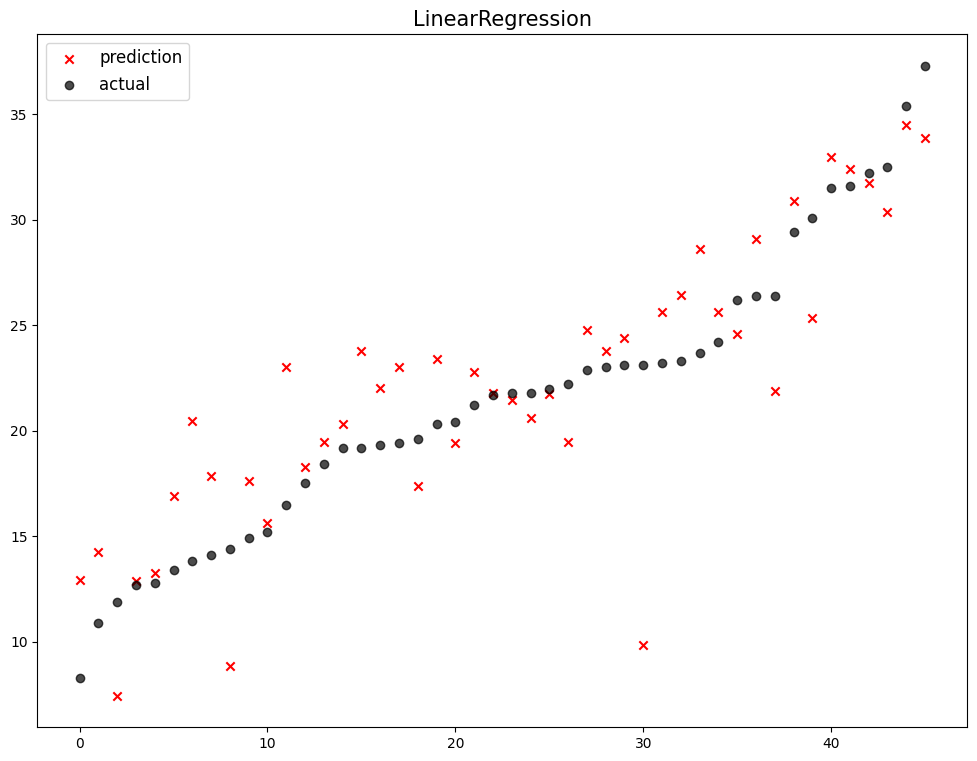


              model      rmse
0  LinearRegression  3.535198


In [26]:
### 평가

rmse_eval('LinearRegression',lr_pred_val,y_valid) # model, 예측값, 실제값

### **5-2. 라쏘(Lasso)**

In [27]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

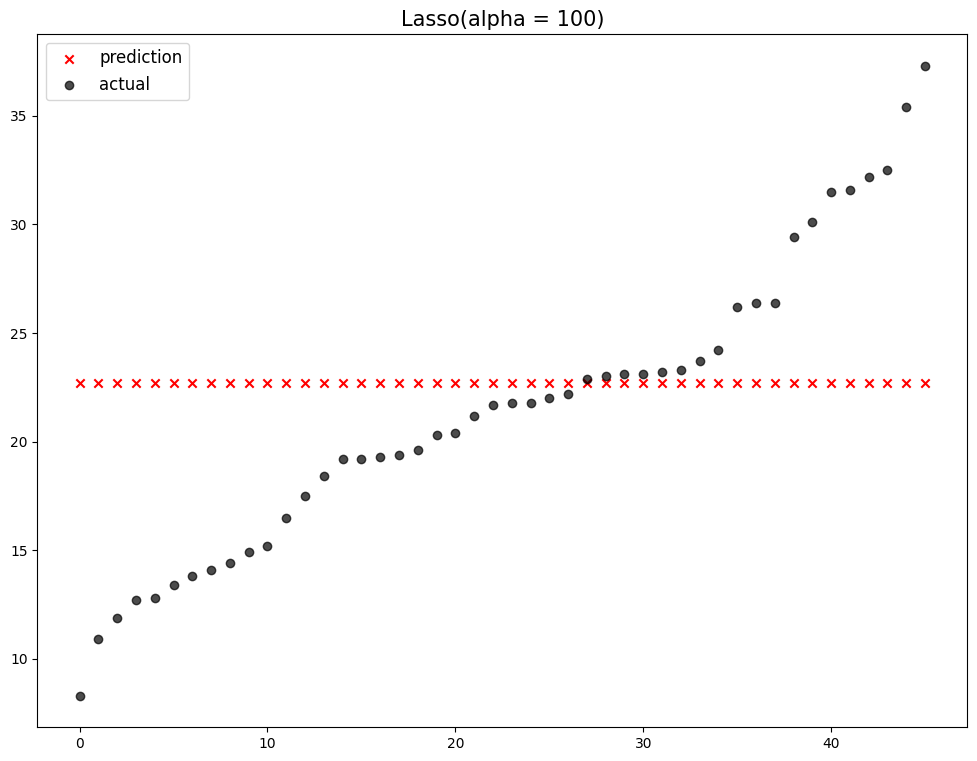


                model      rmse
0    LinearRegression  3.535198
1  Lasso(alpha = 100)  6.764249


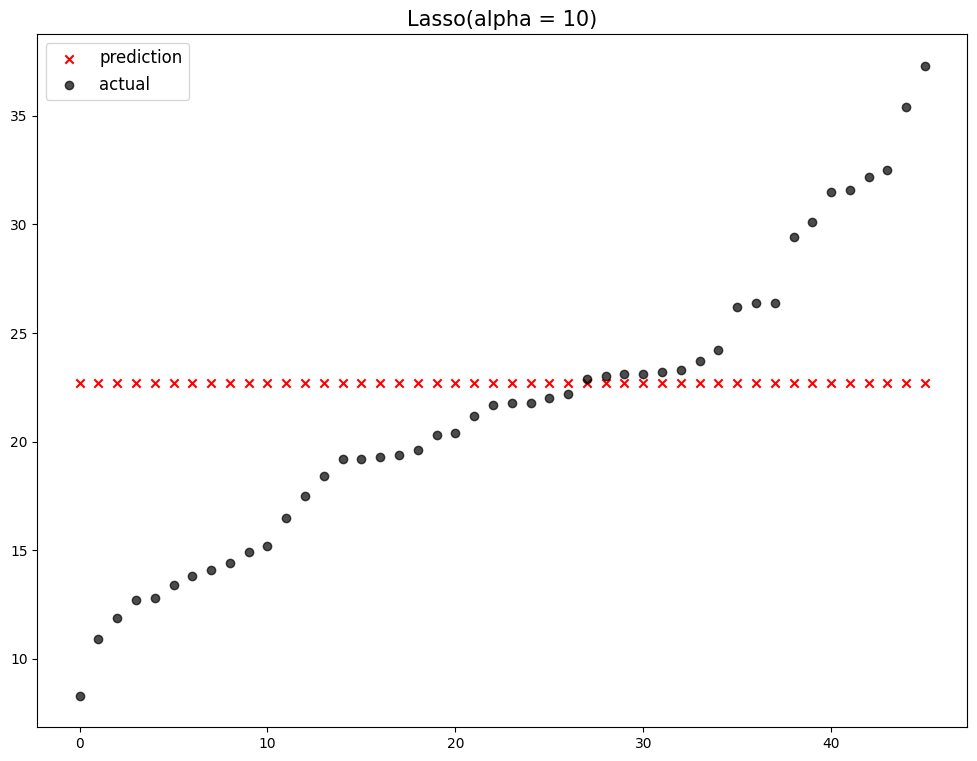


                model      rmse
0    LinearRegression  3.535198
1  Lasso(alpha = 100)  6.764249
2   Lasso(alpha = 10)  6.764249


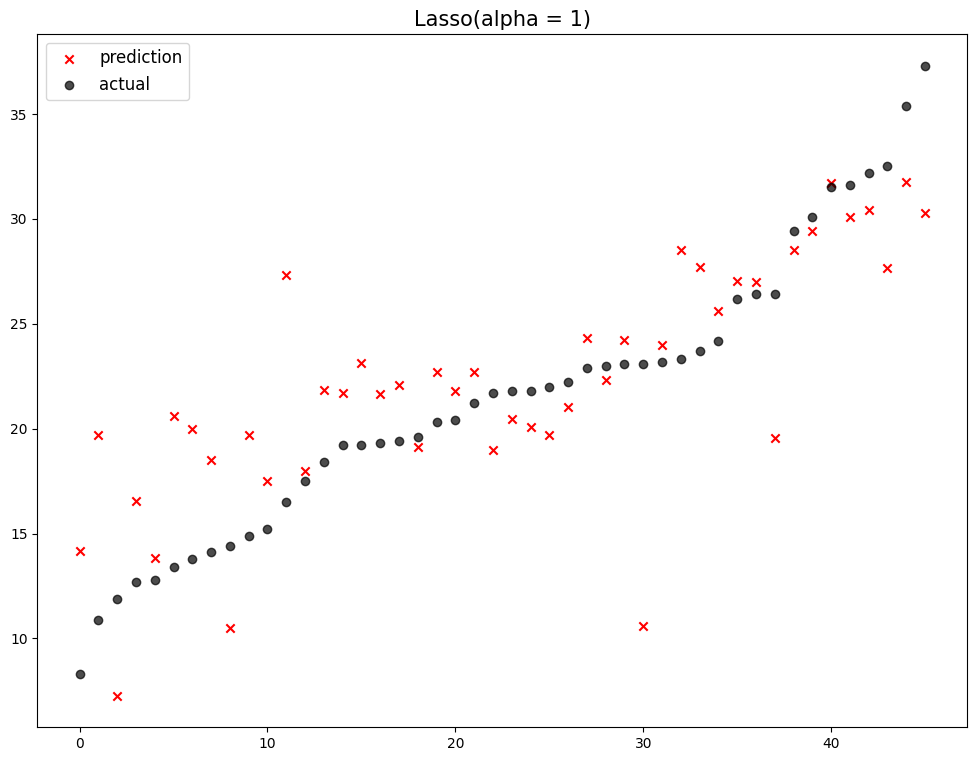


                model      rmse
0    LinearRegression  3.535198
1    Lasso(alpha = 1)  4.279703
2  Lasso(alpha = 100)  6.764249
3   Lasso(alpha = 10)  6.764249


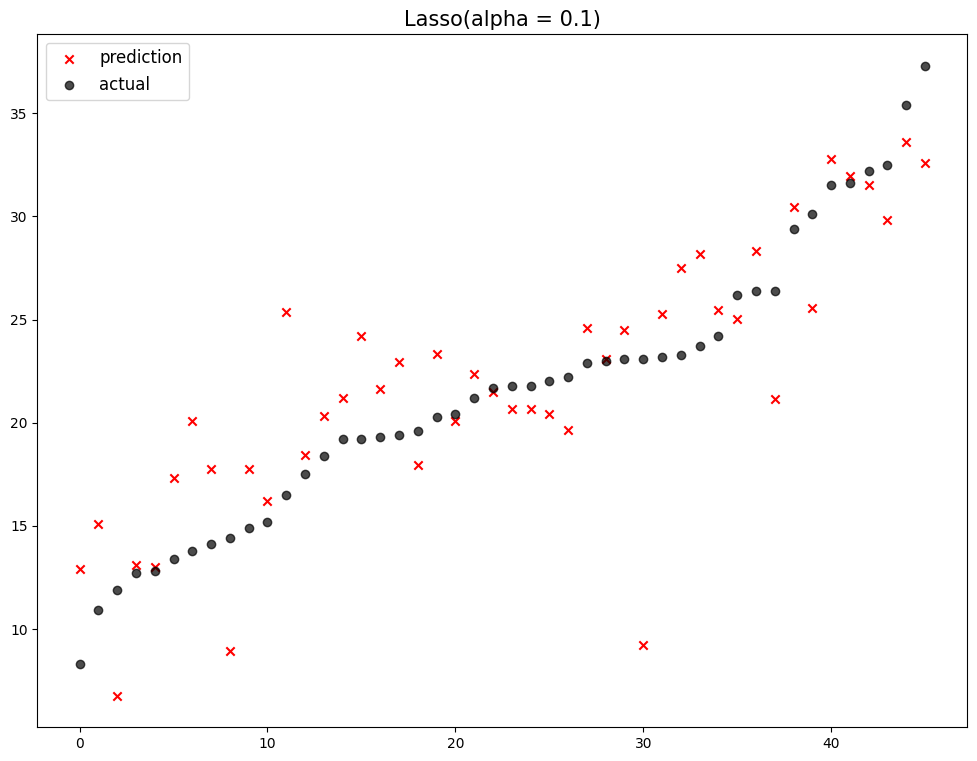


                model      rmse
0    LinearRegression  3.535198
1  Lasso(alpha = 0.1)  3.783762
2    Lasso(alpha = 1)  4.279703
3  Lasso(alpha = 100)  6.764249
4   Lasso(alpha = 10)  6.764249


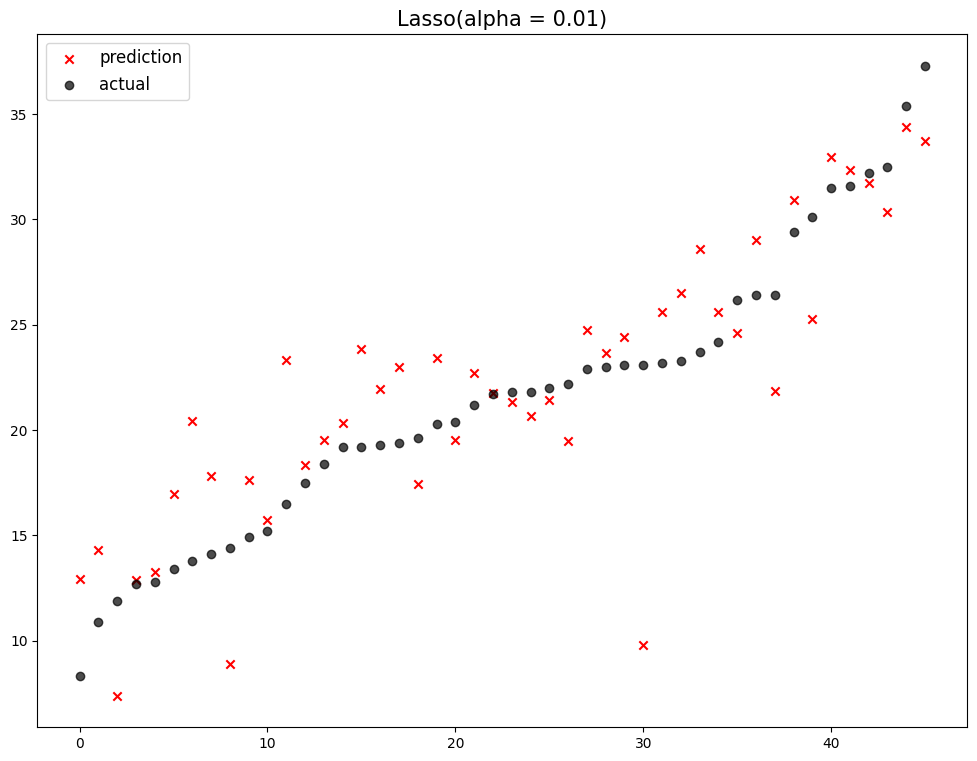


                 model      rmse
0     LinearRegression  3.535198
1  Lasso(alpha = 0.01)  3.560248
2   Lasso(alpha = 0.1)  3.783762
3     Lasso(alpha = 1)  4.279703
4   Lasso(alpha = 100)  6.764249
5    Lasso(alpha = 10)  6.764249


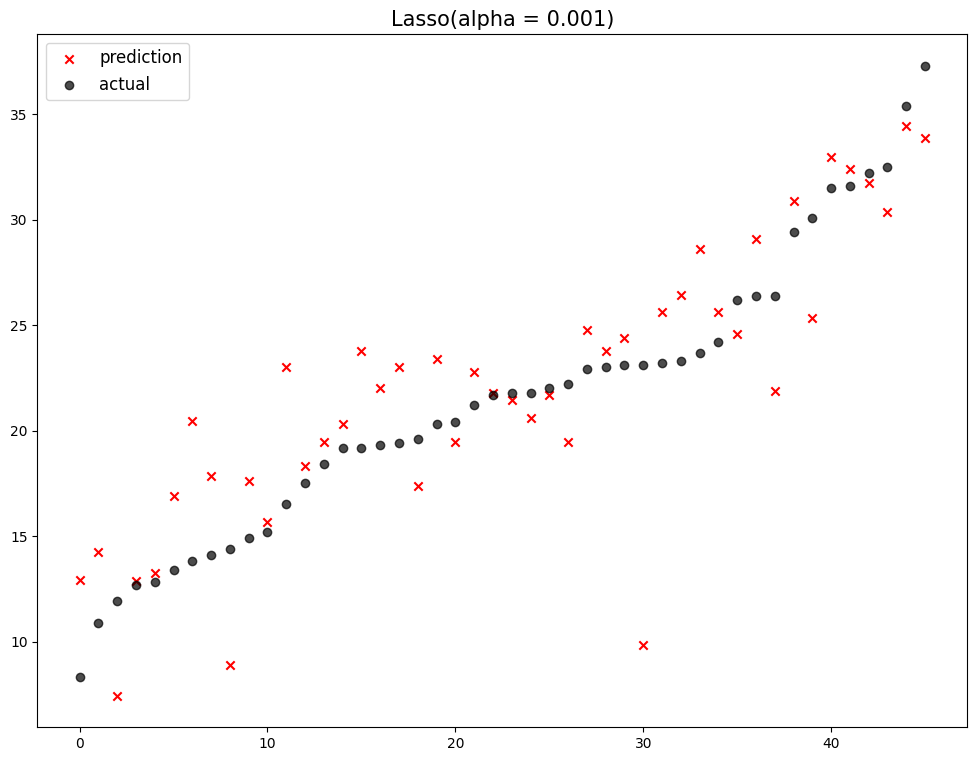


                  model      rmse
0      LinearRegression  3.535198
1  Lasso(alpha = 0.001)  3.537604
2   Lasso(alpha = 0.01)  3.560248
3    Lasso(alpha = 0.1)  3.783762
4      Lasso(alpha = 1)  4.279703
5    Lasso(alpha = 100)  6.764249
6     Lasso(alpha = 10)  6.764249


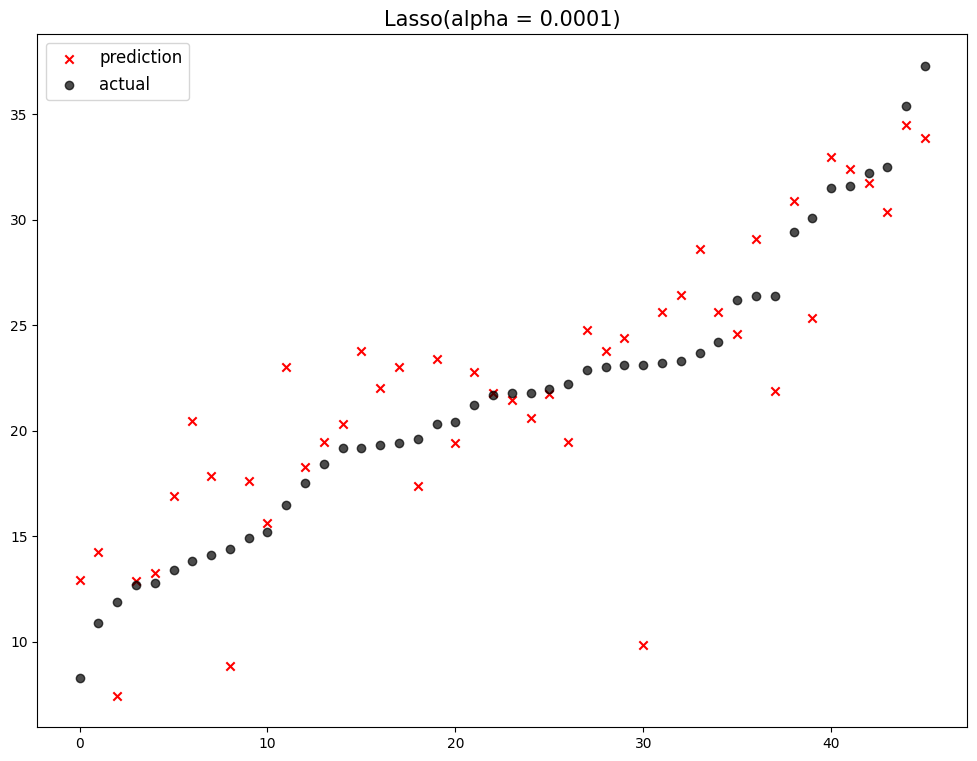


                   model      rmse
0       LinearRegression  3.535198
1  Lasso(alpha = 0.0001)  3.535439
2   Lasso(alpha = 0.001)  3.537604
3    Lasso(alpha = 0.01)  3.560248
4     Lasso(alpha = 0.1)  3.783762
5       Lasso(alpha = 1)  4.279703
6     Lasso(alpha = 100)  6.764249
7      Lasso(alpha = 10)  6.764249


In [28]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    lasso = Lasso(alpha = alpha) # 모델 객체 생성
    lasso.fit(scaled_X_train,y_train) # 학습
    pred = lasso.predict(scaled_X_valid) # 예측
    rmse_eval('Lasso(alpha = {})'.format(alpha),pred,y_valid) # 평가 & 시각화

### **5-3. Ridge(Baseline에 제시된 모형)**

In [29]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

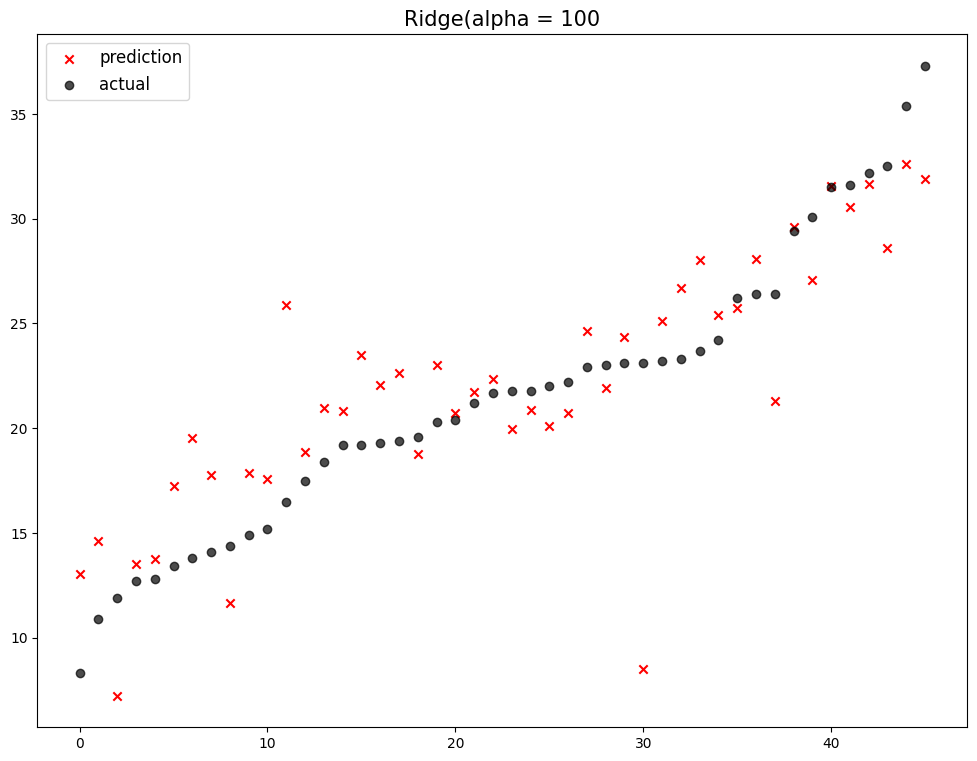


                   model      rmse
0       LinearRegression  3.535198
1  Lasso(alpha = 0.0001)  3.535439
2   Lasso(alpha = 0.001)  3.537604
3    Lasso(alpha = 0.01)  3.560248
4      Ridge(alpha = 100  3.740402
5     Lasso(alpha = 0.1)  3.783762
6       Lasso(alpha = 1)  4.279703
7     Lasso(alpha = 100)  6.764249
8      Lasso(alpha = 10)  6.764249


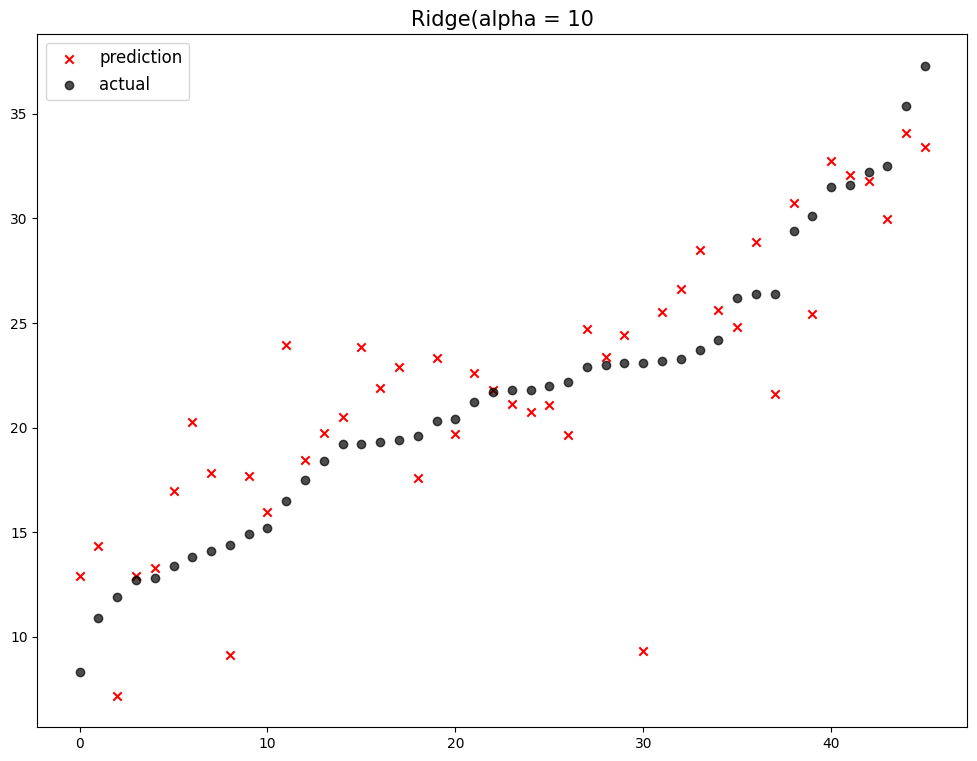


                   model      rmse
0       LinearRegression  3.535198
1  Lasso(alpha = 0.0001)  3.535439
2   Lasso(alpha = 0.001)  3.537604
3    Lasso(alpha = 0.01)  3.560248
4       Ridge(alpha = 10  3.617595
5      Ridge(alpha = 100  3.740402
6     Lasso(alpha = 0.1)  3.783762
7       Lasso(alpha = 1)  4.279703
8     Lasso(alpha = 100)  6.764249
9      Lasso(alpha = 10)  6.764249


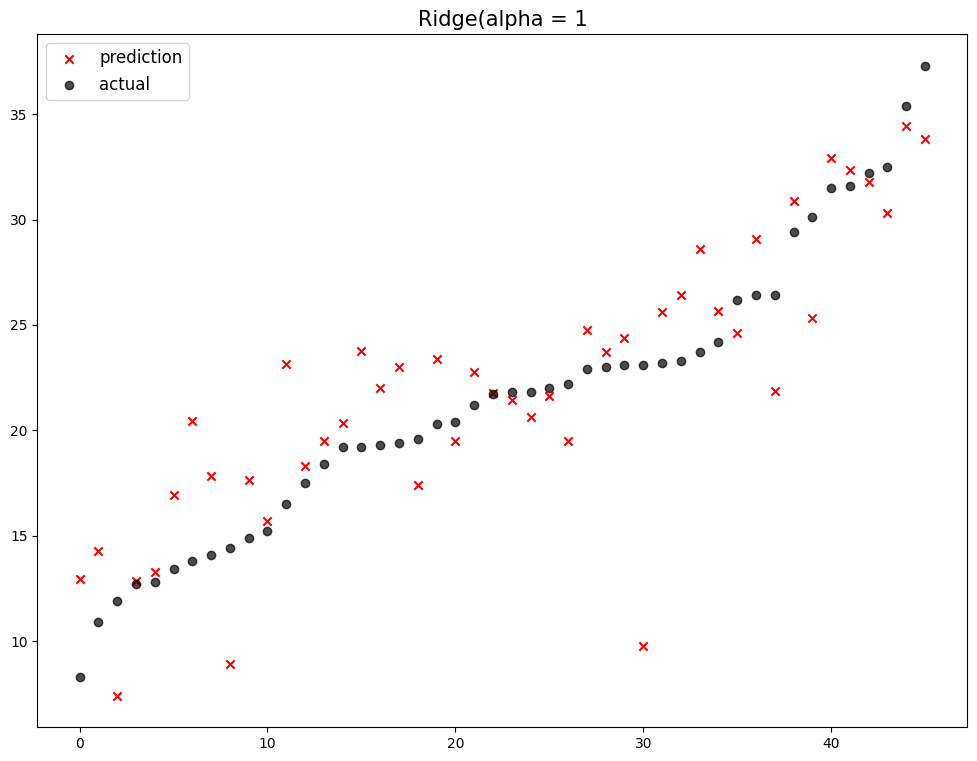


                    model      rmse
0        LinearRegression  3.535198
1   Lasso(alpha = 0.0001)  3.535439
2    Lasso(alpha = 0.001)  3.537604
3         Ridge(alpha = 1  3.545744
4     Lasso(alpha = 0.01)  3.560248
5        Ridge(alpha = 10  3.617595
6       Ridge(alpha = 100  3.740402
7      Lasso(alpha = 0.1)  3.783762
8        Lasso(alpha = 1)  4.279703
9      Lasso(alpha = 100)  6.764249
10      Lasso(alpha = 10)  6.764249


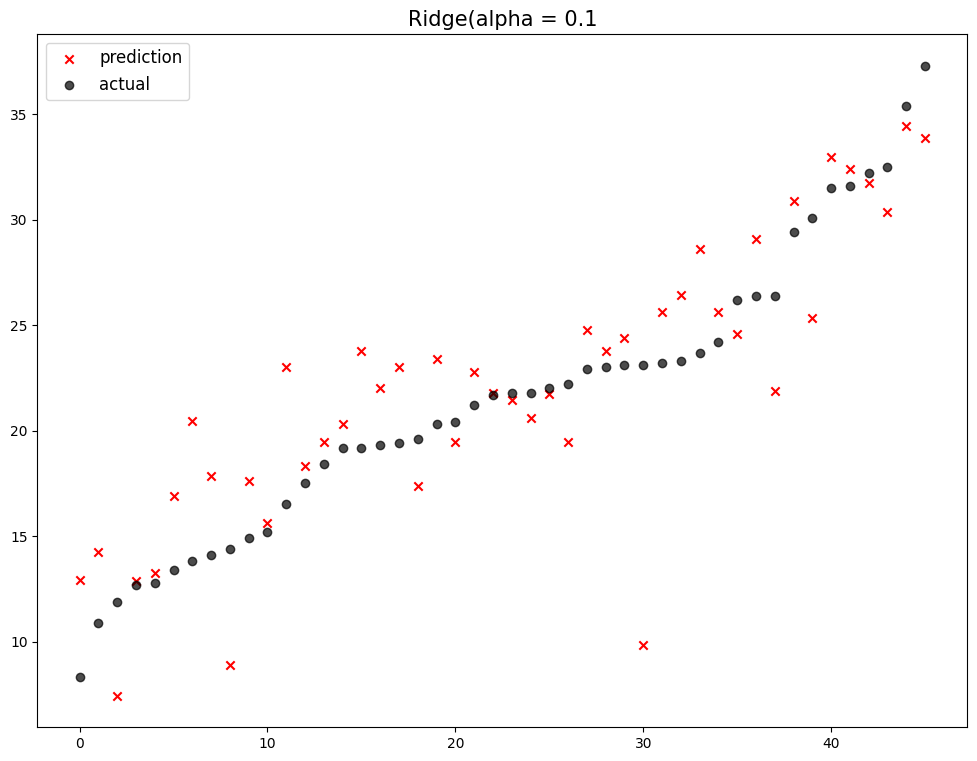


                    model      rmse
0        LinearRegression  3.535198
1   Lasso(alpha = 0.0001)  3.535439
2       Ridge(alpha = 0.1  3.536281
3    Lasso(alpha = 0.001)  3.537604
4         Ridge(alpha = 1  3.545744
5     Lasso(alpha = 0.01)  3.560248
6        Ridge(alpha = 10  3.617595
7       Ridge(alpha = 100  3.740402
8      Lasso(alpha = 0.1)  3.783762
9        Lasso(alpha = 1)  4.279703
10     Lasso(alpha = 100)  6.764249
11      Lasso(alpha = 10)  6.764249


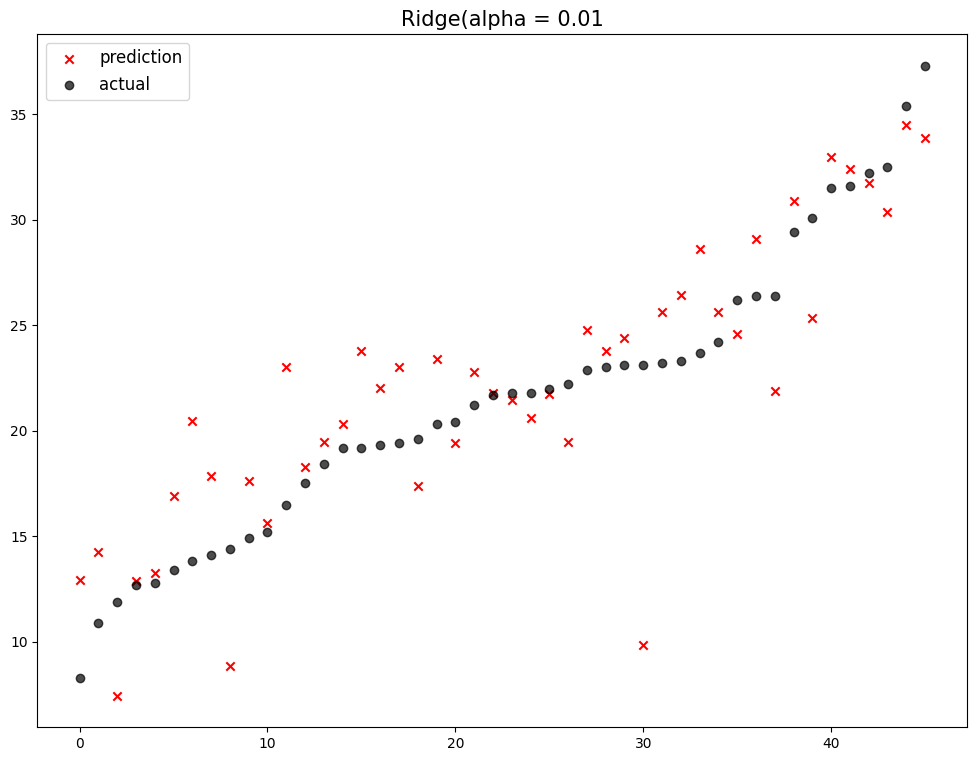


                    model      rmse
0        LinearRegression  3.535198
1      Ridge(alpha = 0.01  3.535306
2   Lasso(alpha = 0.0001)  3.535439
3       Ridge(alpha = 0.1  3.536281
4    Lasso(alpha = 0.001)  3.537604
5         Ridge(alpha = 1  3.545744
6     Lasso(alpha = 0.01)  3.560248
7        Ridge(alpha = 10  3.617595
8       Ridge(alpha = 100  3.740402
9      Lasso(alpha = 0.1)  3.783762
10       Lasso(alpha = 1)  4.279703
11     Lasso(alpha = 100)  6.764249
12      Lasso(alpha = 10)  6.764249


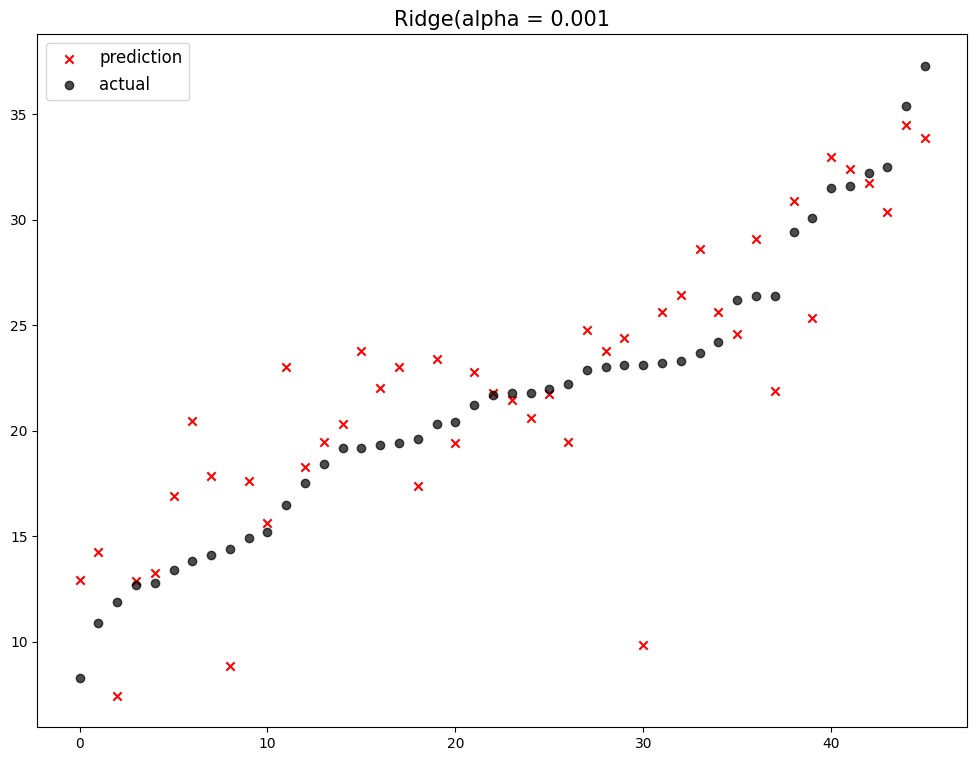


                    model      rmse
0        LinearRegression  3.535198
1     Ridge(alpha = 0.001  3.535208
2      Ridge(alpha = 0.01  3.535306
3   Lasso(alpha = 0.0001)  3.535439
4       Ridge(alpha = 0.1  3.536281
5    Lasso(alpha = 0.001)  3.537604
6         Ridge(alpha = 1  3.545744
7     Lasso(alpha = 0.01)  3.560248
8        Ridge(alpha = 10  3.617595
9       Ridge(alpha = 100  3.740402
10     Lasso(alpha = 0.1)  3.783762
11       Lasso(alpha = 1)  4.279703
12     Lasso(alpha = 100)  6.764249
13      Lasso(alpha = 10)  6.764249


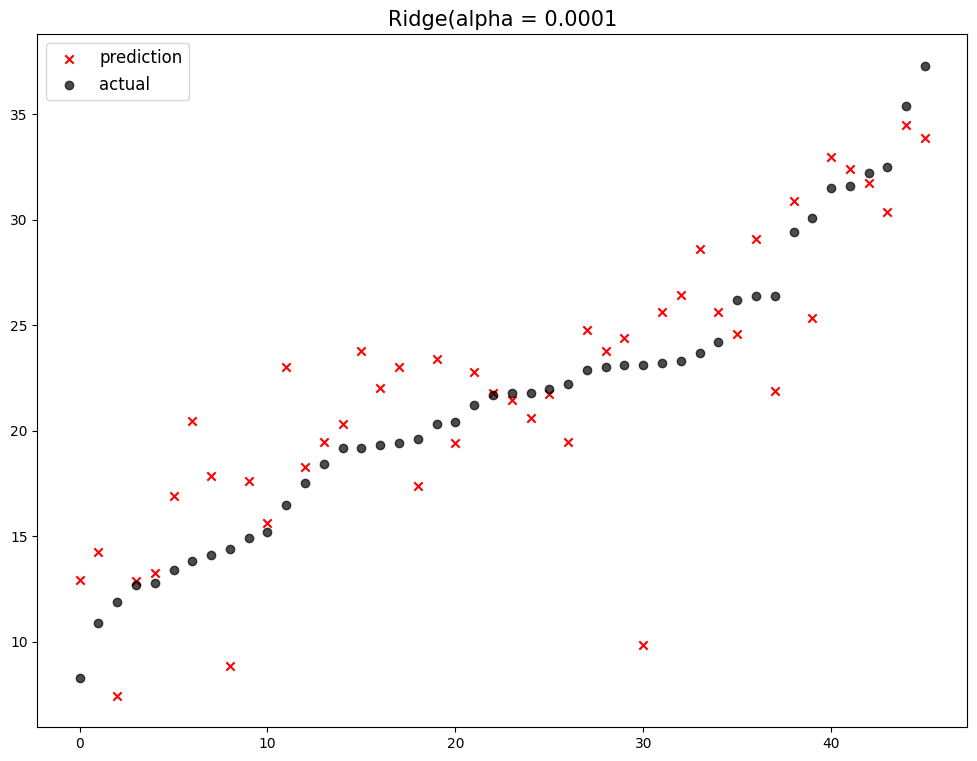


                    model      rmse
0        LinearRegression  3.535198
1    Ridge(alpha = 0.0001  3.535199
2     Ridge(alpha = 0.001  3.535208
3      Ridge(alpha = 0.01  3.535306
4   Lasso(alpha = 0.0001)  3.535439
5       Ridge(alpha = 0.1  3.536281
6    Lasso(alpha = 0.001)  3.537604
7         Ridge(alpha = 1  3.545744
8     Lasso(alpha = 0.01)  3.560248
9        Ridge(alpha = 10  3.617595
10      Ridge(alpha = 100  3.740402
11     Lasso(alpha = 0.1)  3.783762
12       Lasso(alpha = 1)  4.279703
13     Lasso(alpha = 100)  6.764249
14      Lasso(alpha = 10)  6.764249


In [30]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    ridge = Ridge(alpha = alpha) # 모델 객체 생성
    ridge.fit(scaled_X_train, y_train) # 학습
    pred = ridge.predict(scaled_X_valid) # 예측
    rmse_eval('Ridge(alpha = {}'.format(alpha),pred,y_valid) # 평가 & 시각화

### **5-5. 엘라스틱넷(ElasticNet)**
- L1 규제 + L2 규제
- l1_ratio(default = 0.5) 속성: 규제의 정도 조정
  * l1_ratio = 0: L2 규제만 사용
  * l1_ratio = 1: L1 규제만 사용
  * 0 < l1_ratio < 1(L1 and L2 규제를 혼합 사용)

In [31]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정
ratios = [0.2,0.5,0.8] # l1 규제 혼합 비율

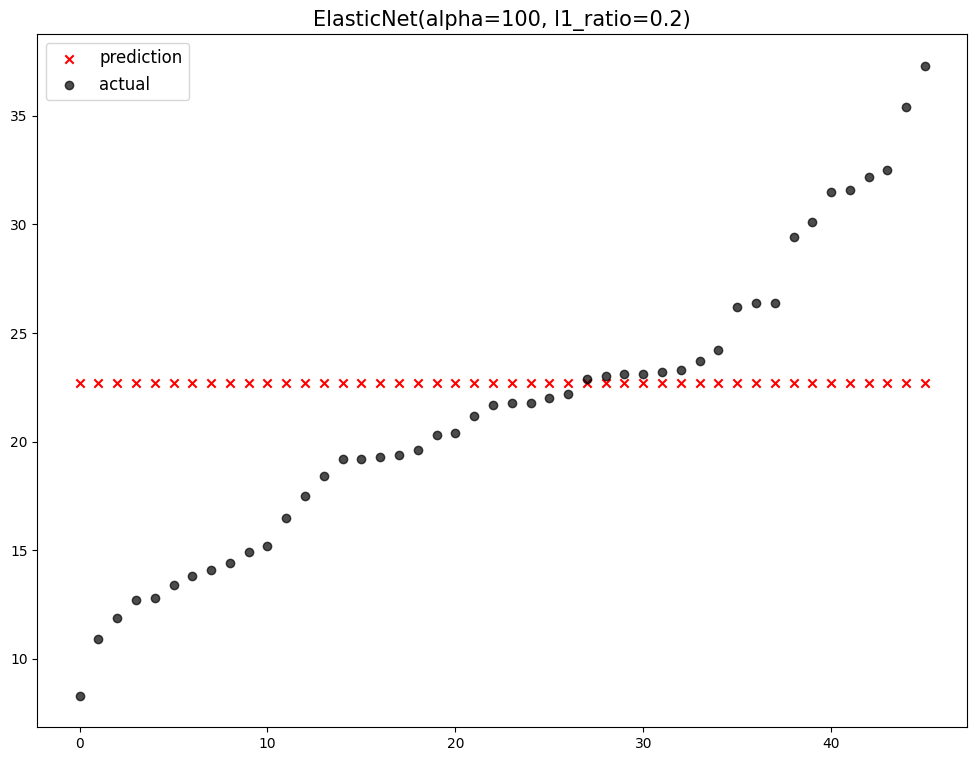


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10                    Ridge(alpha = 100  3.740402
11                   Lasso(alpha = 0.1)  3.783762
12                     Lasso(alpha = 1)  4.279703
13                   Lasso(alpha = 100)  6.764249
14                    Lasso(alpha = 10)  6.764249
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.764249


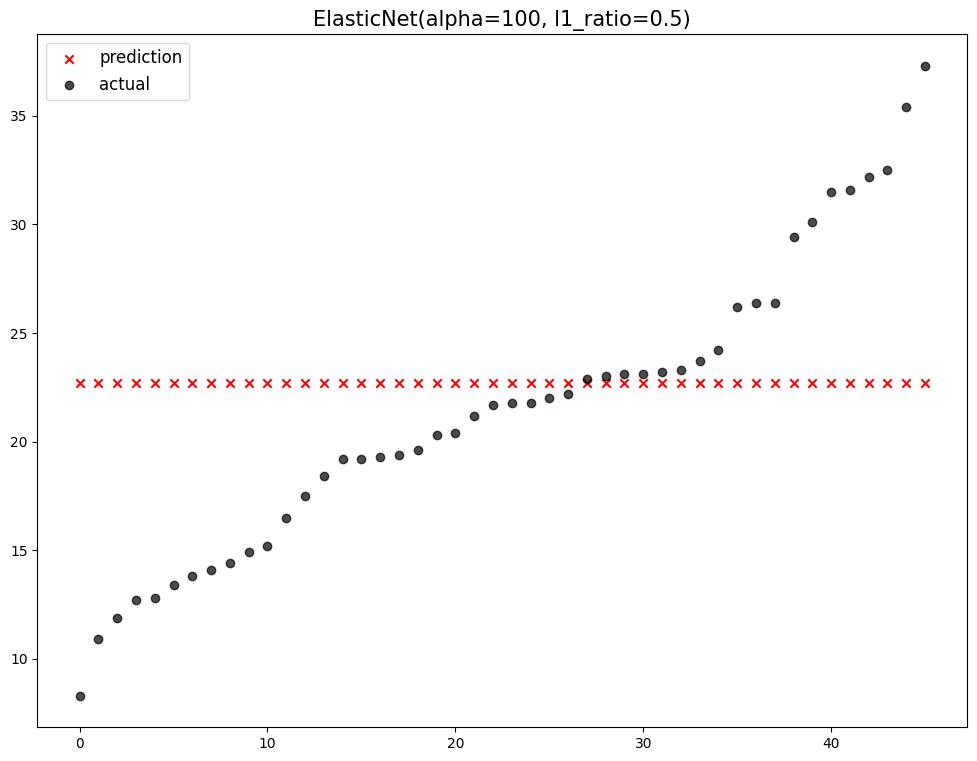


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10                    Ridge(alpha = 100  3.740402
11                   Lasso(alpha = 0.1)  3.783762
12                     Lasso(alpha = 1)  4.279703
13                   Lasso(alpha = 100)  6.764249
14                    Lasso(alpha = 10)  6.764249
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.764249


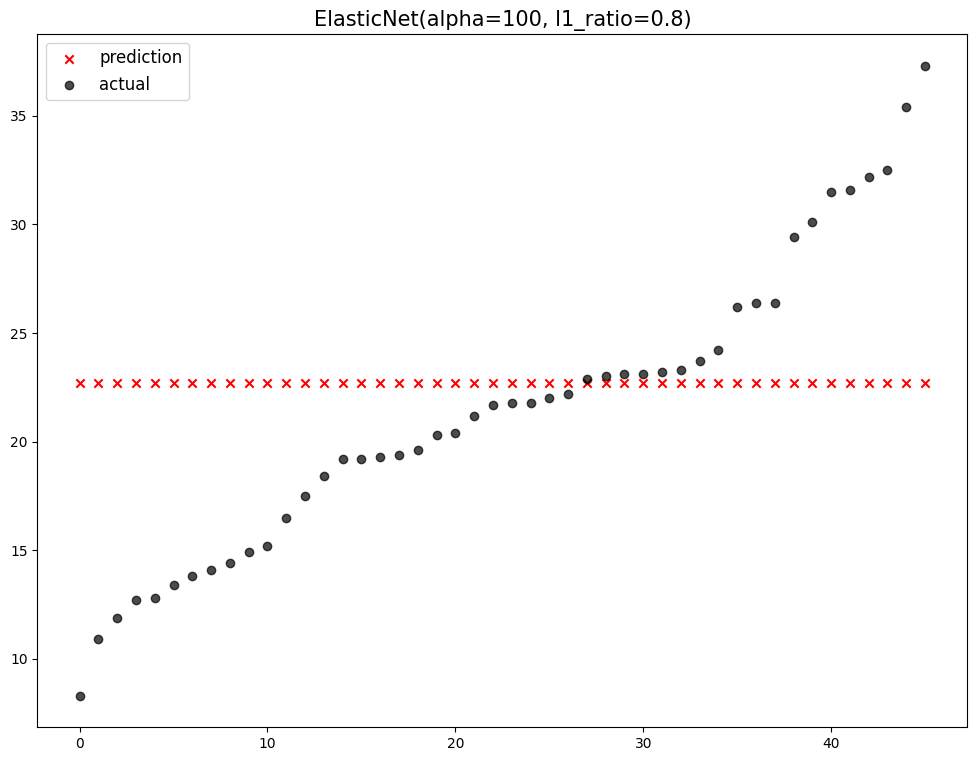


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10                    Ridge(alpha = 100  3.740402
11                   Lasso(alpha = 0.1)  3.783762
12                     Lasso(alpha = 1)  4.279703
13                   Lasso(alpha = 100)  6.764249
14                    Lasso(alpha = 10)  6.764249
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.764249


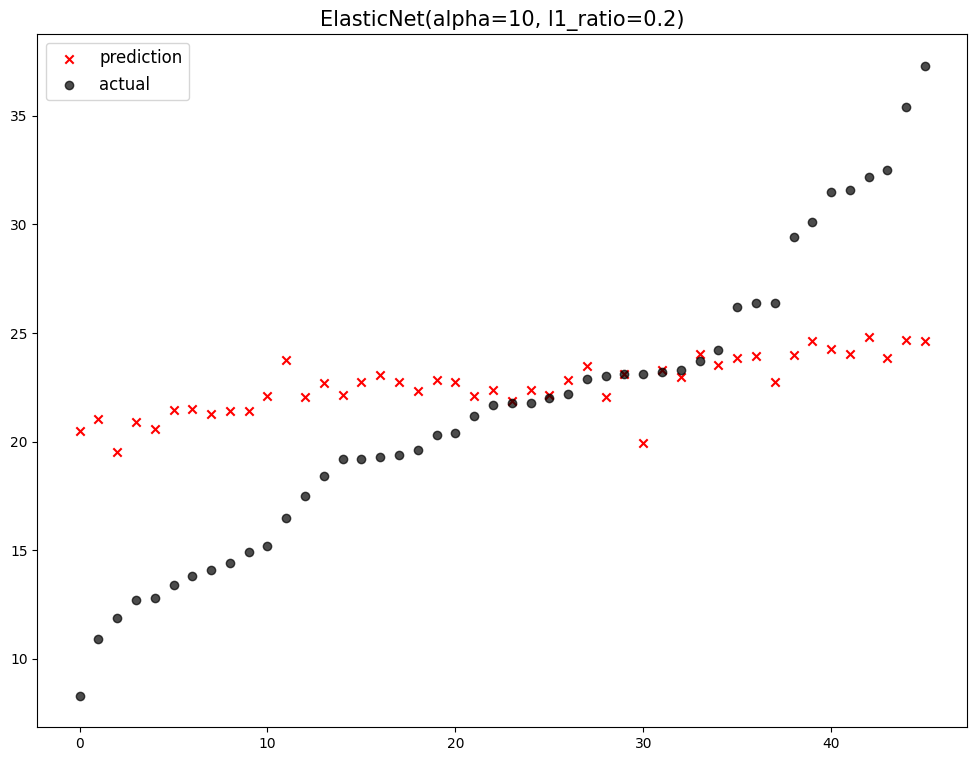


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10                    Ridge(alpha = 100  3.740402
11                   Lasso(alpha = 0.1)  3.783762
12                     Lasso(alpha = 1)  4.279703
13   ElasticNet(alpha=10, l1_ratio=0.2)  5.752285
14                   Lasso(alpha = 100)  6.764249
15                    Lasso(alpha = 10)  6.764249
16  ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
17  ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
18  ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

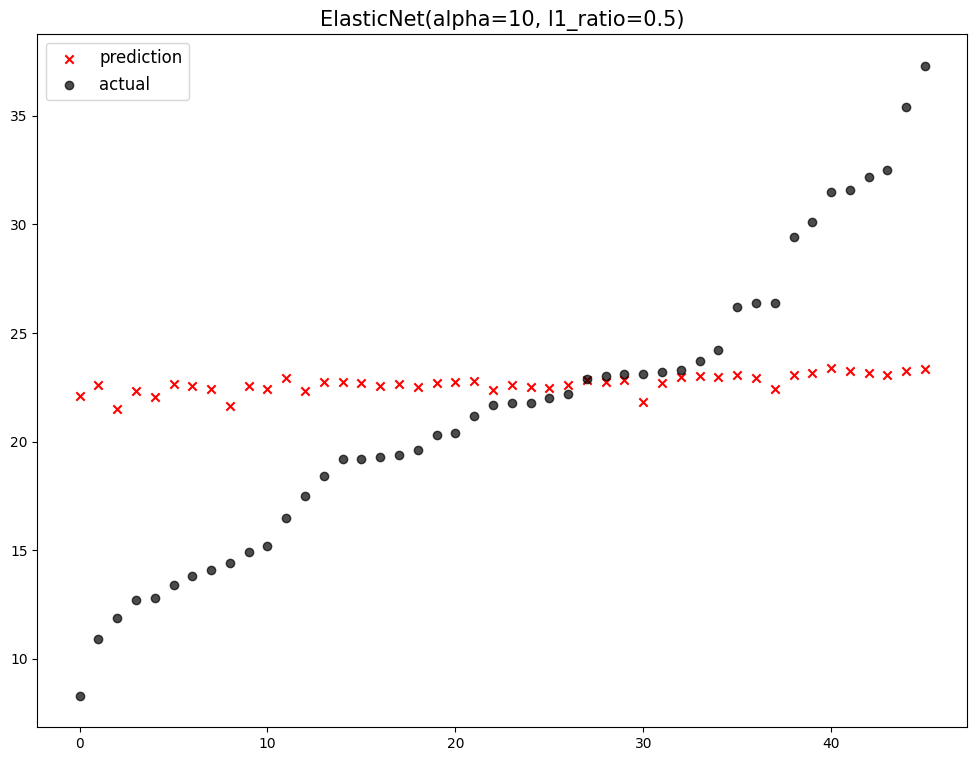


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10                    Ridge(alpha = 100  3.740402
11                   Lasso(alpha = 0.1)  3.783762
12                     Lasso(alpha = 1)  4.279703
13   ElasticNet(alpha=10, l1_ratio=0.2)  5.752285
14   ElasticNet(alpha=10, l1_ratio=0.5)  6.470100
15                   Lasso(alpha = 100)  6.764249
16                    Lasso(alpha = 10)  6.764249
17  ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
18  ElasticNet(alpha=100, l1_ratio=0.5)  6.764249

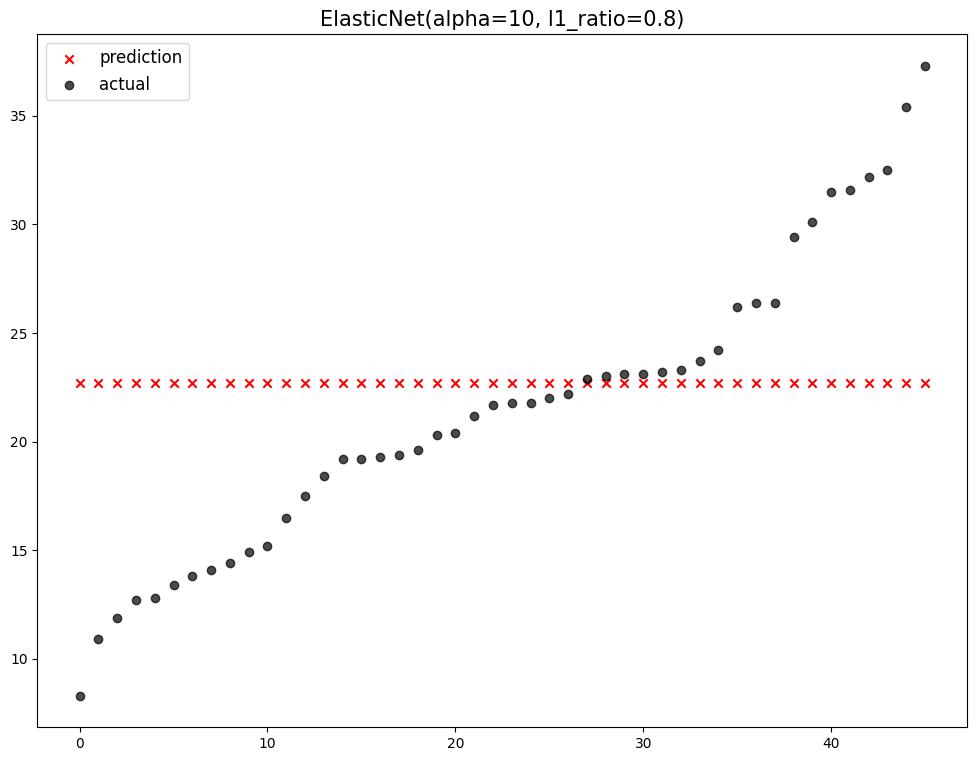


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10                    Ridge(alpha = 100  3.740402
11                   Lasso(alpha = 0.1)  3.783762
12                     Lasso(alpha = 1)  4.279703
13   ElasticNet(alpha=10, l1_ratio=0.2)  5.752285
14   ElasticNet(alpha=10, l1_ratio=0.5)  6.470100
15                   Lasso(alpha = 100)  6.764249
16                    Lasso(alpha = 10)  6.764249
17  ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
18  ElasticNet(alpha=100, l1_ratio=0.5)  6.764249

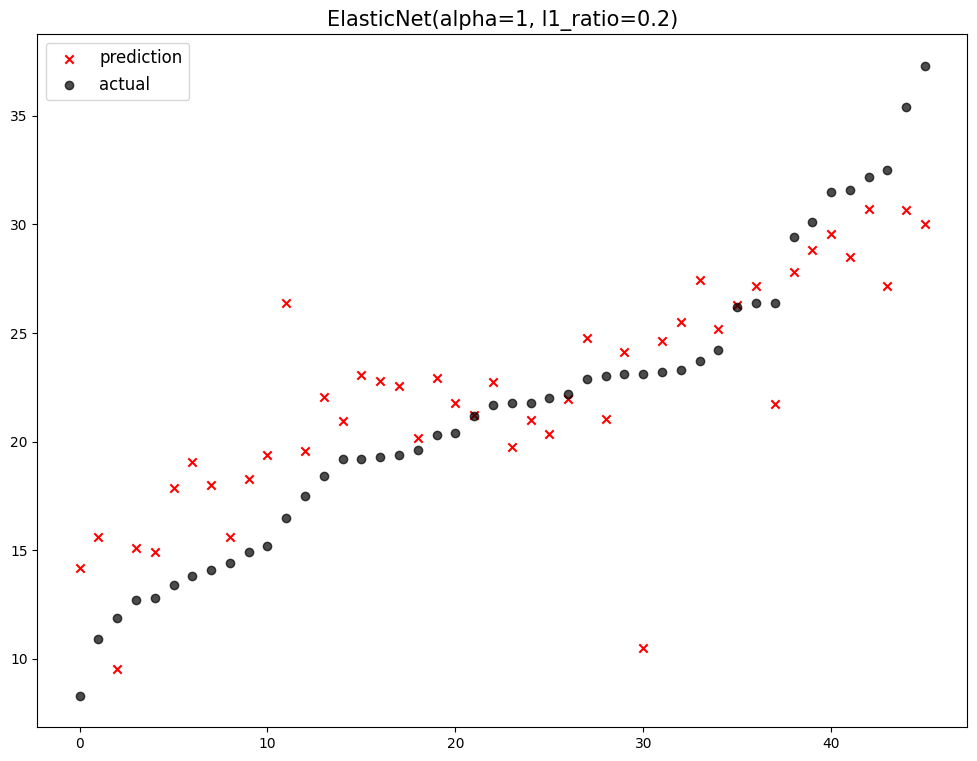


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10                    Ridge(alpha = 100  3.740402
11                   Lasso(alpha = 0.1)  3.783762
12    ElasticNet(alpha=1, l1_ratio=0.2)  3.829087
13                     Lasso(alpha = 1)  4.279703
14   ElasticNet(alpha=10, l1_ratio=0.2)  5.752285
15   ElasticNet(alpha=10, l1_ratio=0.5)  6.470100
16                   Lasso(alpha = 100)  6.764249
17                    Lasso(alpha = 10)  6.764249
18  ElasticNet(alpha=100, l1_ratio=0.2)  6.764249

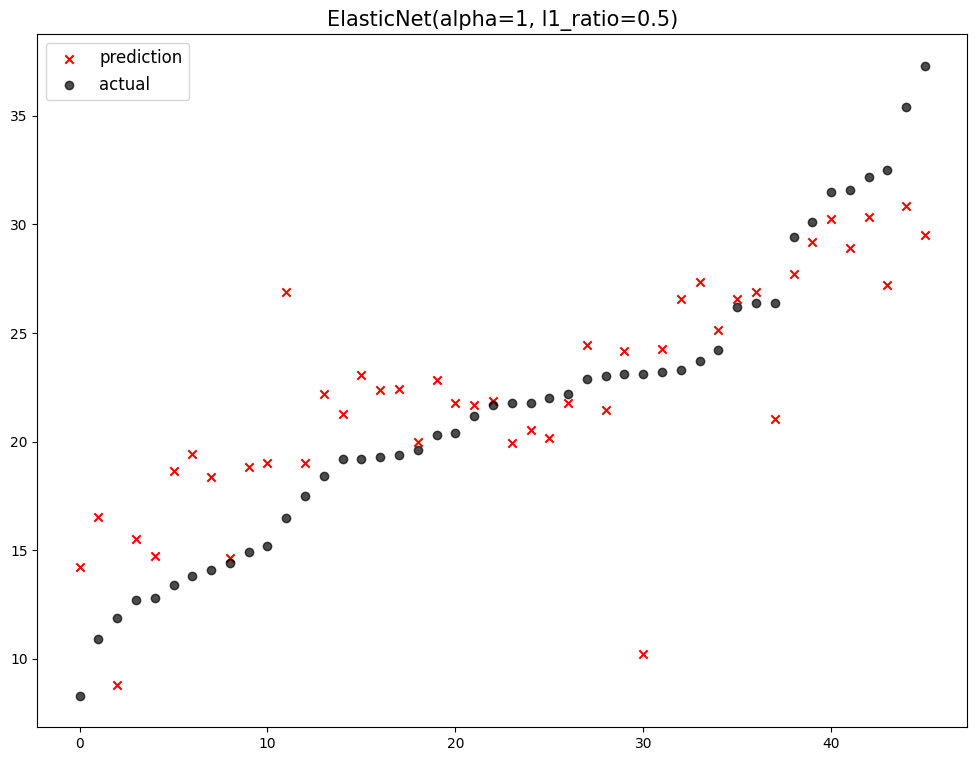


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10                    Ridge(alpha = 100  3.740402
11                   Lasso(alpha = 0.1)  3.783762
12    ElasticNet(alpha=1, l1_ratio=0.2)  3.829087
13    ElasticNet(alpha=1, l1_ratio=0.5)  3.977253
14                     Lasso(alpha = 1)  4.279703
15   ElasticNet(alpha=10, l1_ratio=0.2)  5.752285
16   ElasticNet(alpha=10, l1_ratio=0.5)  6.470100
17                   Lasso(alpha = 100)  6.764249
18                    Lasso(alpha = 10)  6.764249

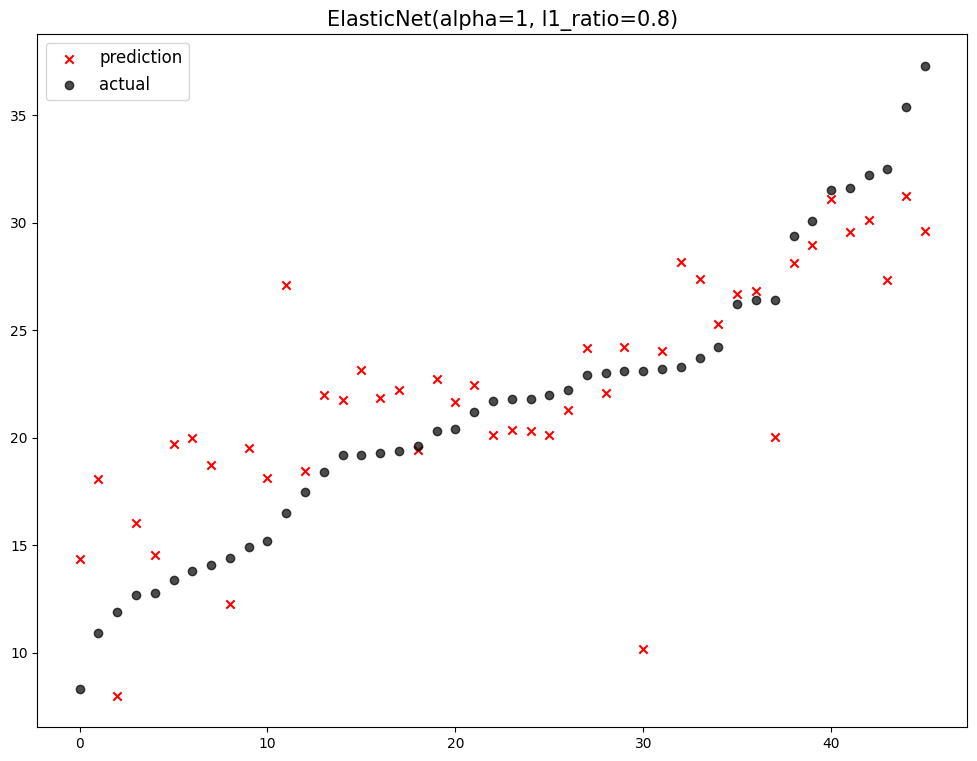


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10                    Ridge(alpha = 100  3.740402
11                   Lasso(alpha = 0.1)  3.783762
12    ElasticNet(alpha=1, l1_ratio=0.2)  3.829087
13    ElasticNet(alpha=1, l1_ratio=0.5)  3.977253
14    ElasticNet(alpha=1, l1_ratio=0.8)  4.171565
15                     Lasso(alpha = 1)  4.279703
16   ElasticNet(alpha=10, l1_ratio=0.2)  5.752285
17   ElasticNet(alpha=10, l1_ratio=0.5)  6.470100
18                   Lasso(alpha = 100)  6.764249

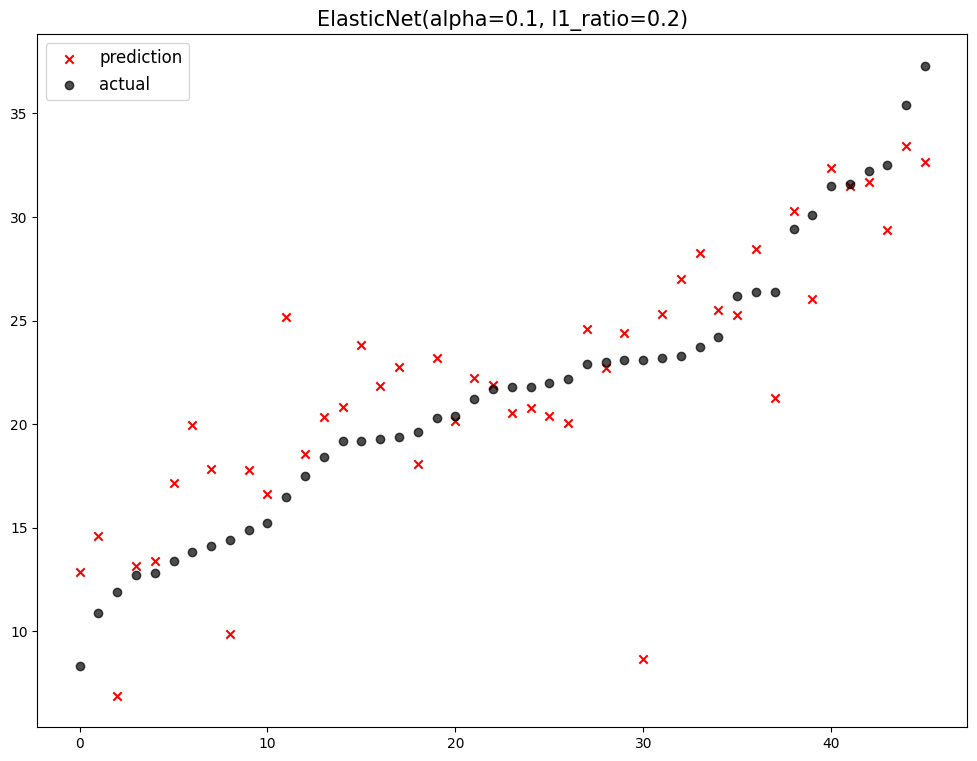


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10  ElasticNet(alpha=0.1, l1_ratio=0.2)  3.727450
11                    Ridge(alpha = 100  3.740402
12                   Lasso(alpha = 0.1)  3.783762
13    ElasticNet(alpha=1, l1_ratio=0.2)  3.829087
14    ElasticNet(alpha=1, l1_ratio=0.5)  3.977253
15    ElasticNet(alpha=1, l1_ratio=0.8)  4.171565
16                     Lasso(alpha = 1)  4.279703
17   ElasticNet(alpha=10, l1_ratio=0.2)  5.752285
18   ElasticNet(alpha=10, l1_ratio=0.5)  6.470100

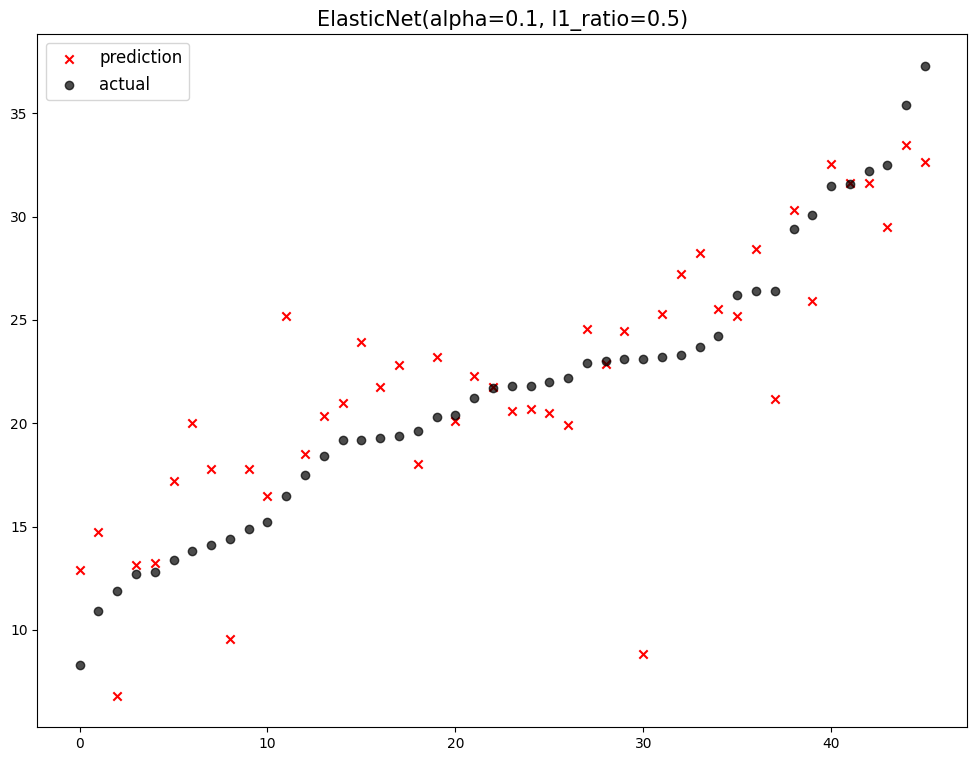


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10  ElasticNet(alpha=0.1, l1_ratio=0.2)  3.727450
11                    Ridge(alpha = 100  3.740402
12  ElasticNet(alpha=0.1, l1_ratio=0.5)  3.745421
13                   Lasso(alpha = 0.1)  3.783762
14    ElasticNet(alpha=1, l1_ratio=0.2)  3.829087
15    ElasticNet(alpha=1, l1_ratio=0.5)  3.977253
16    ElasticNet(alpha=1, l1_ratio=0.8)  4.171565
17                     Lasso(alpha = 1)  4.279703
18   ElasticNet(alpha=10, l1_ratio=0.2)  5.752285

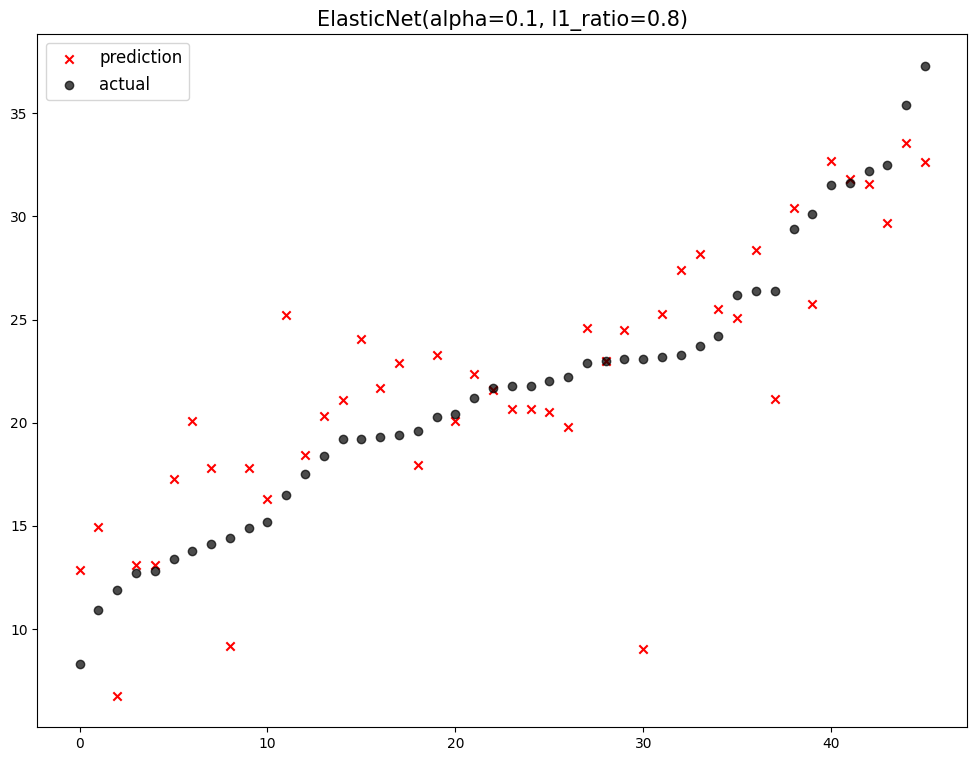


                                  model      rmse
0                      LinearRegression  3.535198
1                  Ridge(alpha = 0.0001  3.535199
2                   Ridge(alpha = 0.001  3.535208
3                    Ridge(alpha = 0.01  3.535306
4                 Lasso(alpha = 0.0001)  3.535439
5                     Ridge(alpha = 0.1  3.536281
6                  Lasso(alpha = 0.001)  3.537604
7                       Ridge(alpha = 1  3.545744
8                   Lasso(alpha = 0.01)  3.560248
9                      Ridge(alpha = 10  3.617595
10  ElasticNet(alpha=0.1, l1_ratio=0.2)  3.727450
11                    Ridge(alpha = 100  3.740402
12  ElasticNet(alpha=0.1, l1_ratio=0.5)  3.745421
13  ElasticNet(alpha=0.1, l1_ratio=0.8)  3.764981
14                   Lasso(alpha = 0.1)  3.783762
15    ElasticNet(alpha=1, l1_ratio=0.2)  3.829087
16    ElasticNet(alpha=1, l1_ratio=0.5)  3.977253
17    ElasticNet(alpha=1, l1_ratio=0.8)  4.171565
18                     Lasso(alpha = 1)  4.279703

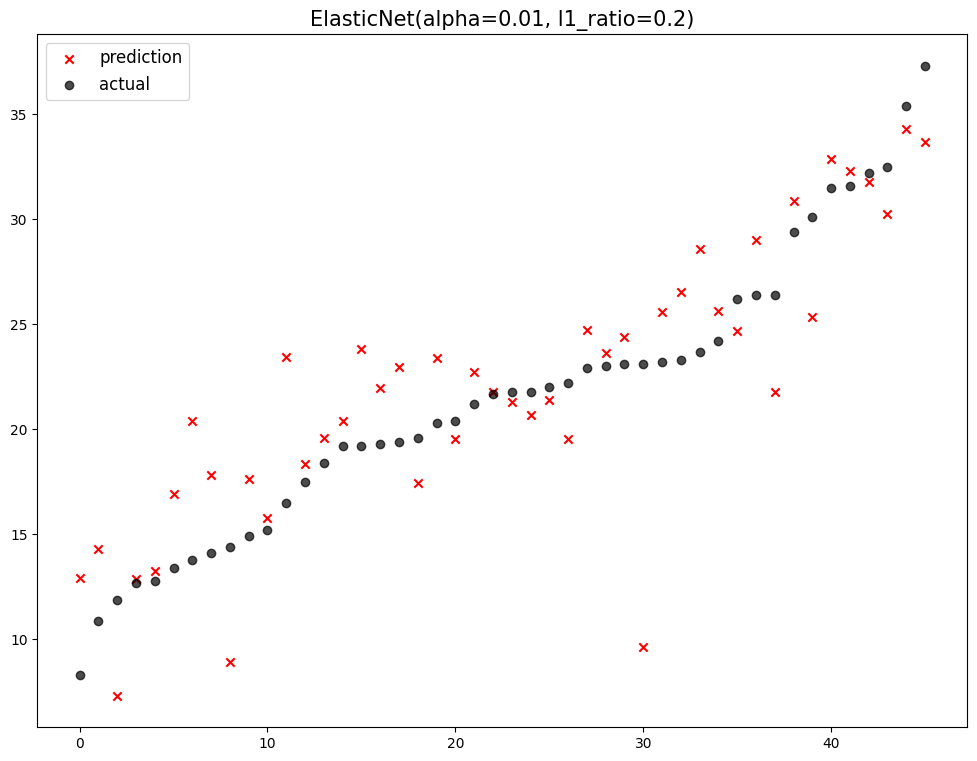


                                   model      rmse
0                       LinearRegression  3.535198
1                   Ridge(alpha = 0.0001  3.535199
2                    Ridge(alpha = 0.001  3.535208
3                     Ridge(alpha = 0.01  3.535306
4                  Lasso(alpha = 0.0001)  3.535439
5                      Ridge(alpha = 0.1  3.536281
6                   Lasso(alpha = 0.001)  3.537604
7                        Ridge(alpha = 1  3.545744
8                    Lasso(alpha = 0.01)  3.560248
9   ElasticNet(alpha=0.01, l1_ratio=0.2)  3.572024
10                      Ridge(alpha = 10  3.617595
11   ElasticNet(alpha=0.1, l1_ratio=0.2)  3.727450
12                     Ridge(alpha = 100  3.740402
13   ElasticNet(alpha=0.1, l1_ratio=0.5)  3.745421
14   ElasticNet(alpha=0.1, l1_ratio=0.8)  3.764981
15                    Lasso(alpha = 0.1)  3.783762
16     ElasticNet(alpha=1, l1_ratio=0.2)  3.829087
17     ElasticNet(alpha=1, l1_ratio=0.5)  3.977253
18     ElasticNet(alpha=1, l1_

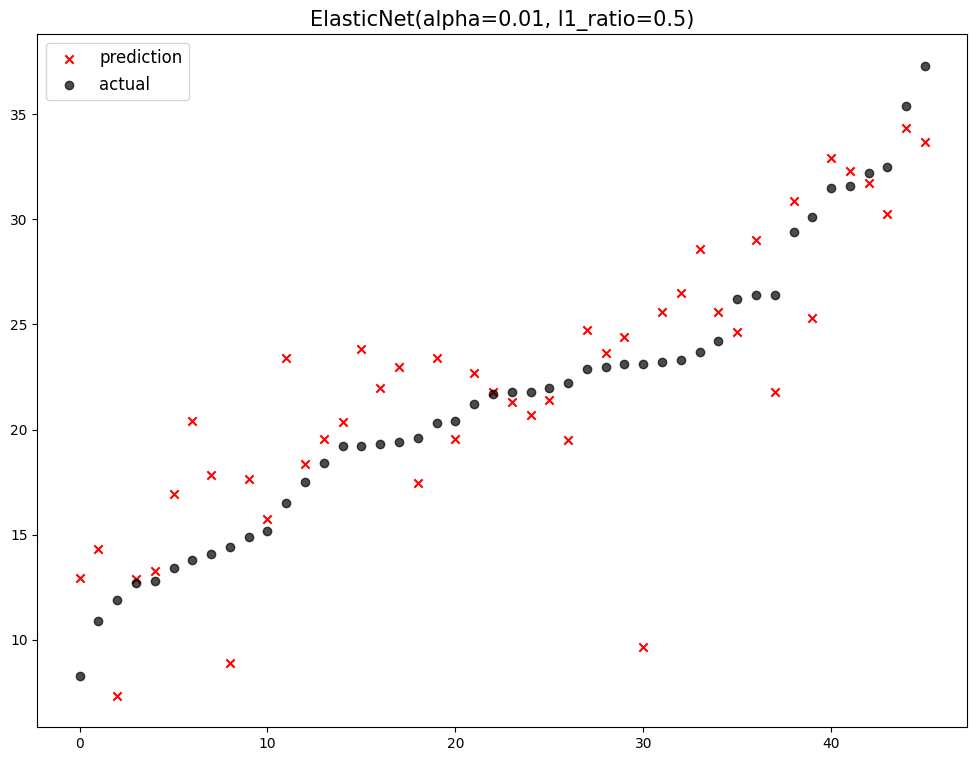


                                   model      rmse
0                       LinearRegression  3.535198
1                   Ridge(alpha = 0.0001  3.535199
2                    Ridge(alpha = 0.001  3.535208
3                     Ridge(alpha = 0.01  3.535306
4                  Lasso(alpha = 0.0001)  3.535439
5                      Ridge(alpha = 0.1  3.536281
6                   Lasso(alpha = 0.001)  3.537604
7                        Ridge(alpha = 1  3.545744
8                    Lasso(alpha = 0.01)  3.560248
9   ElasticNet(alpha=0.01, l1_ratio=0.5)  3.567903
10  ElasticNet(alpha=0.01, l1_ratio=0.2)  3.572024
11                      Ridge(alpha = 10  3.617595
12   ElasticNet(alpha=0.1, l1_ratio=0.2)  3.727450
13                     Ridge(alpha = 100  3.740402
14   ElasticNet(alpha=0.1, l1_ratio=0.5)  3.745421
15   ElasticNet(alpha=0.1, l1_ratio=0.8)  3.764981
16                    Lasso(alpha = 0.1)  3.783762
17     ElasticNet(alpha=1, l1_ratio=0.2)  3.829087
18     ElasticNet(alpha=1, l1_

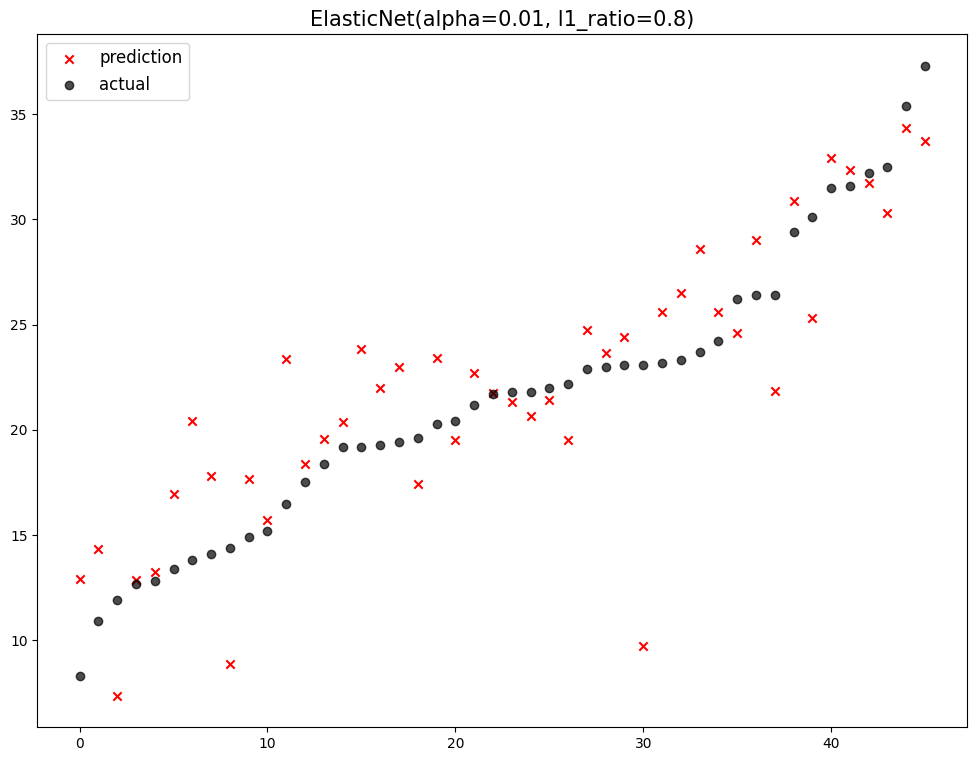


                                   model      rmse
0                       LinearRegression  3.535198
1                   Ridge(alpha = 0.0001  3.535199
2                    Ridge(alpha = 0.001  3.535208
3                     Ridge(alpha = 0.01  3.535306
4                  Lasso(alpha = 0.0001)  3.535439
5                      Ridge(alpha = 0.1  3.536281
6                   Lasso(alpha = 0.001)  3.537604
7                        Ridge(alpha = 1  3.545744
8                    Lasso(alpha = 0.01)  3.560248
9   ElasticNet(alpha=0.01, l1_ratio=0.8)  3.563473
10  ElasticNet(alpha=0.01, l1_ratio=0.5)  3.567903
11  ElasticNet(alpha=0.01, l1_ratio=0.2)  3.572024
12                      Ridge(alpha = 10  3.617595
13   ElasticNet(alpha=0.1, l1_ratio=0.2)  3.727450
14                     Ridge(alpha = 100  3.740402
15   ElasticNet(alpha=0.1, l1_ratio=0.5)  3.745421
16   ElasticNet(alpha=0.1, l1_ratio=0.8)  3.764981
17                    Lasso(alpha = 0.1)  3.783762
18     ElasticNet(alpha=1, l1_

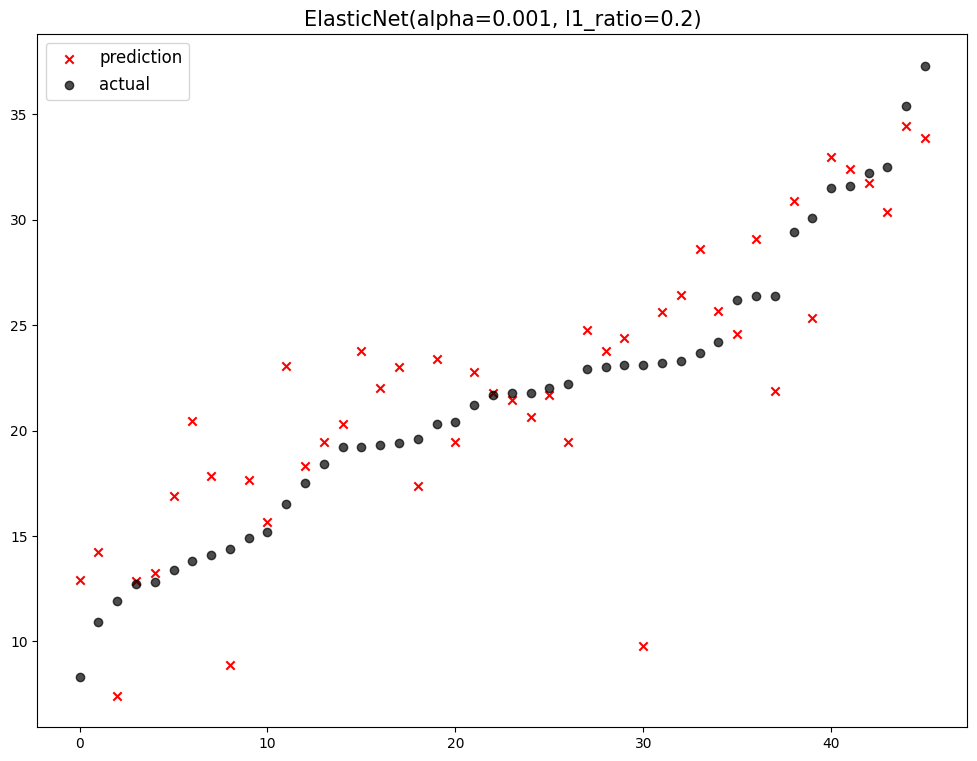


                                    model      rmse
0                        LinearRegression  3.535198
1                    Ridge(alpha = 0.0001  3.535199
2                     Ridge(alpha = 0.001  3.535208
3                      Ridge(alpha = 0.01  3.535306
4                   Lasso(alpha = 0.0001)  3.535439
5                       Ridge(alpha = 0.1  3.536281
6                    Lasso(alpha = 0.001)  3.537604
7   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
8                         Ridge(alpha = 1  3.545744
9                     Lasso(alpha = 0.01)  3.560248
10   ElasticNet(alpha=0.01, l1_ratio=0.8)  3.563473
11   ElasticNet(alpha=0.01, l1_ratio=0.5)  3.567903
12   ElasticNet(alpha=0.01, l1_ratio=0.2)  3.572024
13                       Ridge(alpha = 10  3.617595
14    ElasticNet(alpha=0.1, l1_ratio=0.2)  3.727450
15                      Ridge(alpha = 100  3.740402
16    ElasticNet(alpha=0.1, l1_ratio=0.5)  3.745421
17    ElasticNet(alpha=0.1, l1_ratio=0.8)  3.764981
18         

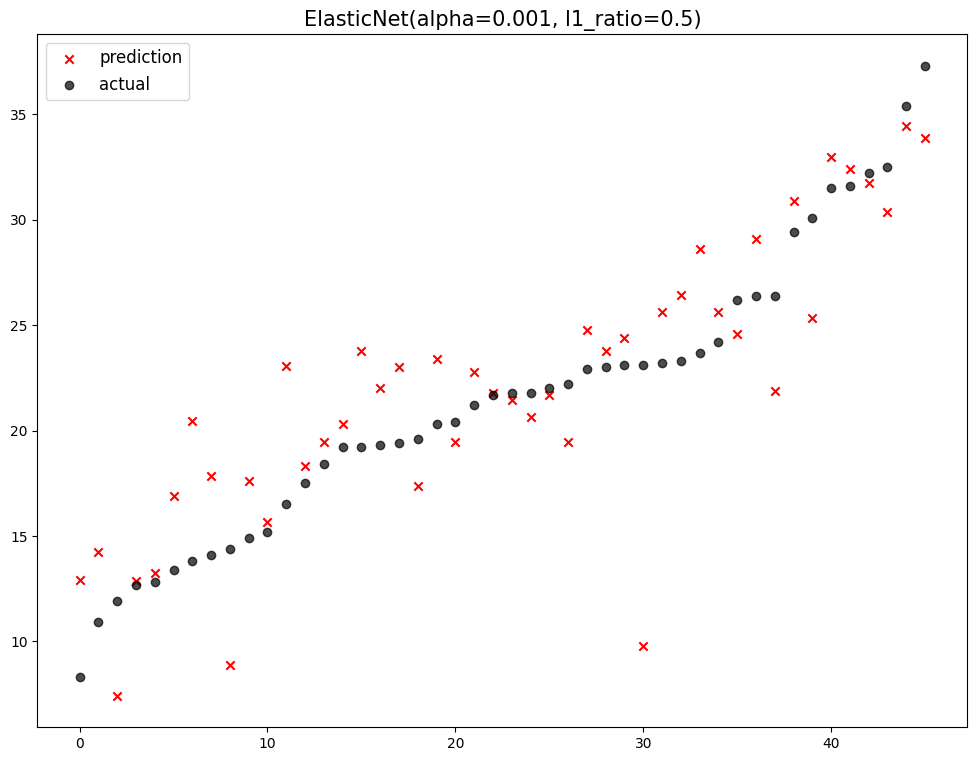


                                    model      rmse
0                        LinearRegression  3.535198
1                    Ridge(alpha = 0.0001  3.535199
2                     Ridge(alpha = 0.001  3.535208
3                      Ridge(alpha = 0.01  3.535306
4                   Lasso(alpha = 0.0001)  3.535439
5                       Ridge(alpha = 0.1  3.536281
6                    Lasso(alpha = 0.001)  3.537604
7   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
8   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
9                         Ridge(alpha = 1  3.545744
10                    Lasso(alpha = 0.01)  3.560248
11   ElasticNet(alpha=0.01, l1_ratio=0.8)  3.563473
12   ElasticNet(alpha=0.01, l1_ratio=0.5)  3.567903
13   ElasticNet(alpha=0.01, l1_ratio=0.2)  3.572024
14                       Ridge(alpha = 10  3.617595
15    ElasticNet(alpha=0.1, l1_ratio=0.2)  3.727450
16                      Ridge(alpha = 100  3.740402
17    ElasticNet(alpha=0.1, l1_ratio=0.5)  3.745421
18    Elast

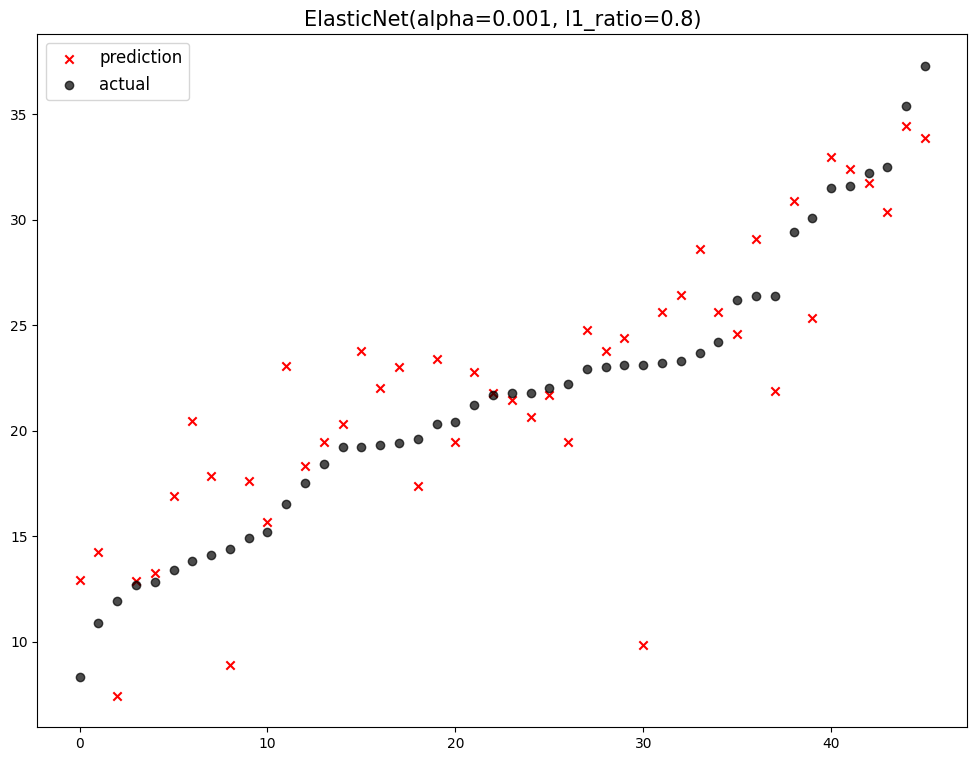


                                    model      rmse
0                        LinearRegression  3.535198
1                    Ridge(alpha = 0.0001  3.535199
2                     Ridge(alpha = 0.001  3.535208
3                      Ridge(alpha = 0.01  3.535306
4                   Lasso(alpha = 0.0001)  3.535439
5                       Ridge(alpha = 0.1  3.536281
6                    Lasso(alpha = 0.001)  3.537604
7   ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
8   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
9   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
10                        Ridge(alpha = 1  3.545744
11                    Lasso(alpha = 0.01)  3.560248
12   ElasticNet(alpha=0.01, l1_ratio=0.8)  3.563473
13   ElasticNet(alpha=0.01, l1_ratio=0.5)  3.567903
14   ElasticNet(alpha=0.01, l1_ratio=0.2)  3.572024
15                       Ridge(alpha = 10  3.617595
16    ElasticNet(alpha=0.1, l1_ratio=0.2)  3.727450
17                      Ridge(alpha = 100  3.740402
18    Elast

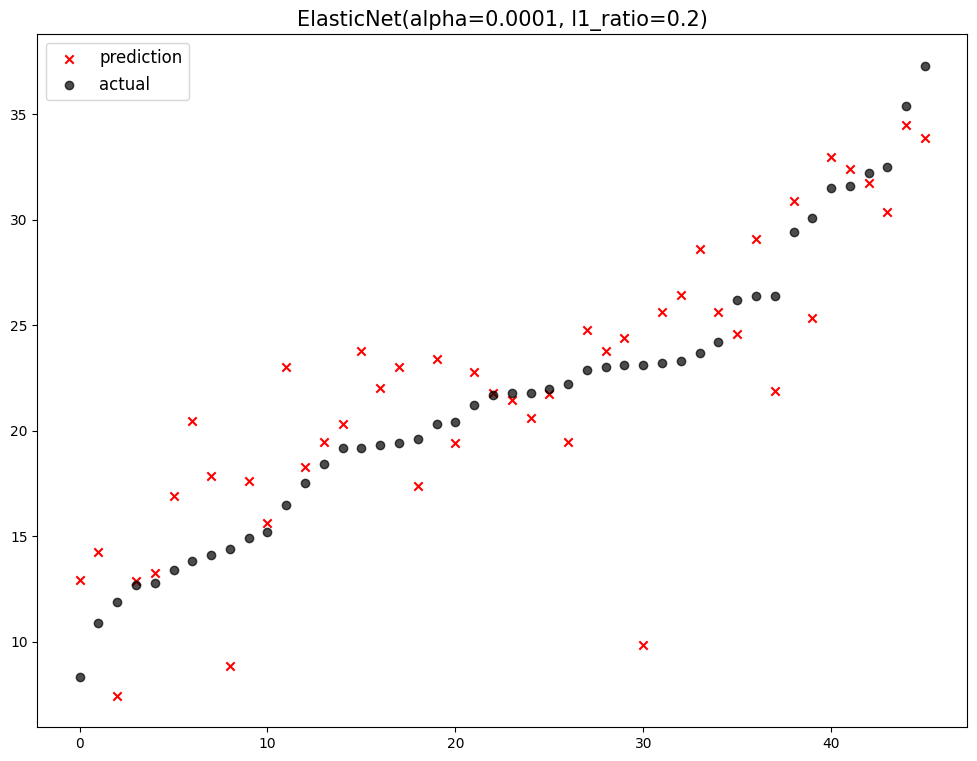


                                     model      rmse
0                         LinearRegression  3.535198
1                     Ridge(alpha = 0.0001  3.535199
2                      Ridge(alpha = 0.001  3.535208
3                       Ridge(alpha = 0.01  3.535306
4                    Lasso(alpha = 0.0001)  3.535439
5   ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
6                        Ridge(alpha = 0.1  3.536281
7                     Lasso(alpha = 0.001)  3.537604
8    ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
9    ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
10   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
11                         Ridge(alpha = 1  3.545744
12                     Lasso(alpha = 0.01)  3.560248
13    ElasticNet(alpha=0.01, l1_ratio=0.8)  3.563473
14    ElasticNet(alpha=0.01, l1_ratio=0.5)  3.567903
15    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.572024
16                        Ridge(alpha = 10  3.617595
17     ElasticNet(alpha=0.1, l1_ratio=0.2)  3

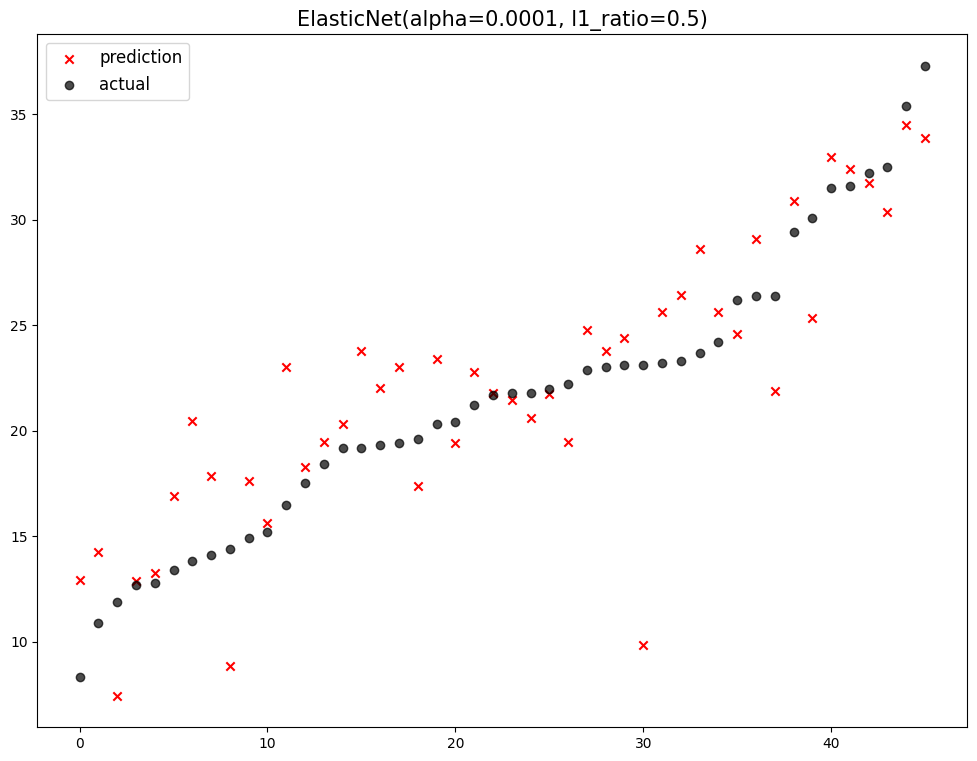


                                     model      rmse
0                         LinearRegression  3.535198
1                     Ridge(alpha = 0.0001  3.535199
2                      Ridge(alpha = 0.001  3.535208
3                       Ridge(alpha = 0.01  3.535306
4                    Lasso(alpha = 0.0001)  3.535439
5   ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
6   ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
7                        Ridge(alpha = 0.1  3.536281
8                     Lasso(alpha = 0.001)  3.537604
9    ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
10   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
11   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
12                         Ridge(alpha = 1  3.545744
13                     Lasso(alpha = 0.01)  3.560248
14    ElasticNet(alpha=0.01, l1_ratio=0.8)  3.563473
15    ElasticNet(alpha=0.01, l1_ratio=0.5)  3.567903
16    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.572024
17                        Ridge(alpha = 10  3

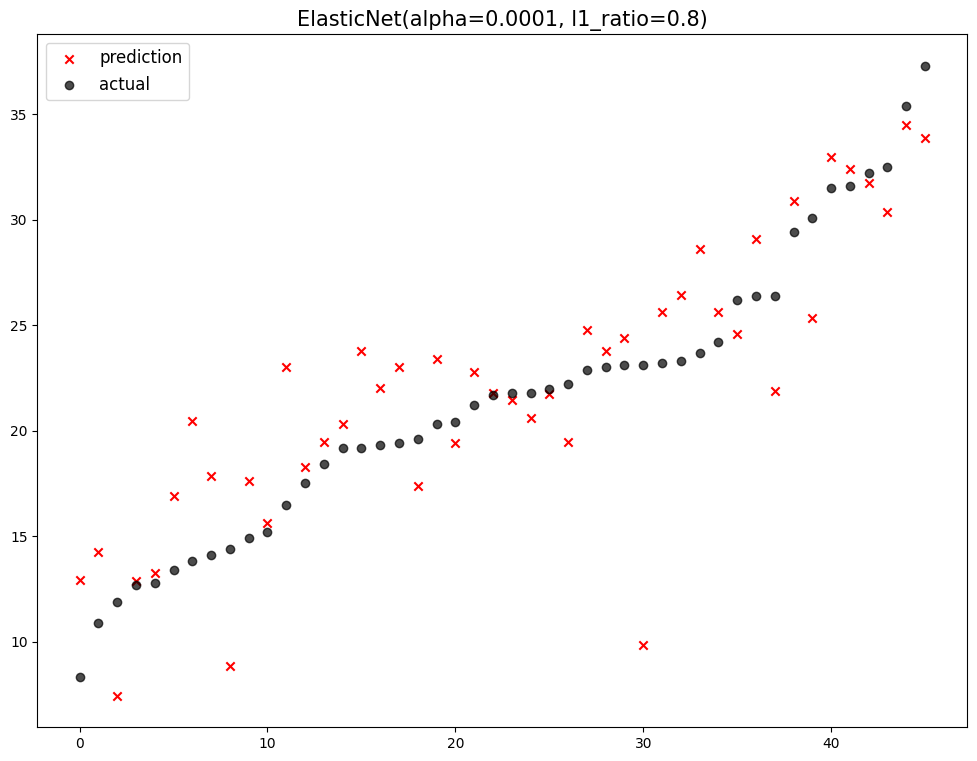


                                     model      rmse
0                         LinearRegression  3.535198
1                     Ridge(alpha = 0.0001  3.535199
2                      Ridge(alpha = 0.001  3.535208
3                       Ridge(alpha = 0.01  3.535306
4                    Lasso(alpha = 0.0001)  3.535439
5   ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
6   ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
7   ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
8                        Ridge(alpha = 0.1  3.536281
9                     Lasso(alpha = 0.001)  3.537604
10   ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
11   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
12   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
13                         Ridge(alpha = 1  3.545744
14                     Lasso(alpha = 0.01)  3.560248
15    ElasticNet(alpha=0.01, l1_ratio=0.8)  3.563473
16    ElasticNet(alpha=0.01, l1_ratio=0.5)  3.567903
17    ElasticNet(alpha=0.01, l1_ratio=0.2)  3

In [32]:
for alpha in alphas: # 규제 강도를 조정해 가면서..
    for ratio in ratios: # 규제 혼합 비율을 조정해 가면서..
        elasticnet = ElasticNet(alpha = alpha, l1_ratio = ratio) # 모델 객체 생성
        elasticnet.fit(scaled_X_train,y_train) # 학습
        pred = elasticnet.predict(scaled_X_valid) # 예측
        rmse_eval('ElasticNet(alpha={}, l1_ratio={})'.format(alpha,ratio), pred, y_valid) # 평가

### **5-6. 다항 회귀**

In [33]:
poly = PolynomialFeatures(degree = 2,include_bias = False) # 두 개의 기울기 사용, 절편 없음

In [34]:
poly_features = poly.fit_transform(scaled_X_train)

In [35]:
poly_features

array([[-0.40150682,  0.58894173, -0.91279846, ...,  0.19884404,
        -0.45594288,  1.04546214],
       [-0.38841825, -0.49893275, -0.61389402, ...,  0.17578489,
        -0.30388443,  0.52533383],
       [-0.36829996, -0.49893275, -0.5453647 , ...,  0.19884404,
        -0.40469871,  0.82366586],
       ...,
       [ 1.25709513, -0.49893275,  1.01768685, ...,  0.00519142,
        -0.12205655,  2.86969677],
       [-0.39804067,  2.11196599, -1.37500681, ...,  0.15681679,
        -0.26783122,  0.45743546],
       [ 0.10837069, -0.49893275,  1.01768685, ...,  0.041294  ,
        -0.02855437,  0.01974505]])

#### **a) LinearRegression**

In [36]:
### 모델 생성

poly_linear = make_pipeline(
    PolynomialFeatures(degree = 2,include_bias = False),
    LinearRegression(n_jobs = -1)
)

In [37]:
### 모델 학습 & 예측

poly_lin_pred = poly_linear.fit(scaled_X_train, y_train).predict(scaled_X_valid)

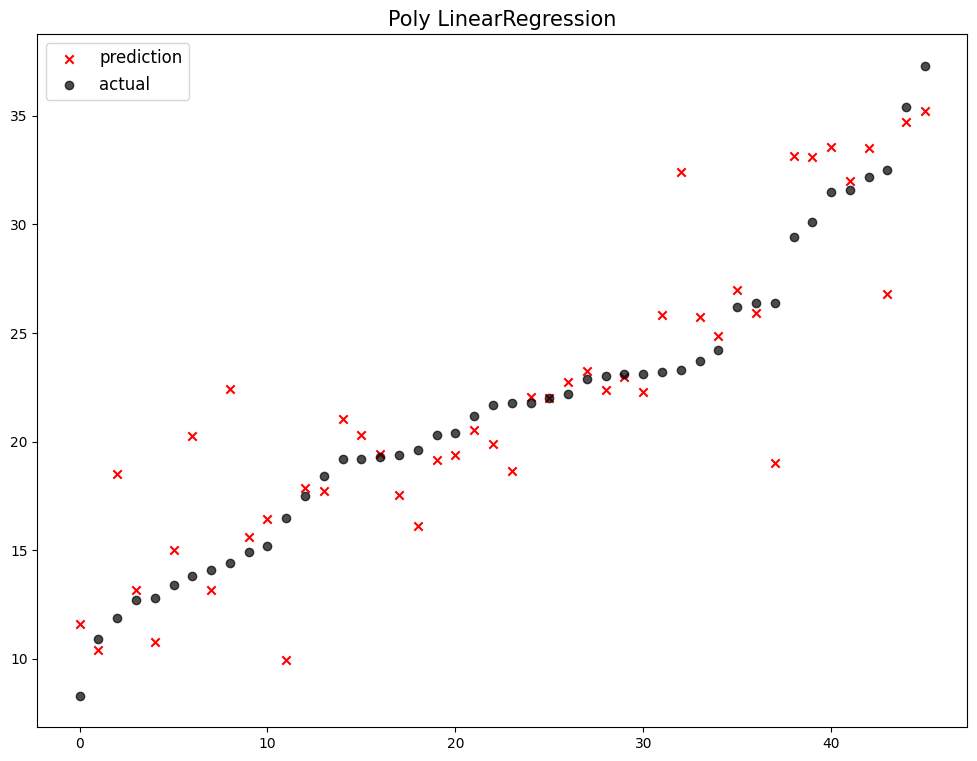


                                     model      rmse
0                    Poly LinearRegression  3.189825
1                         LinearRegression  3.535198
2                     Ridge(alpha = 0.0001  3.535199
3                      Ridge(alpha = 0.001  3.535208
4                       Ridge(alpha = 0.01  3.535306
5                    Lasso(alpha = 0.0001)  3.535439
6   ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
8   ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
9                        Ridge(alpha = 0.1  3.536281
10                    Lasso(alpha = 0.001)  3.537604
11   ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
13   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
14                         Ridge(alpha = 1  3.545744
15                     Lasso(alpha = 0.01)  3.560248
16    ElasticNet(alpha=0.01, l1_ratio=0.8)  3.563473
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

In [38]:
### 평가 & 시각화

rmse_eval('Poly LinearRegression',poly_lin_pred,y_valid)

#### **b) Lasso**

In [39]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

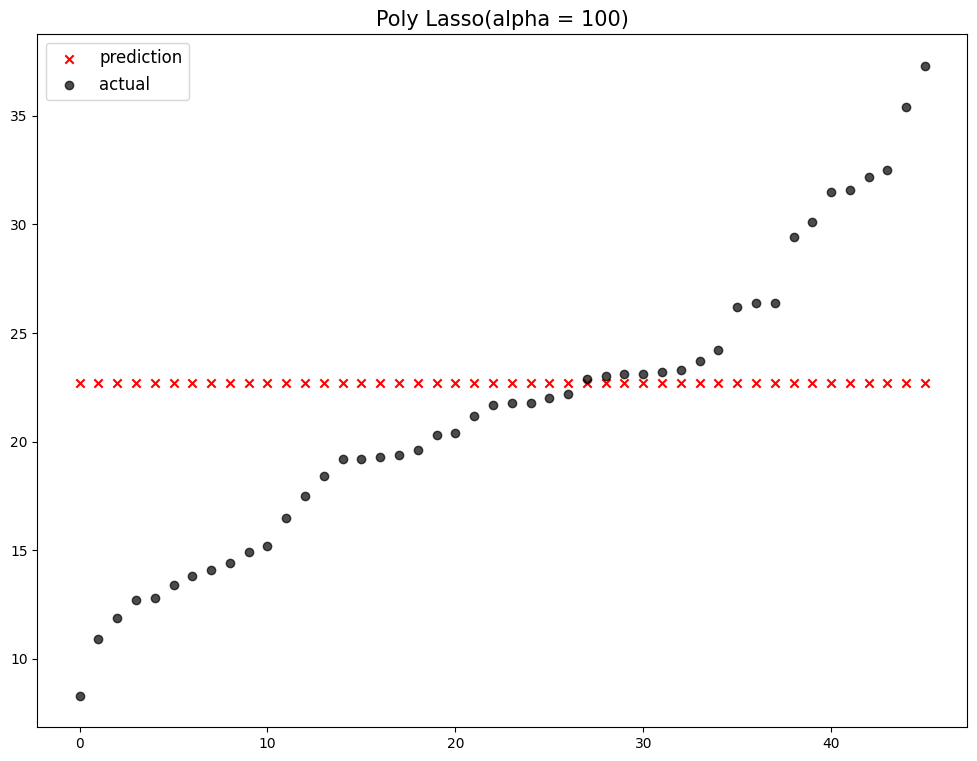


                                     model      rmse
0                    Poly LinearRegression  3.189825
1                         LinearRegression  3.535198
2                     Ridge(alpha = 0.0001  3.535199
3                      Ridge(alpha = 0.001  3.535208
4                       Ridge(alpha = 0.01  3.535306
5                    Lasso(alpha = 0.0001)  3.535439
6   ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
8   ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
9                        Ridge(alpha = 0.1  3.536281
10                    Lasso(alpha = 0.001)  3.537604
11   ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
13   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
14                         Ridge(alpha = 1  3.545744
15                     Lasso(alpha = 0.01)  3.560248
16    ElasticNet(alpha=0.01, l1_ratio=0.8)  3.563473
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

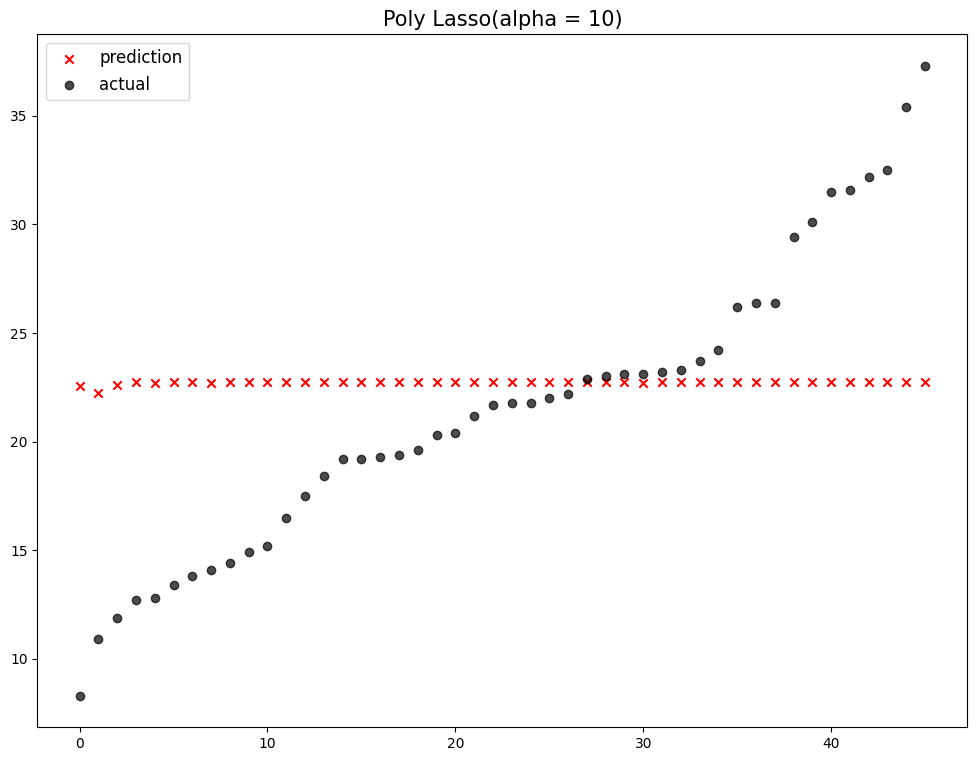


                                     model      rmse
0                    Poly LinearRegression  3.189825
1                         LinearRegression  3.535198
2                     Ridge(alpha = 0.0001  3.535199
3                      Ridge(alpha = 0.001  3.535208
4                       Ridge(alpha = 0.01  3.535306
5                    Lasso(alpha = 0.0001)  3.535439
6   ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
8   ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
9                        Ridge(alpha = 0.1  3.536281
10                    Lasso(alpha = 0.001)  3.537604
11   ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
13   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
14                         Ridge(alpha = 1  3.545744
15                     Lasso(alpha = 0.01)  3.560248
16    ElasticNet(alpha=0.01, l1_ratio=0.8)  3.563473
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

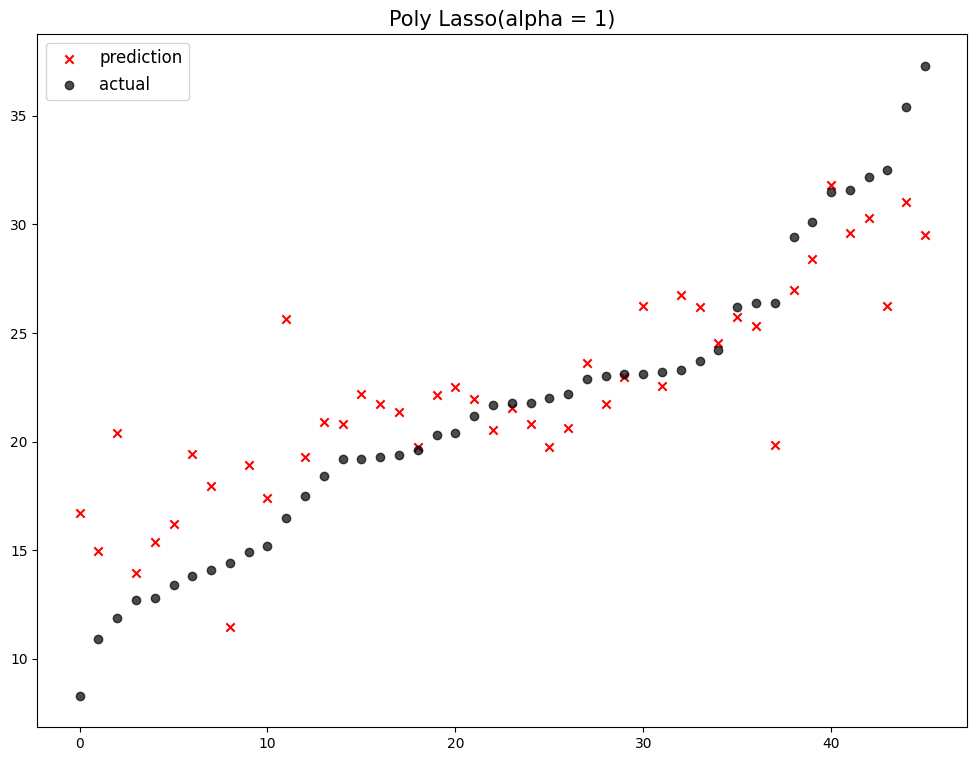


                                     model      rmse
0                    Poly LinearRegression  3.189825
1                         LinearRegression  3.535198
2                     Ridge(alpha = 0.0001  3.535199
3                      Ridge(alpha = 0.001  3.535208
4                       Ridge(alpha = 0.01  3.535306
5                    Lasso(alpha = 0.0001)  3.535439
6   ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
8   ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
9                        Ridge(alpha = 0.1  3.536281
10                    Lasso(alpha = 0.001)  3.537604
11   ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
13   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
14                         Ridge(alpha = 1  3.545744
15                     Lasso(alpha = 0.01)  3.560248
16    ElasticNet(alpha=0.01, l1_ratio=0.8)  3.563473
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

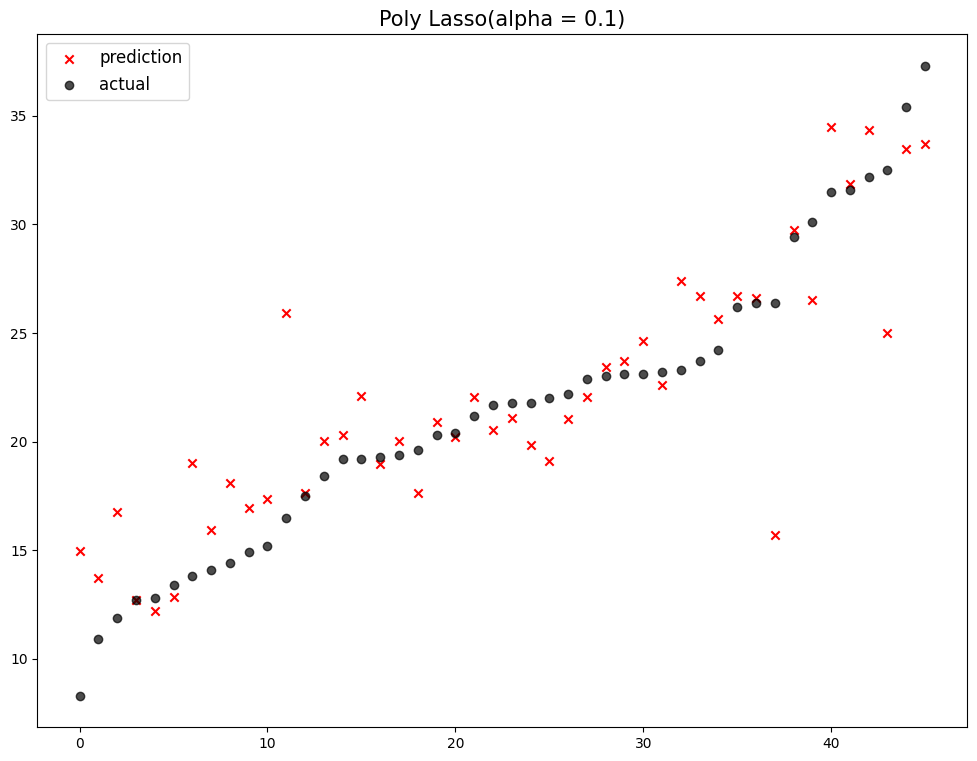


                                     model      rmse
0                    Poly LinearRegression  3.189825
1                  Poly Lasso(alpha = 0.1)  3.287681
2                         LinearRegression  3.535198
3                     Ridge(alpha = 0.0001  3.535199
4                      Ridge(alpha = 0.001  3.535208
5                       Ridge(alpha = 0.01  3.535306
6                    Lasso(alpha = 0.0001)  3.535439
7   ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
8   ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
9   ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
10                       Ridge(alpha = 0.1  3.536281
11                    Lasso(alpha = 0.001)  3.537604
12   ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
13   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
14   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
15                         Ridge(alpha = 1  3.545744
16                     Lasso(alpha = 0.01)  3.560248
17    ElasticNet(alpha=0.01, l1_ratio=0.8)  3

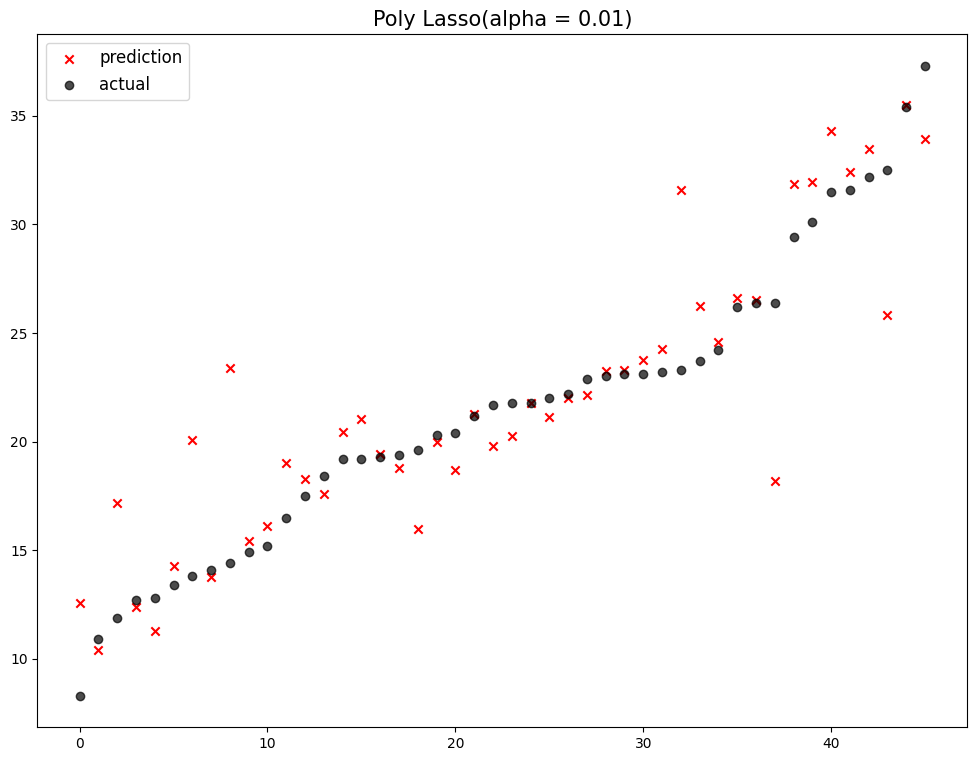


                                     model      rmse
0                 Poly Lasso(alpha = 0.01)  3.047416
1                    Poly LinearRegression  3.189825
2                  Poly Lasso(alpha = 0.1)  3.287681
3                         LinearRegression  3.535198
4                     Ridge(alpha = 0.0001  3.535199
5                      Ridge(alpha = 0.001  3.535208
6                       Ridge(alpha = 0.01  3.535306
7                    Lasso(alpha = 0.0001)  3.535439
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
9   ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
10  ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
11                       Ridge(alpha = 0.1  3.536281
12                    Lasso(alpha = 0.001)  3.537604
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
14   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
15   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
16                         Ridge(alpha = 1  3.545744
17                     Lasso(alpha = 0.01)  3

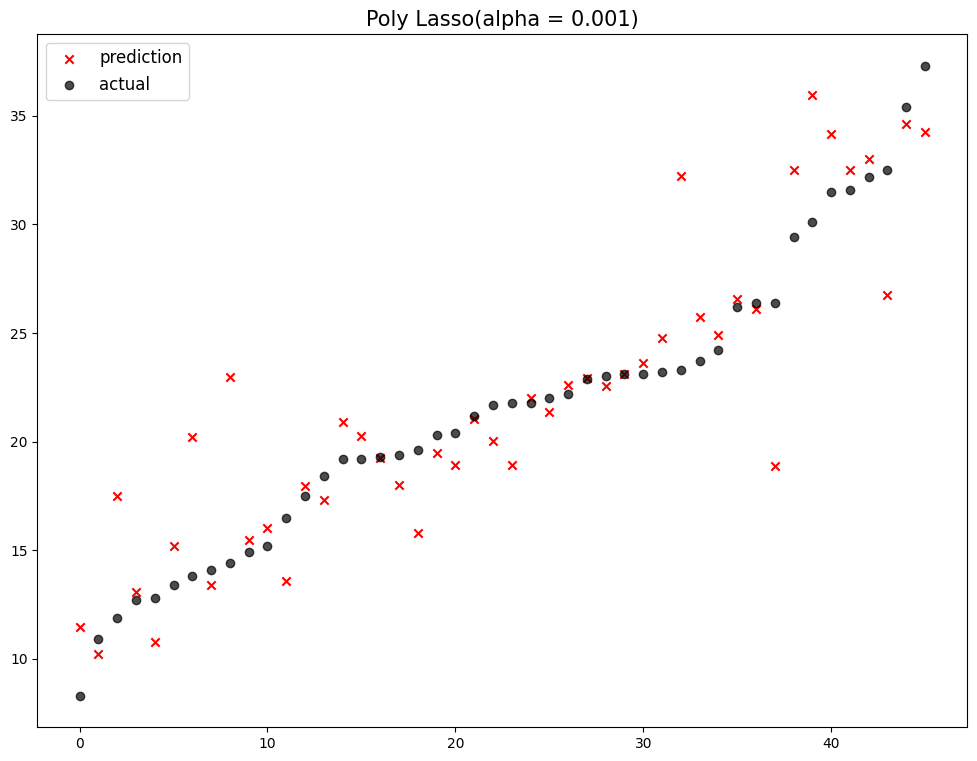


                                     model      rmse
0                 Poly Lasso(alpha = 0.01)  3.047416
1                Poly Lasso(alpha = 0.001)  3.125646
2                    Poly LinearRegression  3.189825
3                  Poly Lasso(alpha = 0.1)  3.287681
4                         LinearRegression  3.535198
5                     Ridge(alpha = 0.0001  3.535199
6                      Ridge(alpha = 0.001  3.535208
7                       Ridge(alpha = 0.01  3.535306
8                    Lasso(alpha = 0.0001)  3.535439
9   ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
10  ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
11  ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
12                       Ridge(alpha = 0.1  3.536281
13                    Lasso(alpha = 0.001)  3.537604
14   ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
15   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
16   ElasticNet(alpha=0.001, l1_ratio=0.2)  3.539199
17                         Ridge(alpha = 1  3

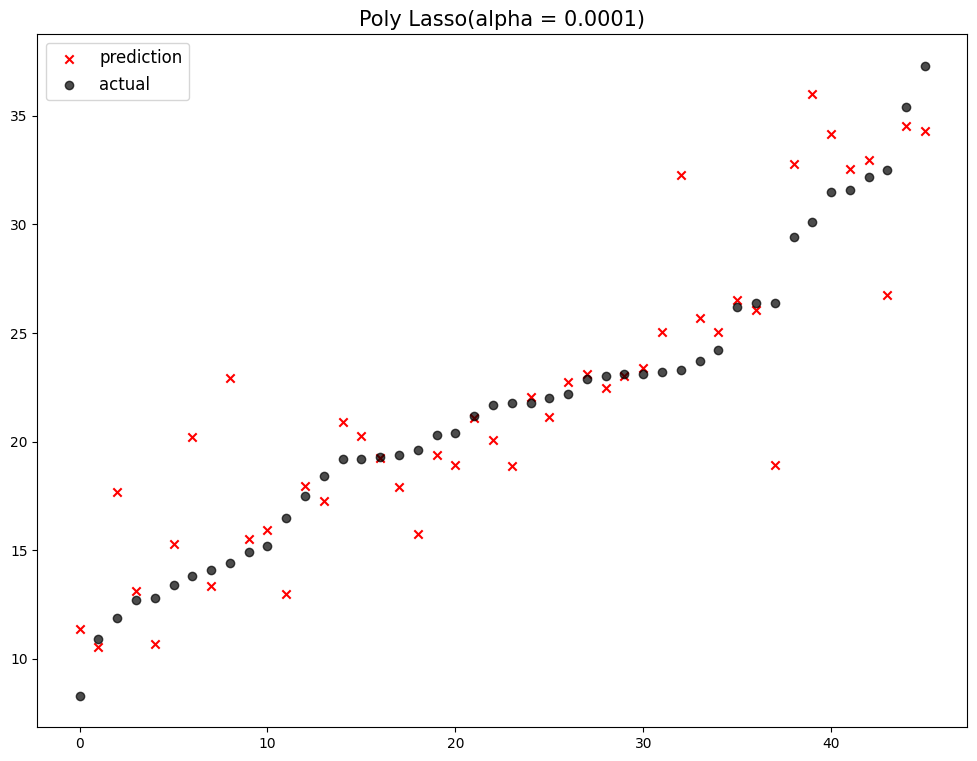


                                     model      rmse
0                 Poly Lasso(alpha = 0.01)  3.047416
1                Poly Lasso(alpha = 0.001)  3.125646
2               Poly Lasso(alpha = 0.0001)  3.160199
3                    Poly LinearRegression  3.189825
4                  Poly Lasso(alpha = 0.1)  3.287681
5                         LinearRegression  3.535198
6                     Ridge(alpha = 0.0001  3.535199
7                      Ridge(alpha = 0.001  3.535208
8                       Ridge(alpha = 0.01  3.535306
9                    Lasso(alpha = 0.0001)  3.535439
10  ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
11  ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
12  ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
13                       Ridge(alpha = 0.1  3.536281
14                    Lasso(alpha = 0.001)  3.537604
15   ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
16   ElasticNet(alpha=0.001, l1_ratio=0.5)  3.538607
17   ElasticNet(alpha=0.001, l1_ratio=0.2)  3

In [40]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    # 모델 객체 생성
    poly_lasso = make_pipeline(
        PolynomialFeatures(degree = 2,include_bias = False),
        Lasso(alpha = alpha)
    )
    poly_lasso.fit(scaled_X_train,y_train) # 학습
    poly_lasso_pred = poly_lasso.predict(scaled_X_valid) # 예측
    rmse_eval('Poly Lasso(alpha = {})'.format(alpha),poly_lasso_pred,y_valid) # 평가 & 시각화

#### **c) Ridge**

In [41]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

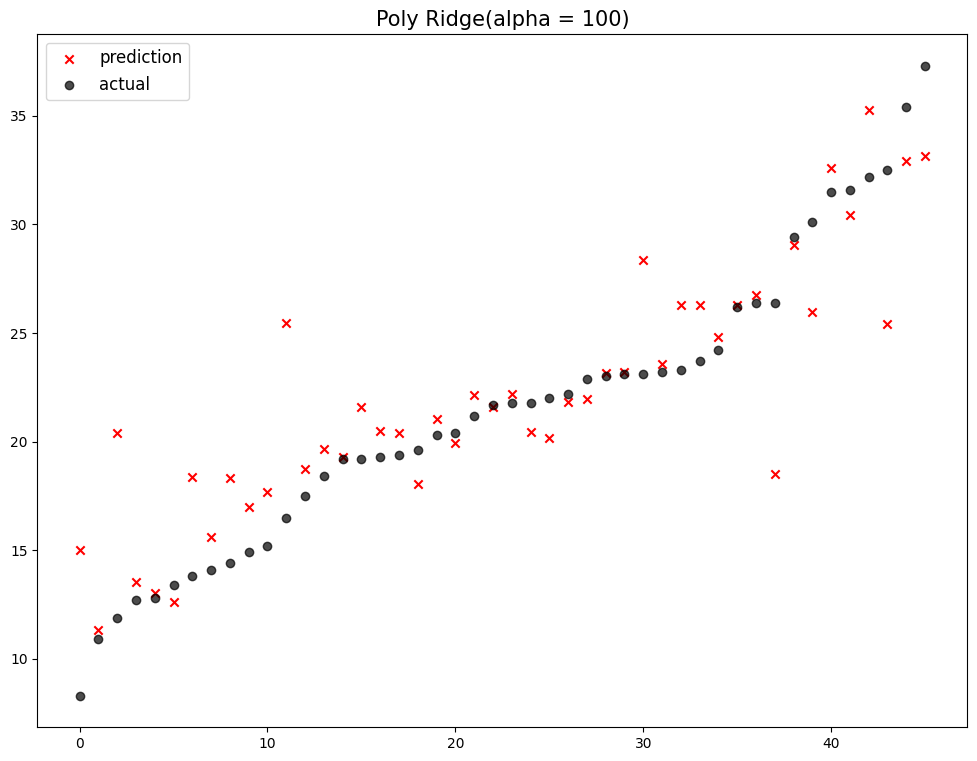


                                     model      rmse
0                 Poly Lasso(alpha = 0.01)  3.047416
1                Poly Lasso(alpha = 0.001)  3.125646
2               Poly Lasso(alpha = 0.0001)  3.160199
3                    Poly LinearRegression  3.189825
4                  Poly Ridge(alpha = 100)  3.228619
5                  Poly Lasso(alpha = 0.1)  3.287681
6                         LinearRegression  3.535198
7                     Ridge(alpha = 0.0001  3.535199
8                      Ridge(alpha = 0.001  3.535208
9                       Ridge(alpha = 0.01  3.535306
10                   Lasso(alpha = 0.0001)  3.535439
11  ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
12  ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
13  ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
14                       Ridge(alpha = 0.1  3.536281
15                    Lasso(alpha = 0.001)  3.537604
16   ElasticNet(alpha=0.001, l1_ratio=0.8)  3.538006
17   ElasticNet(alpha=0.001, l1_ratio=0.5)  3

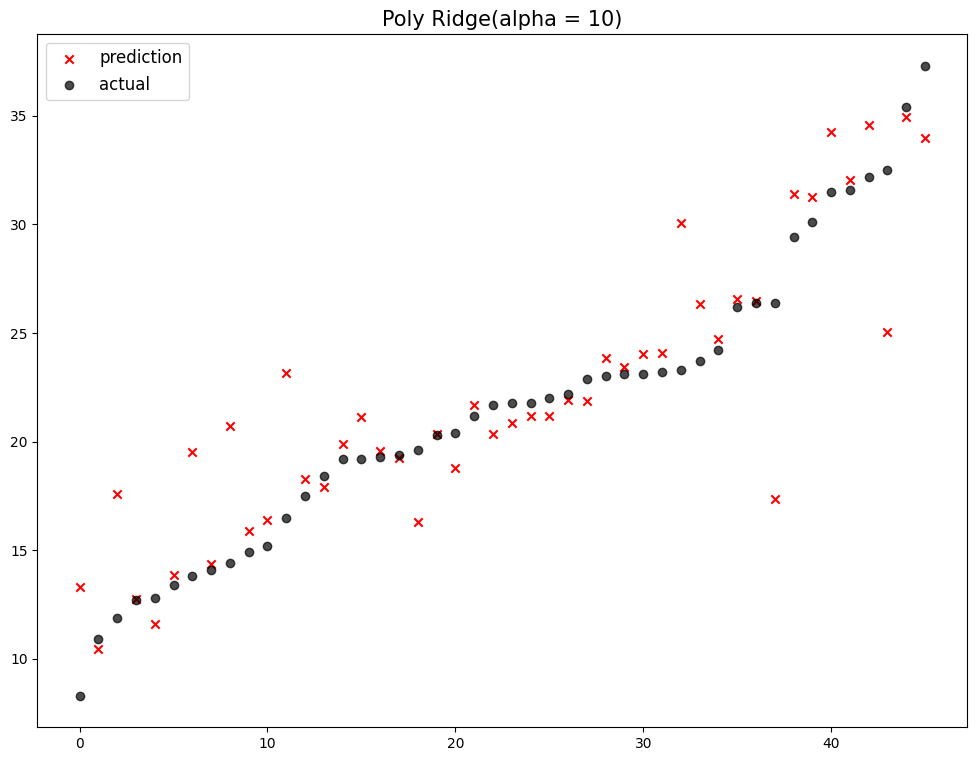


                                     model      rmse
0                   Poly Ridge(alpha = 10)  3.039876
1                 Poly Lasso(alpha = 0.01)  3.047416
2                Poly Lasso(alpha = 0.001)  3.125646
3               Poly Lasso(alpha = 0.0001)  3.160199
4                    Poly LinearRegression  3.189825
5                  Poly Ridge(alpha = 100)  3.228619
6                  Poly Lasso(alpha = 0.1)  3.287681
7                         LinearRegression  3.535198
8                     Ridge(alpha = 0.0001  3.535199
9                      Ridge(alpha = 0.001  3.535208
10                      Ridge(alpha = 0.01  3.535306
11                   Lasso(alpha = 0.0001)  3.535439
12  ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
13  ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
14  ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
15                       Ridge(alpha = 0.1  3.536281
16                    Lasso(alpha = 0.001)  3.537604
17   ElasticNet(alpha=0.001, l1_ratio=0.8)  3

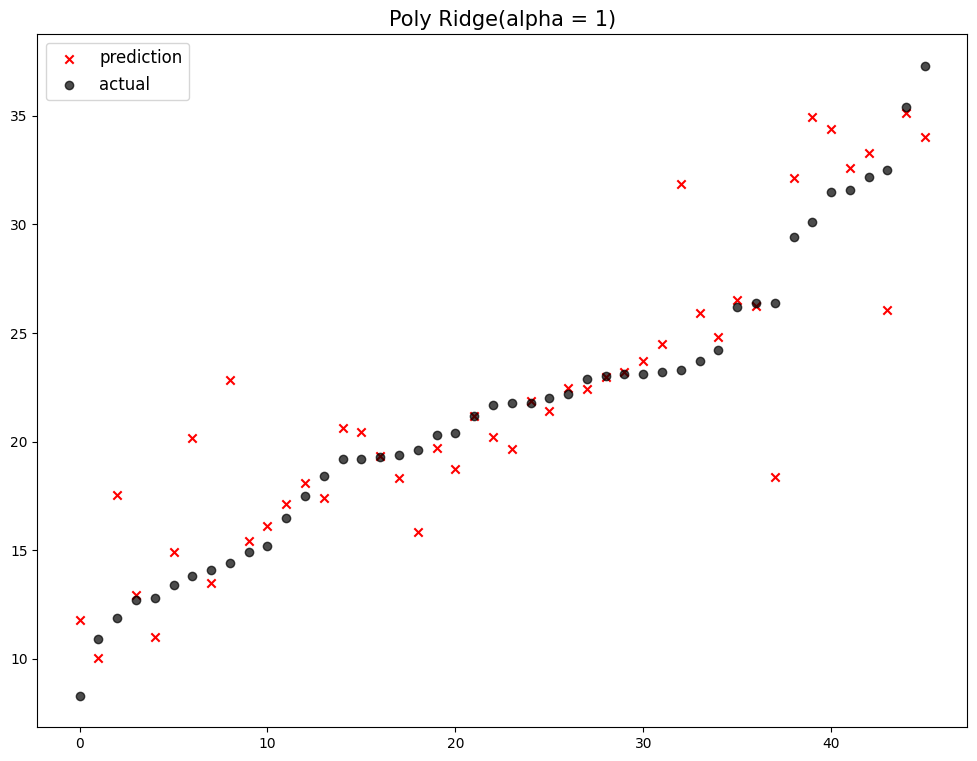


                                     model      rmse
0                   Poly Ridge(alpha = 10)  3.039876
1                 Poly Lasso(alpha = 0.01)  3.047416
2                    Poly Ridge(alpha = 1)  3.068883
3                Poly Lasso(alpha = 0.001)  3.125646
4               Poly Lasso(alpha = 0.0001)  3.160199
5                    Poly LinearRegression  3.189825
6                  Poly Ridge(alpha = 100)  3.228619
7                  Poly Lasso(alpha = 0.1)  3.287681
8                         LinearRegression  3.535198
9                     Ridge(alpha = 0.0001  3.535199
10                     Ridge(alpha = 0.001  3.535208
11                      Ridge(alpha = 0.01  3.535306
12                   Lasso(alpha = 0.0001)  3.535439
13  ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
14  ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
15  ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
16                       Ridge(alpha = 0.1  3.536281
17                    Lasso(alpha = 0.001)  3

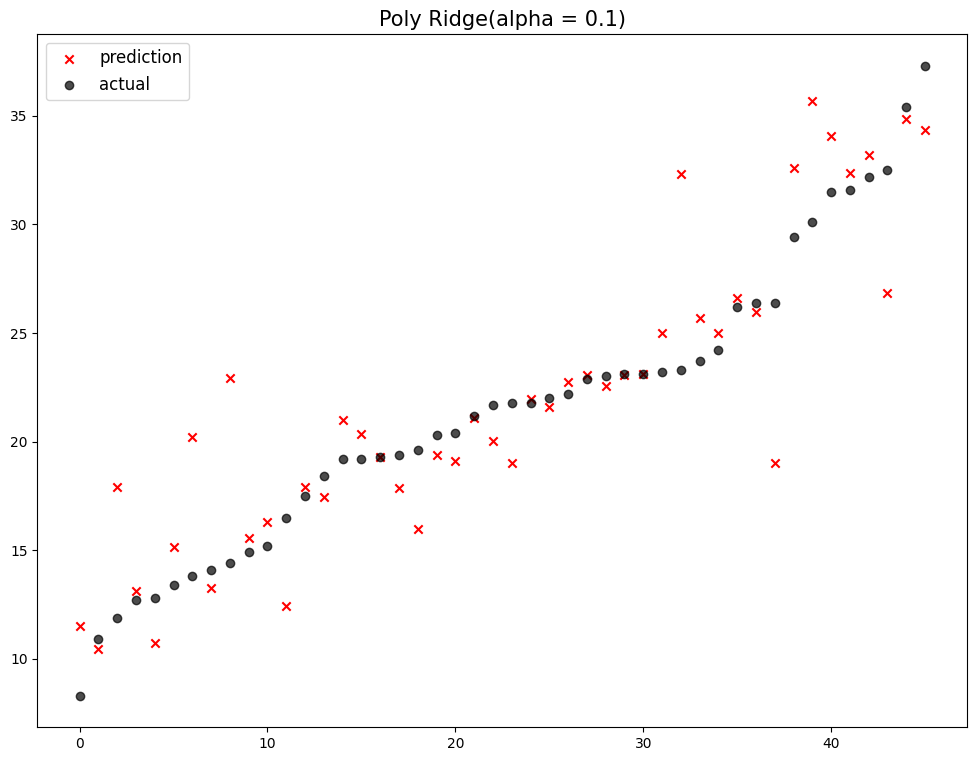


                                     model      rmse
0                   Poly Ridge(alpha = 10)  3.039876
1                 Poly Lasso(alpha = 0.01)  3.047416
2                    Poly Ridge(alpha = 1)  3.068883
3                Poly Lasso(alpha = 0.001)  3.125646
4                  Poly Ridge(alpha = 0.1)  3.151103
5               Poly Lasso(alpha = 0.0001)  3.160199
6                    Poly LinearRegression  3.189825
7                  Poly Ridge(alpha = 100)  3.228619
8                  Poly Lasso(alpha = 0.1)  3.287681
9                         LinearRegression  3.535198
10                    Ridge(alpha = 0.0001  3.535199
11                     Ridge(alpha = 0.001  3.535208
12                      Ridge(alpha = 0.01  3.535306
13                   Lasso(alpha = 0.0001)  3.535439
14  ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
15  ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
16  ElasticNet(alpha=0.0001, l1_ratio=0.2)  3.535601
17                       Ridge(alpha = 0.1  3

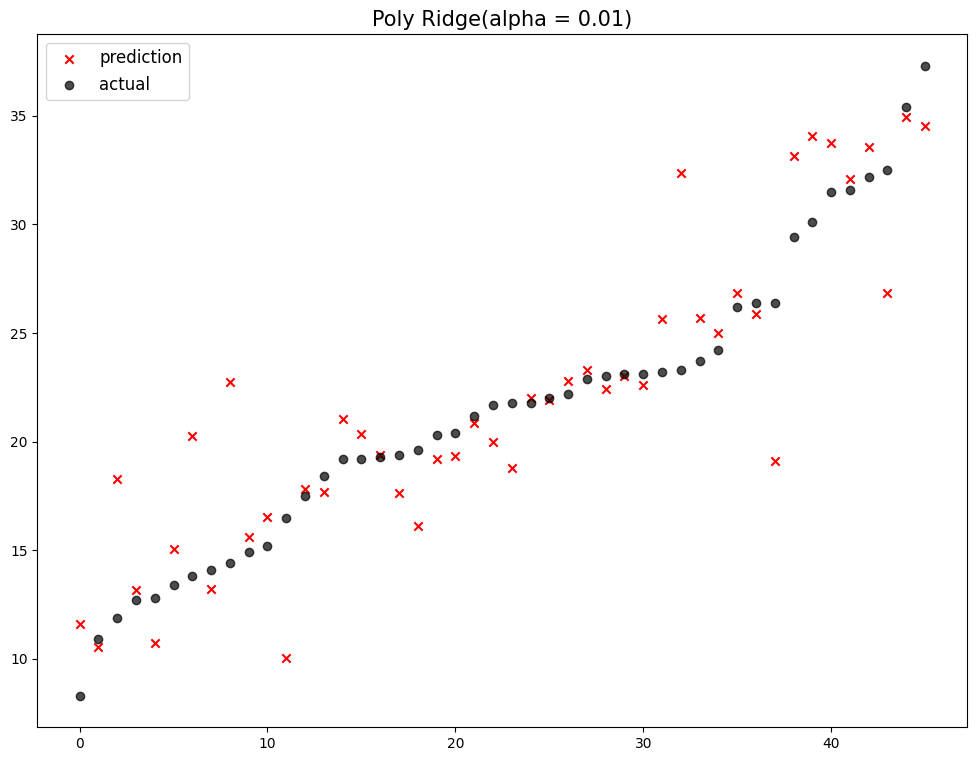


                                     model      rmse
0                   Poly Ridge(alpha = 10)  3.039876
1                 Poly Lasso(alpha = 0.01)  3.047416
2                    Poly Ridge(alpha = 1)  3.068883
3                Poly Lasso(alpha = 0.001)  3.125646
4                  Poly Ridge(alpha = 0.1)  3.151103
5               Poly Lasso(alpha = 0.0001)  3.160199
6                    Poly LinearRegression  3.189825
7                 Poly Ridge(alpha = 0.01)  3.210819
8                  Poly Ridge(alpha = 100)  3.228619
9                  Poly Lasso(alpha = 0.1)  3.287681
10                        LinearRegression  3.535198
11                    Ridge(alpha = 0.0001  3.535199
12                     Ridge(alpha = 0.001  3.535208
13                      Ridge(alpha = 0.01  3.535306
14                   Lasso(alpha = 0.0001)  3.535439
15  ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
16  ElasticNet(alpha=0.0001, l1_ratio=0.5)  3.535540
17  ElasticNet(alpha=0.0001, l1_ratio=0.2)  3

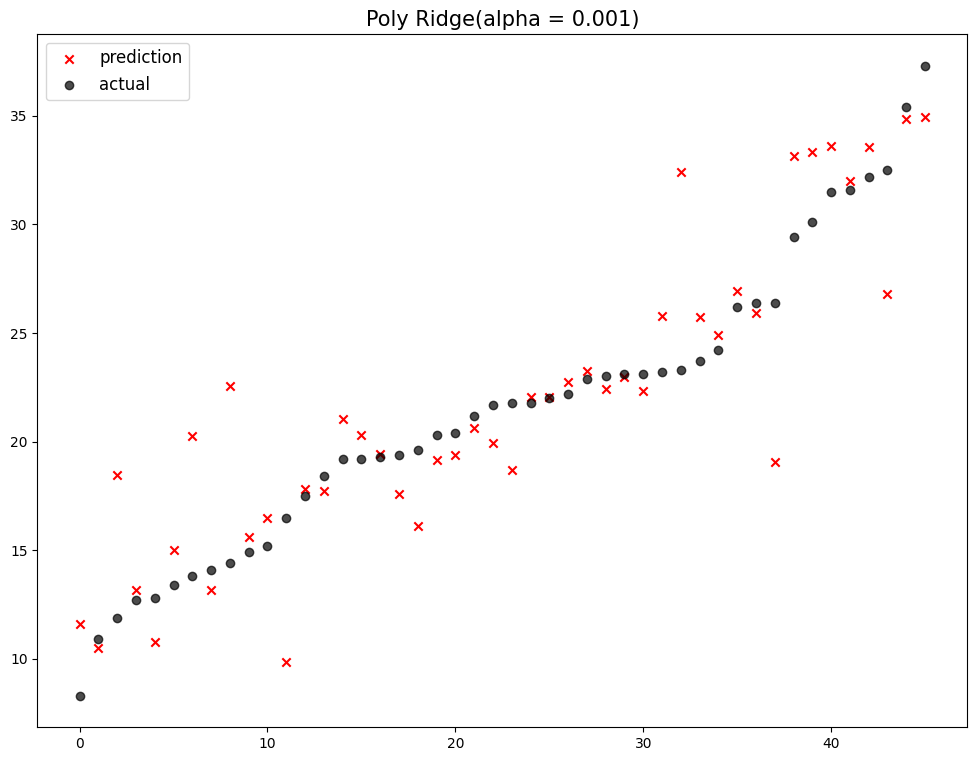


                                     model      rmse
0                   Poly Ridge(alpha = 10)  3.039876
1                 Poly Lasso(alpha = 0.01)  3.047416
2                    Poly Ridge(alpha = 1)  3.068883
3                Poly Lasso(alpha = 0.001)  3.125646
4                  Poly Ridge(alpha = 0.1)  3.151103
5               Poly Lasso(alpha = 0.0001)  3.160199
6                    Poly LinearRegression  3.189825
7                Poly Ridge(alpha = 0.001)  3.204278
8                 Poly Ridge(alpha = 0.01)  3.210819
9                  Poly Ridge(alpha = 100)  3.228619
10                 Poly Lasso(alpha = 0.1)  3.287681
11                        LinearRegression  3.535198
12                    Ridge(alpha = 0.0001  3.535199
13                     Ridge(alpha = 0.001  3.535208
14                      Ridge(alpha = 0.01  3.535306
15                   Lasso(alpha = 0.0001)  3.535439
16  ElasticNet(alpha=0.0001, l1_ratio=0.8)  3.535479
17  ElasticNet(alpha=0.0001, l1_ratio=0.5)  3

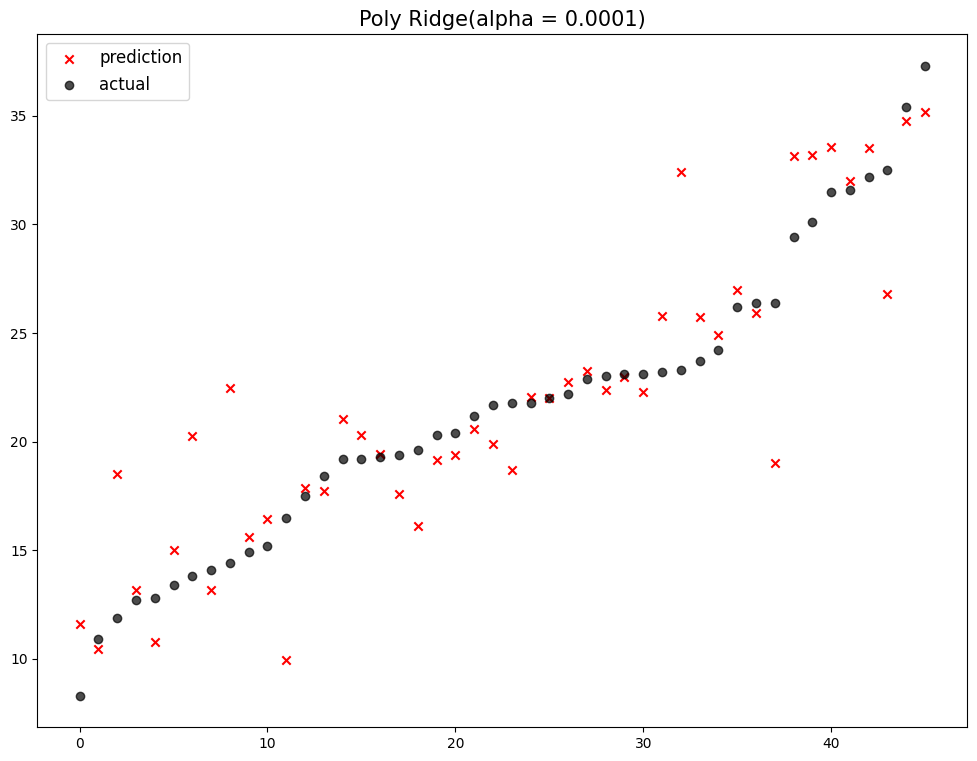


                                     model      rmse
0                   Poly Ridge(alpha = 10)  3.039876
1                 Poly Lasso(alpha = 0.01)  3.047416
2                    Poly Ridge(alpha = 1)  3.068883
3                Poly Lasso(alpha = 0.001)  3.125646
4                  Poly Ridge(alpha = 0.1)  3.151103
5               Poly Lasso(alpha = 0.0001)  3.160199
6                    Poly LinearRegression  3.189825
7               Poly Ridge(alpha = 0.0001)  3.192845
8                Poly Ridge(alpha = 0.001)  3.204278
9                 Poly Ridge(alpha = 0.01)  3.210819
10                 Poly Ridge(alpha = 100)  3.228619
11                 Poly Lasso(alpha = 0.1)  3.287681
12                        LinearRegression  3.535198
13                    Ridge(alpha = 0.0001  3.535199
14                     Ridge(alpha = 0.001  3.535208
15                      Ridge(alpha = 0.01  3.535306
16                   Lasso(alpha = 0.0001)  3.535439
17  ElasticNet(alpha=0.0001, l1_ratio=0.8)  3

In [42]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    # 모델 객체 생성
    poly_ridge = make_pipeline(
        PolynomialFeatures(degree = 2,include_bias = False),
        Ridge(alpha = alpha)
    )
    poly_ridge.fit(scaled_X_train,y_train) # 학습
    poly_ridge_pred = poly_ridge.predict(scaled_X_valid) # 예측
    rmse_eval('Poly Ridge(alpha = {})'.format(alpha),poly_ridge_pred,y_valid) # 평가 & 시각화

#### **d) ElasticNet**

In [43]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정
ratios = [0.2,0.5,0.8] # l1 규제 혼합 비율

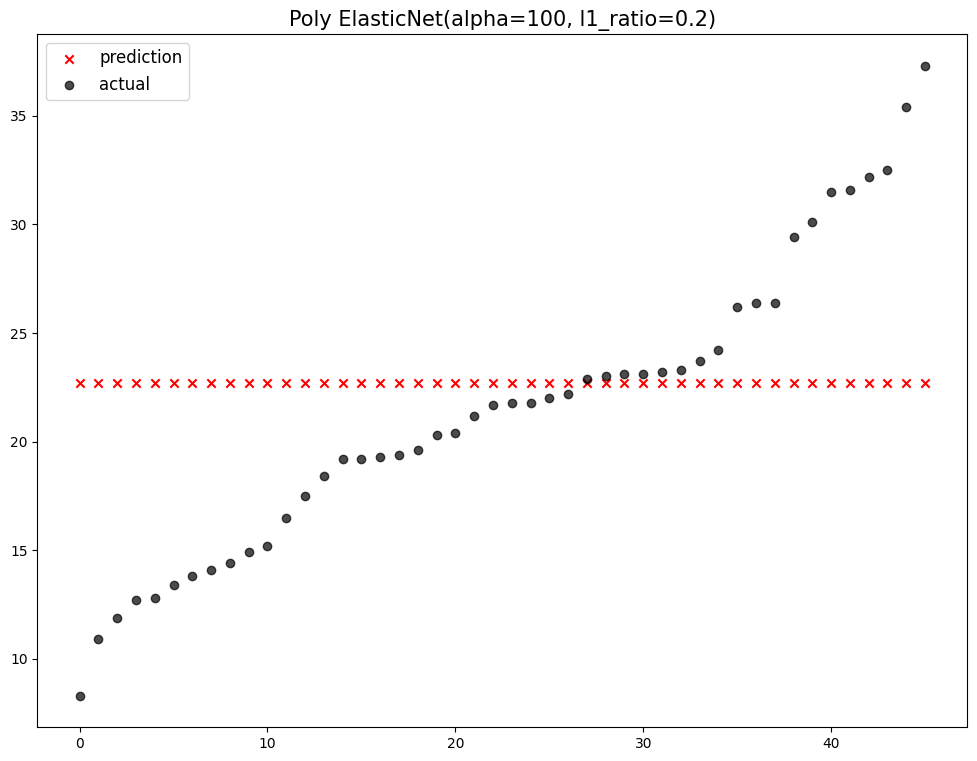


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3                  Poly Lasso(alpha = 0.001)  3.125646
4                    Poly Ridge(alpha = 0.1)  3.151103
5                 Poly Lasso(alpha = 0.0001)  3.160199
6                      Poly LinearRegression  3.189825
7                 Poly Ridge(alpha = 0.0001)  3.192845
8                  Poly Ridge(alpha = 0.001)  3.204278
9                   Poly Ridge(alpha = 0.01)  3.210819
10                   Poly Ridge(alpha = 100)  3.228619
11                   Poly Lasso(alpha = 0.1)  3.287681
12                          LinearRegression  3.535198
13                      Ridge(alpha = 0.0001  3.535199
14                       Ridge(alpha = 0.001  3.535208
15                        Ridge(alpha = 0.01  3.535306
16                     Lasso(alpha = 0.0001)  3.535439
17    Ela

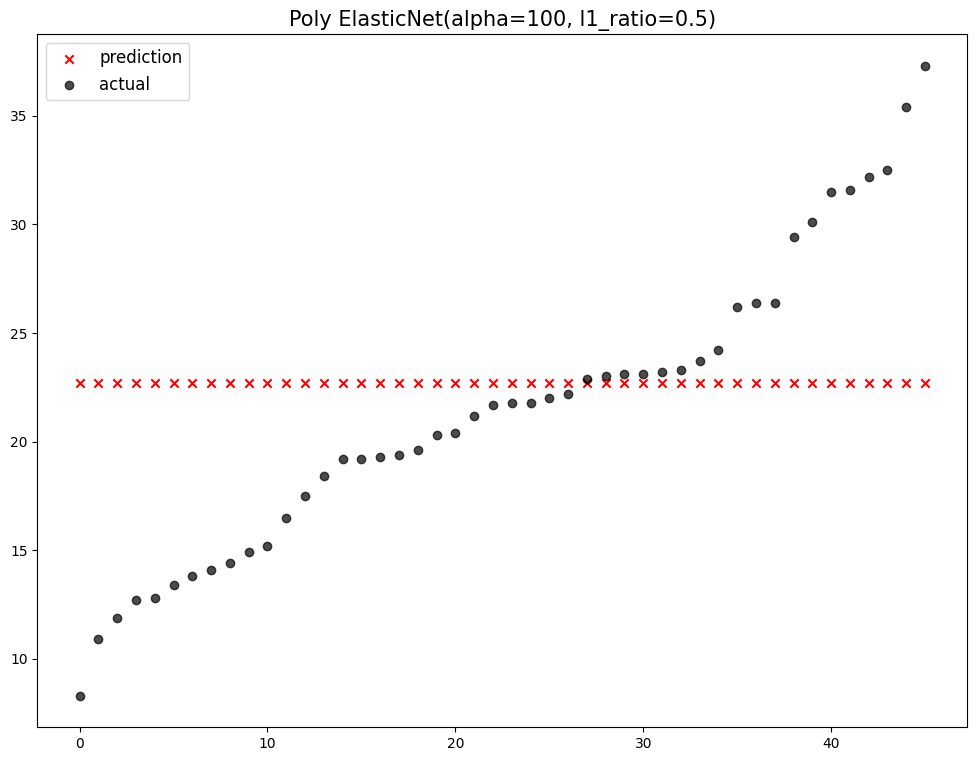


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3                  Poly Lasso(alpha = 0.001)  3.125646
4                    Poly Ridge(alpha = 0.1)  3.151103
5                 Poly Lasso(alpha = 0.0001)  3.160199
6                      Poly LinearRegression  3.189825
7                 Poly Ridge(alpha = 0.0001)  3.192845
8                  Poly Ridge(alpha = 0.001)  3.204278
9                   Poly Ridge(alpha = 0.01)  3.210819
10                   Poly Ridge(alpha = 100)  3.228619
11                   Poly Lasso(alpha = 0.1)  3.287681
12                          LinearRegression  3.535198
13                      Ridge(alpha = 0.0001  3.535199
14                       Ridge(alpha = 0.001  3.535208
15                        Ridge(alpha = 0.01  3.535306
16                     Lasso(alpha = 0.0001)  3.535439
17    Ela

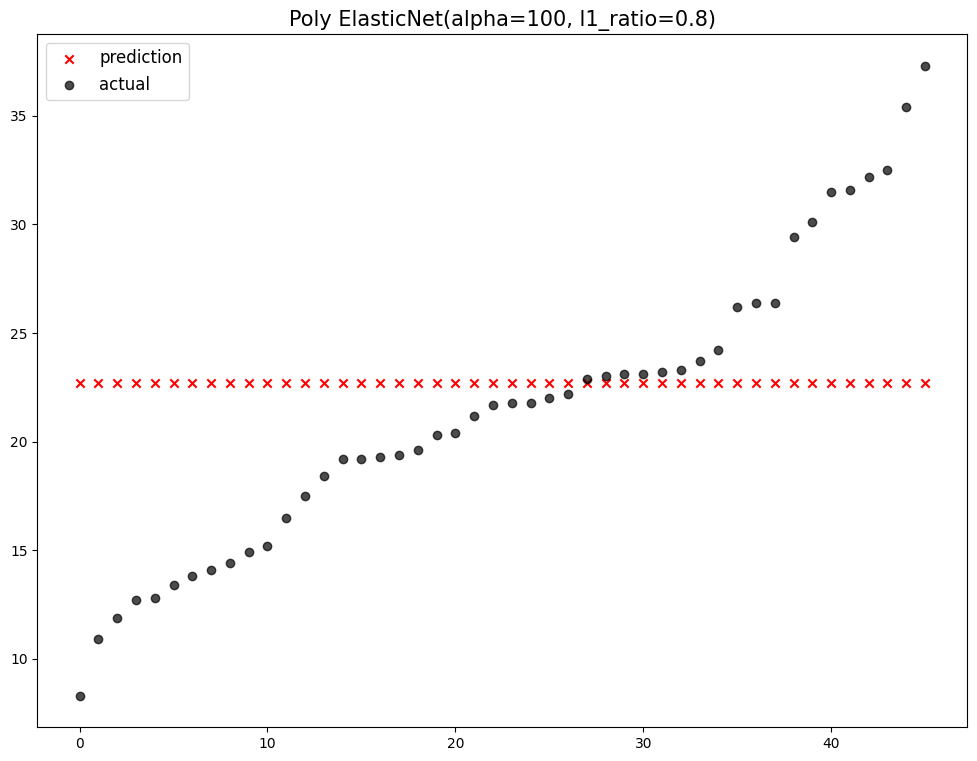


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3                  Poly Lasso(alpha = 0.001)  3.125646
4                    Poly Ridge(alpha = 0.1)  3.151103
5                 Poly Lasso(alpha = 0.0001)  3.160199
6                      Poly LinearRegression  3.189825
7                 Poly Ridge(alpha = 0.0001)  3.192845
8                  Poly Ridge(alpha = 0.001)  3.204278
9                   Poly Ridge(alpha = 0.01)  3.210819
10                   Poly Ridge(alpha = 100)  3.228619
11                   Poly Lasso(alpha = 0.1)  3.287681
12                          LinearRegression  3.535198
13                      Ridge(alpha = 0.0001  3.535199
14                       Ridge(alpha = 0.001  3.535208
15                        Ridge(alpha = 0.01  3.535306
16                     Lasso(alpha = 0.0001)  3.535439
17    Ela

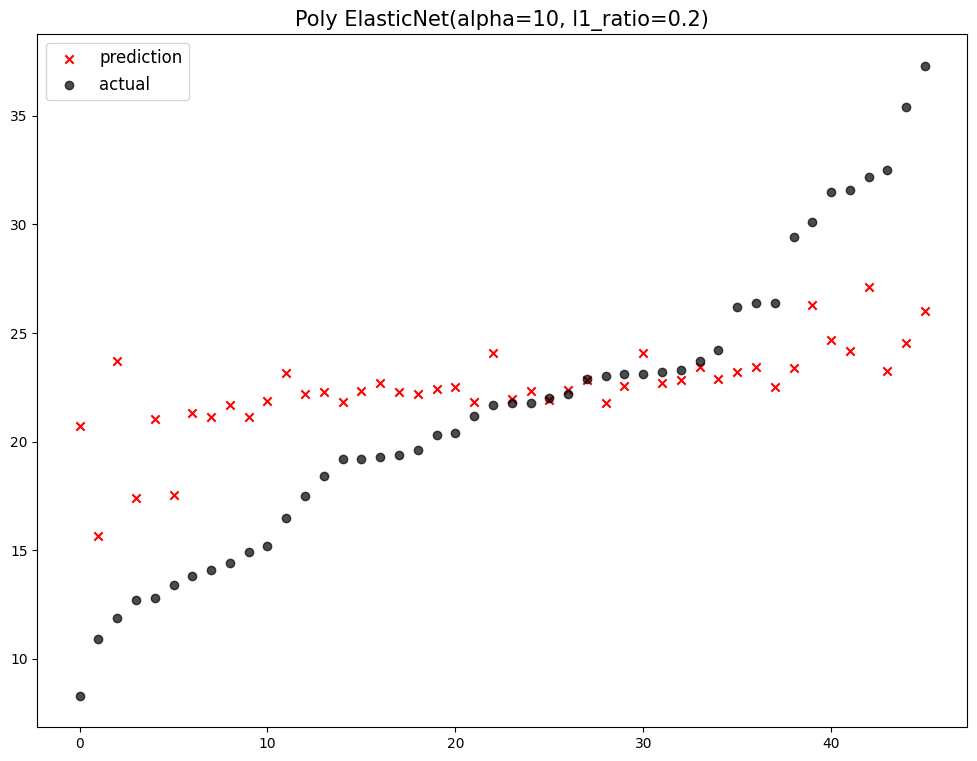


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3                  Poly Lasso(alpha = 0.001)  3.125646
4                    Poly Ridge(alpha = 0.1)  3.151103
5                 Poly Lasso(alpha = 0.0001)  3.160199
6                      Poly LinearRegression  3.189825
7                 Poly Ridge(alpha = 0.0001)  3.192845
8                  Poly Ridge(alpha = 0.001)  3.204278
9                   Poly Ridge(alpha = 0.01)  3.210819
10                   Poly Ridge(alpha = 100)  3.228619
11                   Poly Lasso(alpha = 0.1)  3.287681
12                          LinearRegression  3.535198
13                      Ridge(alpha = 0.0001  3.535199
14                       Ridge(alpha = 0.001  3.535208
15                        Ridge(alpha = 0.01  3.535306
16                     Lasso(alpha = 0.0001)  3.535439
17    Ela

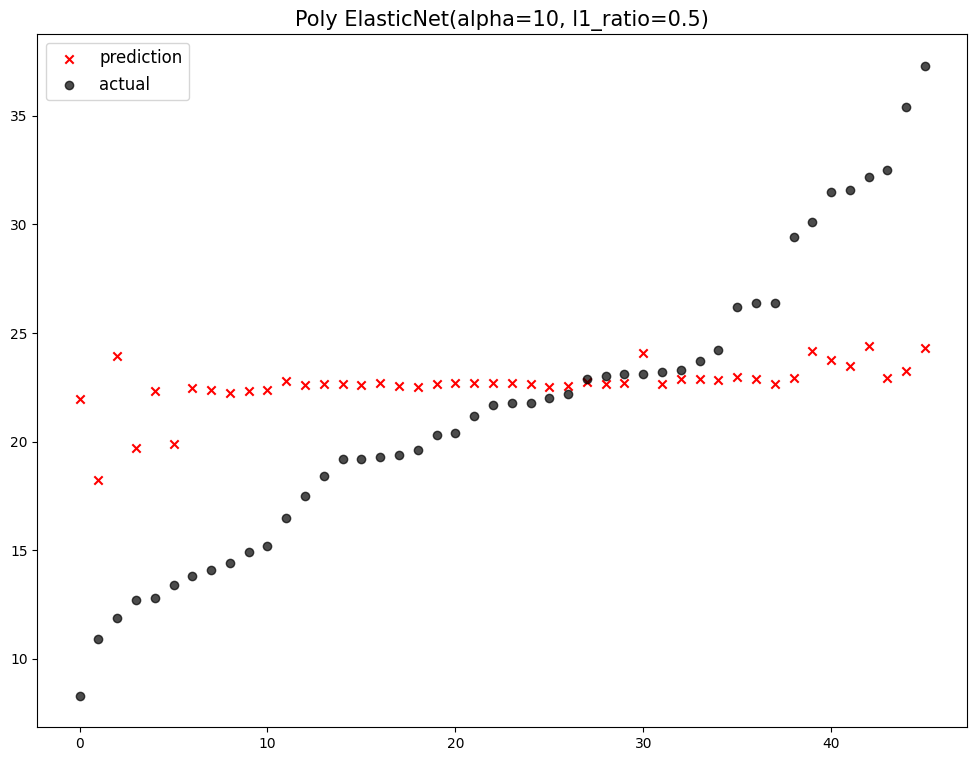


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3                  Poly Lasso(alpha = 0.001)  3.125646
4                    Poly Ridge(alpha = 0.1)  3.151103
5                 Poly Lasso(alpha = 0.0001)  3.160199
6                      Poly LinearRegression  3.189825
7                 Poly Ridge(alpha = 0.0001)  3.192845
8                  Poly Ridge(alpha = 0.001)  3.204278
9                   Poly Ridge(alpha = 0.01)  3.210819
10                   Poly Ridge(alpha = 100)  3.228619
11                   Poly Lasso(alpha = 0.1)  3.287681
12                          LinearRegression  3.535198
13                      Ridge(alpha = 0.0001  3.535199
14                       Ridge(alpha = 0.001  3.535208
15                        Ridge(alpha = 0.01  3.535306
16                     Lasso(alpha = 0.0001)  3.535439
17    Ela

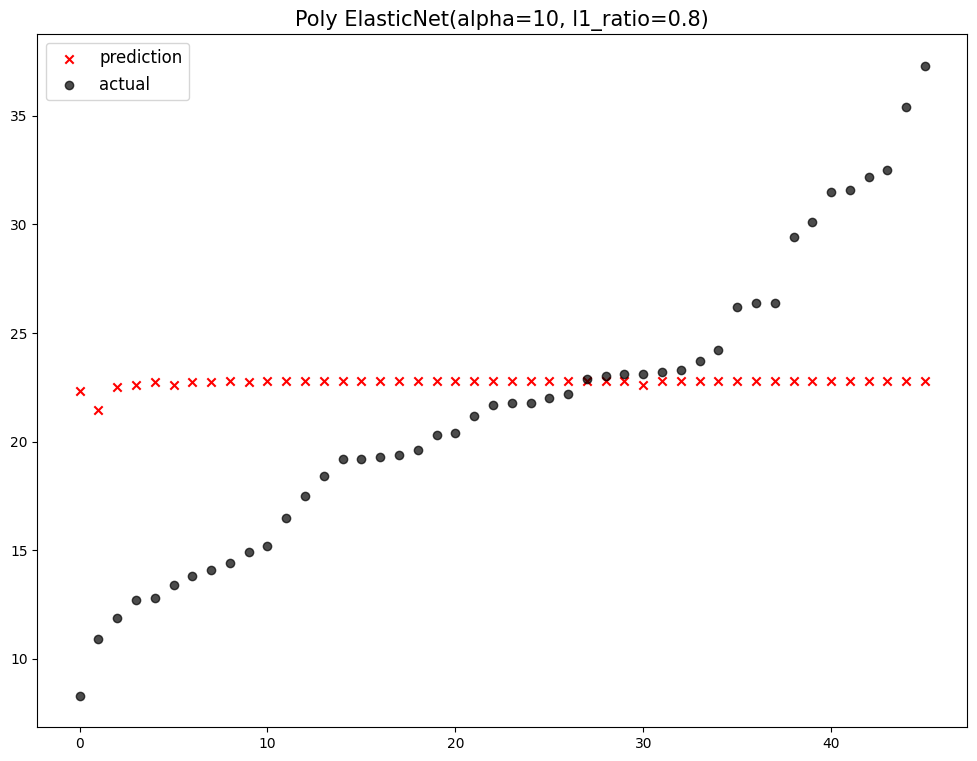


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3                  Poly Lasso(alpha = 0.001)  3.125646
4                    Poly Ridge(alpha = 0.1)  3.151103
5                 Poly Lasso(alpha = 0.0001)  3.160199
6                      Poly LinearRegression  3.189825
7                 Poly Ridge(alpha = 0.0001)  3.192845
8                  Poly Ridge(alpha = 0.001)  3.204278
9                   Poly Ridge(alpha = 0.01)  3.210819
10                   Poly Ridge(alpha = 100)  3.228619
11                   Poly Lasso(alpha = 0.1)  3.287681
12                          LinearRegression  3.535198
13                      Ridge(alpha = 0.0001  3.535199
14                       Ridge(alpha = 0.001  3.535208
15                        Ridge(alpha = 0.01  3.535306
16                     Lasso(alpha = 0.0001)  3.535439
17    Ela

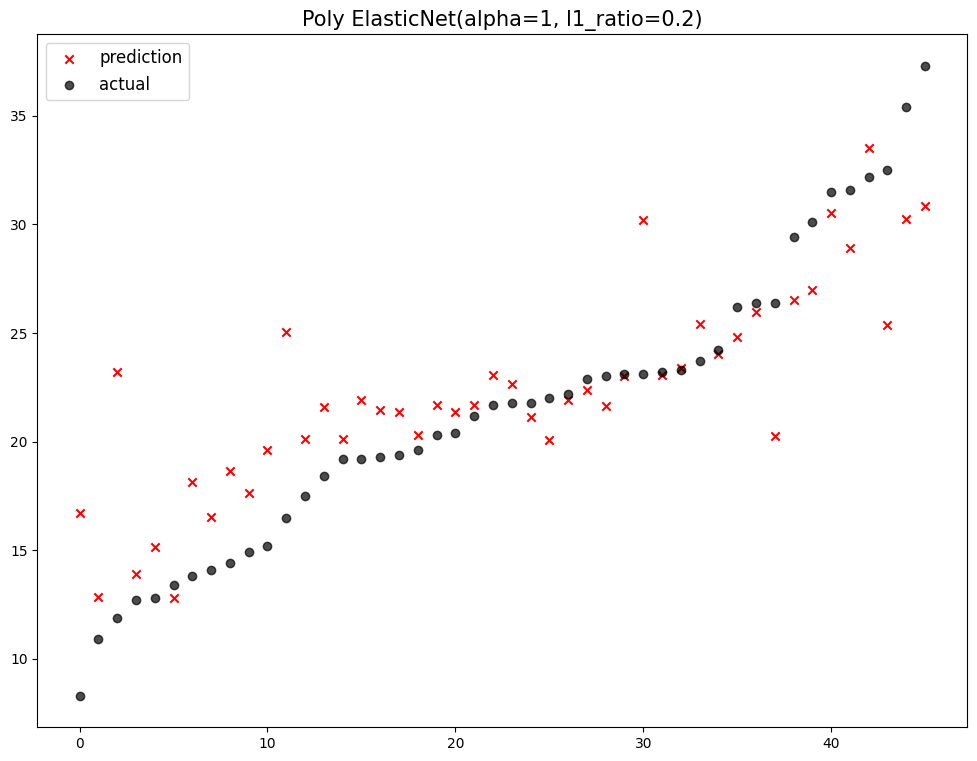


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3                  Poly Lasso(alpha = 0.001)  3.125646
4                    Poly Ridge(alpha = 0.1)  3.151103
5                 Poly Lasso(alpha = 0.0001)  3.160199
6                      Poly LinearRegression  3.189825
7                 Poly Ridge(alpha = 0.0001)  3.192845
8                  Poly Ridge(alpha = 0.001)  3.204278
9                   Poly Ridge(alpha = 0.01)  3.210819
10                   Poly Ridge(alpha = 100)  3.228619
11                   Poly Lasso(alpha = 0.1)  3.287681
12                          LinearRegression  3.535198
13                      Ridge(alpha = 0.0001  3.535199
14                       Ridge(alpha = 0.001  3.535208
15                        Ridge(alpha = 0.01  3.535306
16                     Lasso(alpha = 0.0001)  3.535439
17    Ela

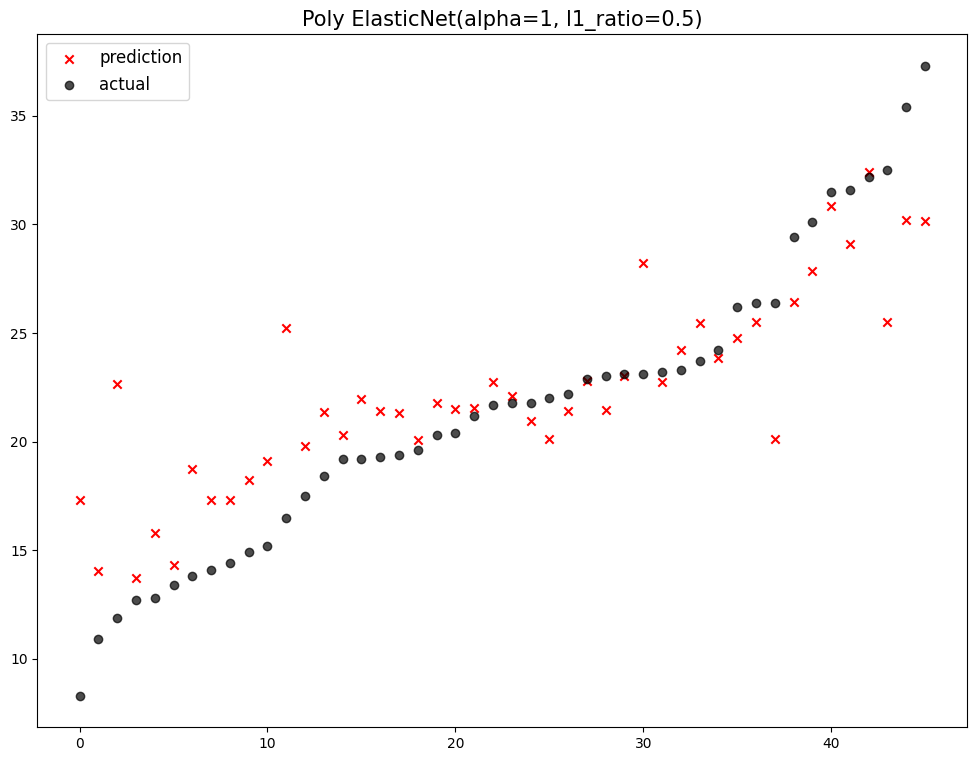


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3                  Poly Lasso(alpha = 0.001)  3.125646
4                    Poly Ridge(alpha = 0.1)  3.151103
5                 Poly Lasso(alpha = 0.0001)  3.160199
6                      Poly LinearRegression  3.189825
7                 Poly Ridge(alpha = 0.0001)  3.192845
8                  Poly Ridge(alpha = 0.001)  3.204278
9                   Poly Ridge(alpha = 0.01)  3.210819
10                   Poly Ridge(alpha = 100)  3.228619
11                   Poly Lasso(alpha = 0.1)  3.287681
12                          LinearRegression  3.535198
13                      Ridge(alpha = 0.0001  3.535199
14                       Ridge(alpha = 0.001  3.535208
15                        Ridge(alpha = 0.01  3.535306
16                     Lasso(alpha = 0.0001)  3.535439
17    Ela

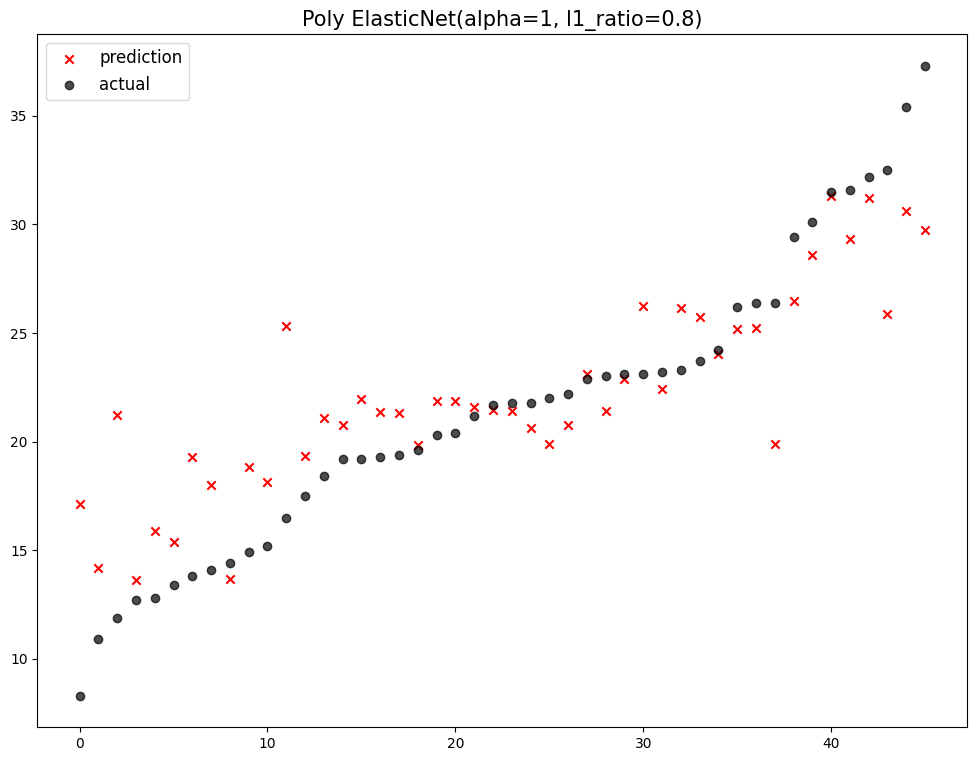


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3                  Poly Lasso(alpha = 0.001)  3.125646
4                    Poly Ridge(alpha = 0.1)  3.151103
5                 Poly Lasso(alpha = 0.0001)  3.160199
6                      Poly LinearRegression  3.189825
7                 Poly Ridge(alpha = 0.0001)  3.192845
8                  Poly Ridge(alpha = 0.001)  3.204278
9                   Poly Ridge(alpha = 0.01)  3.210819
10                   Poly Ridge(alpha = 100)  3.228619
11                   Poly Lasso(alpha = 0.1)  3.287681
12                          LinearRegression  3.535198
13                      Ridge(alpha = 0.0001  3.535199
14                       Ridge(alpha = 0.001  3.535208
15                        Ridge(alpha = 0.01  3.535306
16                     Lasso(alpha = 0.0001)  3.535439
17    Ela

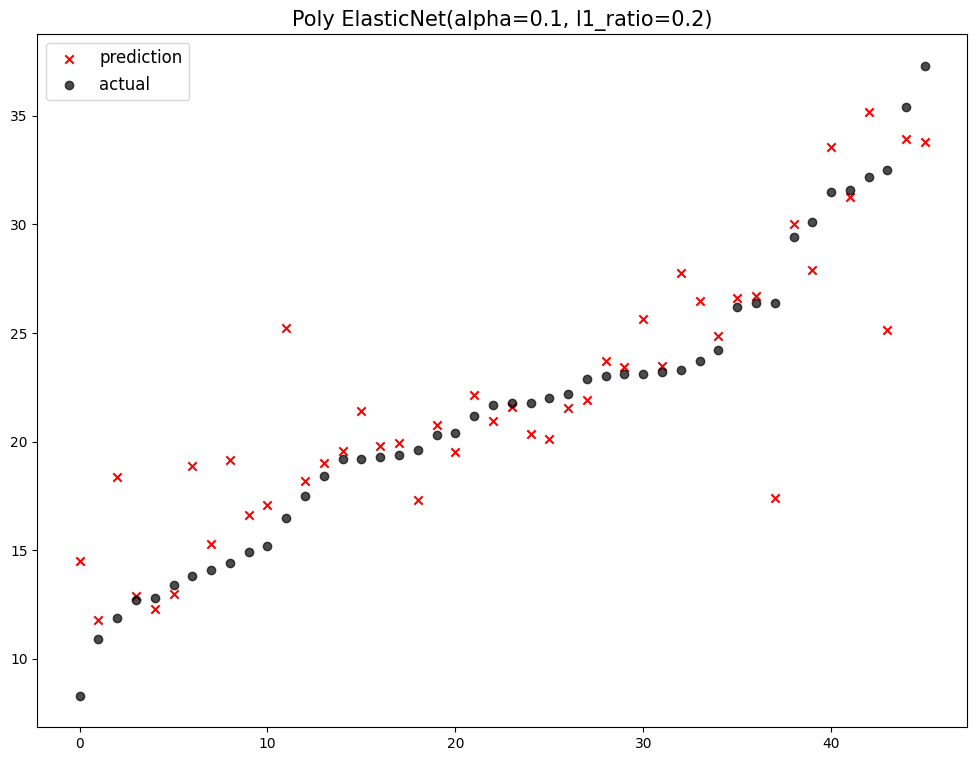


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3   Poly ElasticNet(alpha=0.1, l1_ratio=0.2)  3.090715
4                  Poly Lasso(alpha = 0.001)  3.125646
..                                       ...       ...
56        ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
57                   Poly Lasso(alpha = 100)  6.764249
58  Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
59  Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
60  Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[61 rows x 2 columns]


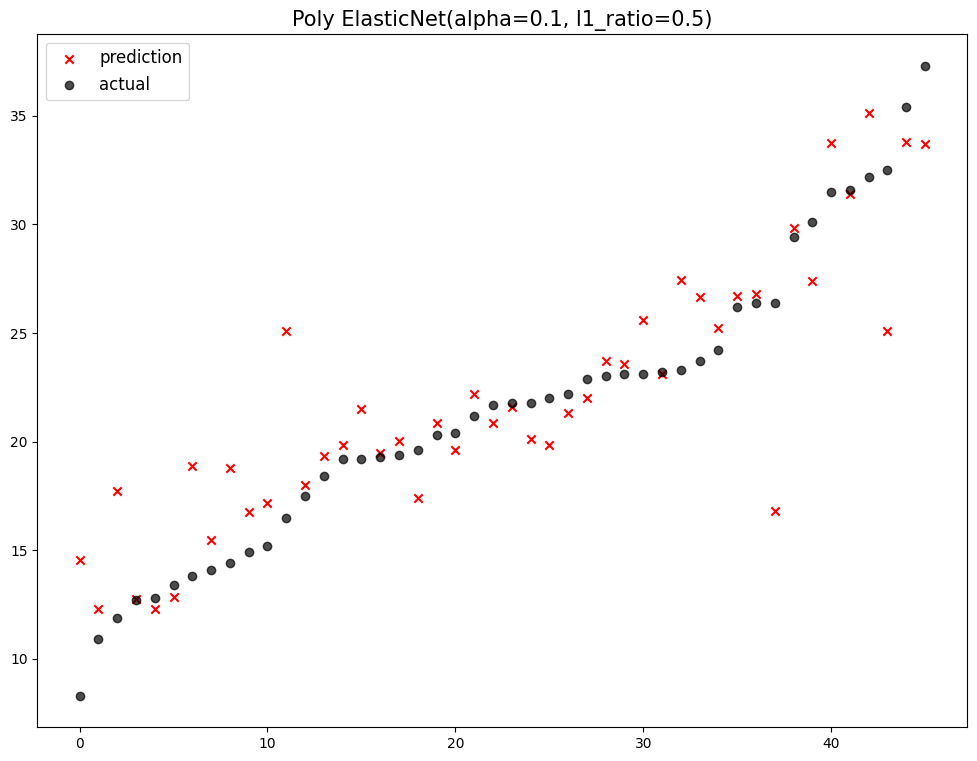


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3   Poly ElasticNet(alpha=0.1, l1_ratio=0.2)  3.090715
4   Poly ElasticNet(alpha=0.1, l1_ratio=0.5)  3.110444
..                                       ...       ...
57        ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
58                   Poly Lasso(alpha = 100)  6.764249
59  Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
60  Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
61  Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[62 rows x 2 columns]


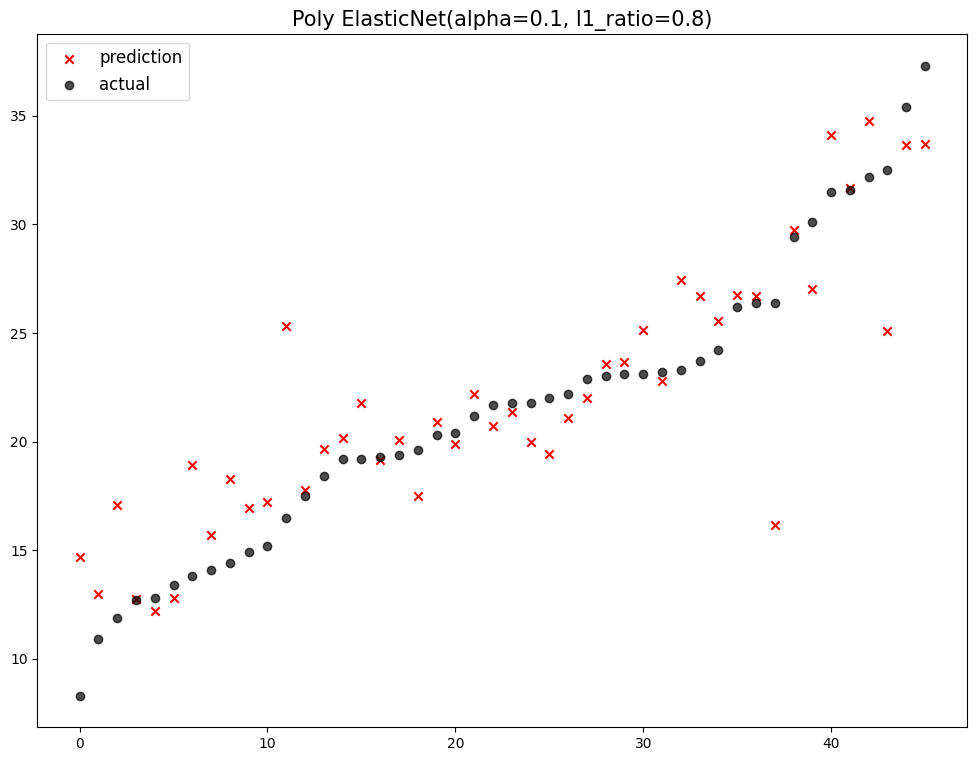


                                       model      rmse
0                     Poly Ridge(alpha = 10)  3.039876
1                   Poly Lasso(alpha = 0.01)  3.047416
2                      Poly Ridge(alpha = 1)  3.068883
3   Poly ElasticNet(alpha=0.1, l1_ratio=0.2)  3.090715
4   Poly ElasticNet(alpha=0.1, l1_ratio=0.5)  3.110444
..                                       ...       ...
58        ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
59                   Poly Lasso(alpha = 100)  6.764249
60  Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
61  Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
62  Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[63 rows x 2 columns]


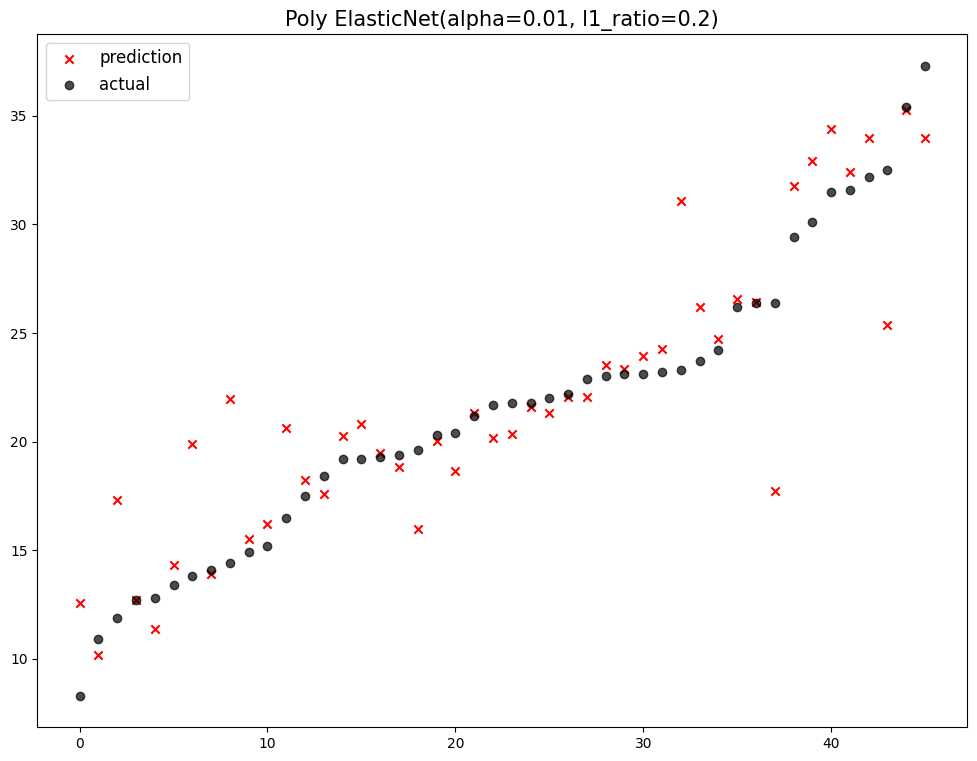


                                        model      rmse
0   Poly ElasticNet(alpha=0.01, l1_ratio=0.2)  3.031264
1                      Poly Ridge(alpha = 10)  3.039876
2                    Poly Lasso(alpha = 0.01)  3.047416
3                       Poly Ridge(alpha = 1)  3.068883
4    Poly ElasticNet(alpha=0.1, l1_ratio=0.2)  3.090715
..                                        ...       ...
59         ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
60                    Poly Lasso(alpha = 100)  6.764249
61   Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
62   Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
63   Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[64 rows x 2 columns]


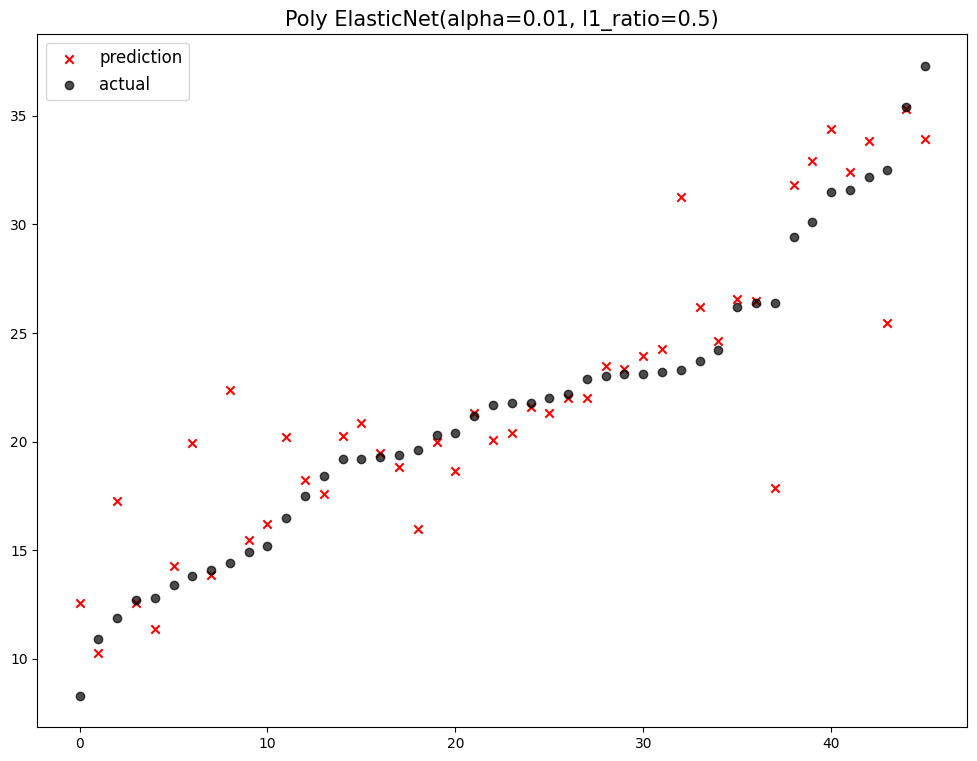


                                        model      rmse
0   Poly ElasticNet(alpha=0.01, l1_ratio=0.2)  3.031264
1                      Poly Ridge(alpha = 10)  3.039876
2   Poly ElasticNet(alpha=0.01, l1_ratio=0.5)  3.045711
3                    Poly Lasso(alpha = 0.01)  3.047416
4                       Poly Ridge(alpha = 1)  3.068883
..                                        ...       ...
60         ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
61                    Poly Lasso(alpha = 100)  6.764249
62   Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
63   Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
64   Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[65 rows x 2 columns]


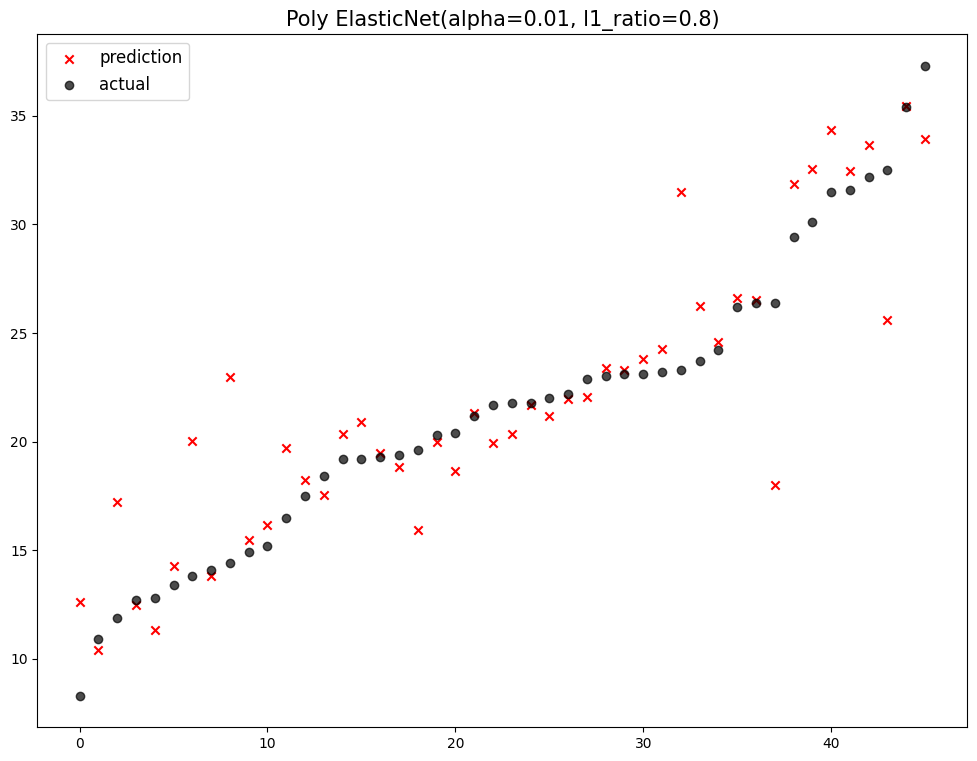


                                        model      rmse
0   Poly ElasticNet(alpha=0.01, l1_ratio=0.2)  3.031264
1                      Poly Ridge(alpha = 10)  3.039876
2   Poly ElasticNet(alpha=0.01, l1_ratio=0.5)  3.045711
3                    Poly Lasso(alpha = 0.01)  3.047416
4   Poly ElasticNet(alpha=0.01, l1_ratio=0.8)  3.060345
..                                        ...       ...
61         ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
62                    Poly Lasso(alpha = 100)  6.764249
63   Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
64   Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
65   Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[66 rows x 2 columns]


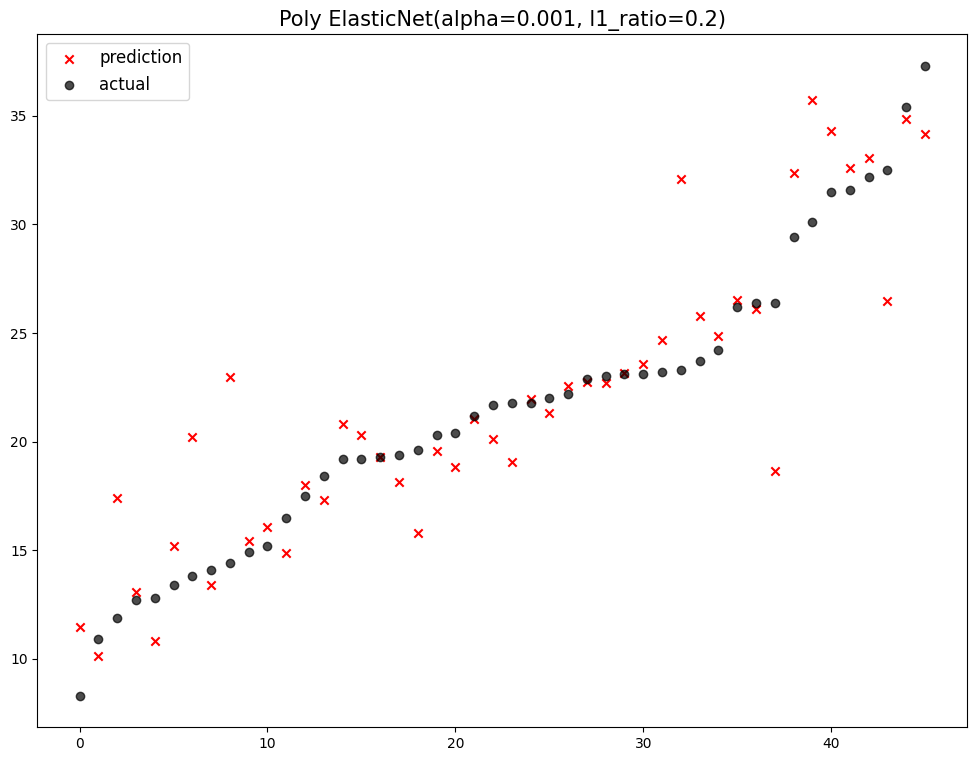


                                        model      rmse
0   Poly ElasticNet(alpha=0.01, l1_ratio=0.2)  3.031264
1                      Poly Ridge(alpha = 10)  3.039876
2   Poly ElasticNet(alpha=0.01, l1_ratio=0.5)  3.045711
3                    Poly Lasso(alpha = 0.01)  3.047416
4   Poly ElasticNet(alpha=0.01, l1_ratio=0.8)  3.060345
..                                        ...       ...
62         ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
63                    Poly Lasso(alpha = 100)  6.764249
64   Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
65   Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
66   Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[67 rows x 2 columns]


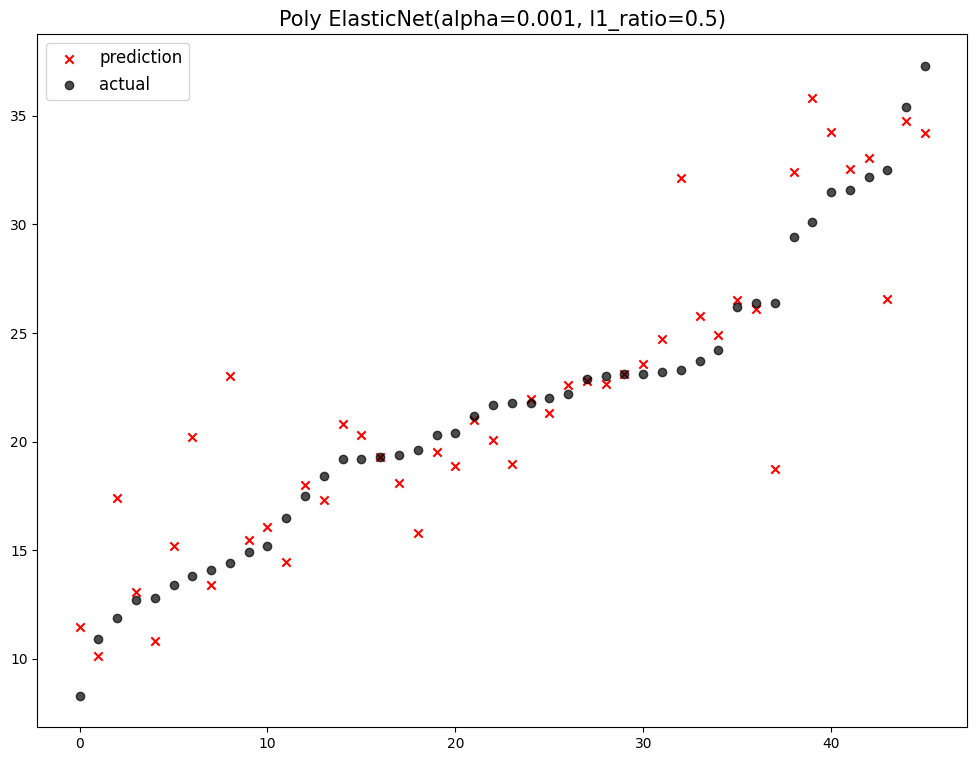


                                        model      rmse
0   Poly ElasticNet(alpha=0.01, l1_ratio=0.2)  3.031264
1                      Poly Ridge(alpha = 10)  3.039876
2   Poly ElasticNet(alpha=0.01, l1_ratio=0.5)  3.045711
3                    Poly Lasso(alpha = 0.01)  3.047416
4   Poly ElasticNet(alpha=0.01, l1_ratio=0.8)  3.060345
..                                        ...       ...
63         ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
64                    Poly Lasso(alpha = 100)  6.764249
65   Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
66   Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
67   Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[68 rows x 2 columns]


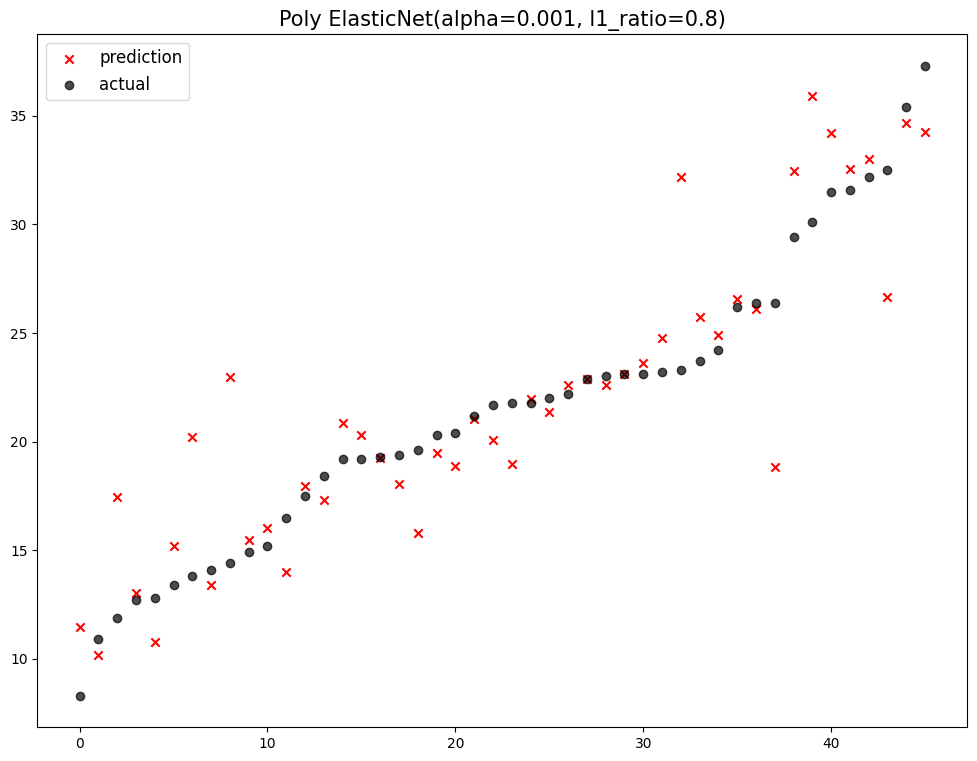


                                        model      rmse
0   Poly ElasticNet(alpha=0.01, l1_ratio=0.2)  3.031264
1                      Poly Ridge(alpha = 10)  3.039876
2   Poly ElasticNet(alpha=0.01, l1_ratio=0.5)  3.045711
3                    Poly Lasso(alpha = 0.01)  3.047416
4   Poly ElasticNet(alpha=0.01, l1_ratio=0.8)  3.060345
..                                        ...       ...
64         ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
65                    Poly Lasso(alpha = 100)  6.764249
66   Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
67   Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
68   Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[69 rows x 2 columns]


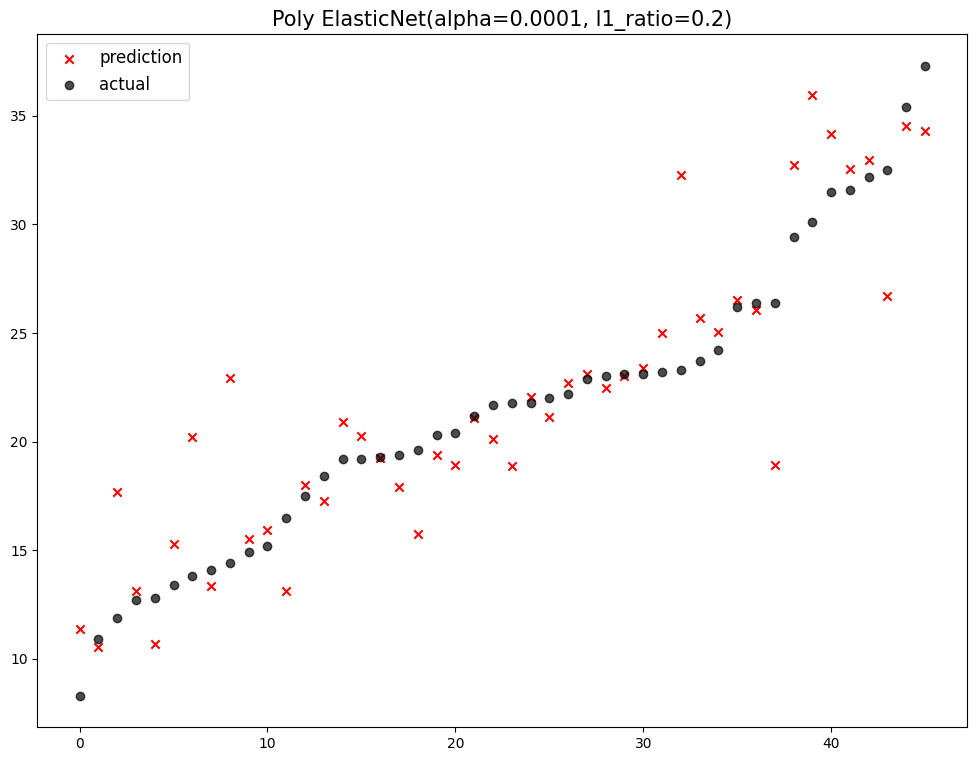


                                        model      rmse
0   Poly ElasticNet(alpha=0.01, l1_ratio=0.2)  3.031264
1                      Poly Ridge(alpha = 10)  3.039876
2   Poly ElasticNet(alpha=0.01, l1_ratio=0.5)  3.045711
3                    Poly Lasso(alpha = 0.01)  3.047416
4   Poly ElasticNet(alpha=0.01, l1_ratio=0.8)  3.060345
..                                        ...       ...
65         ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
66                    Poly Lasso(alpha = 100)  6.764249
67   Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
68   Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
69   Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[70 rows x 2 columns]


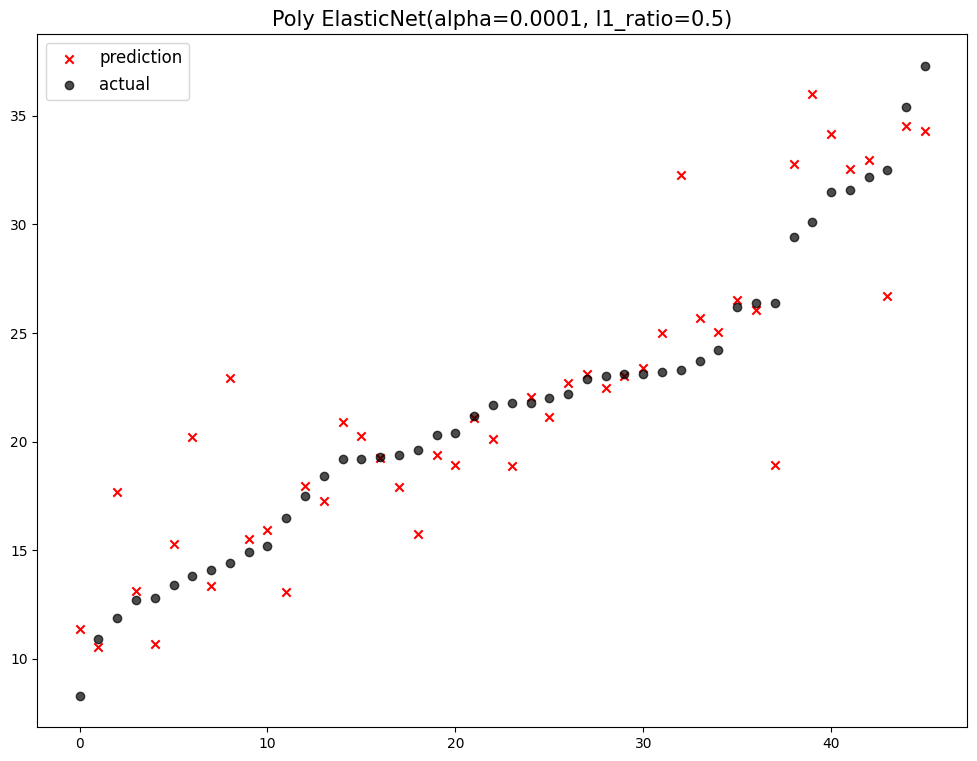


                                        model      rmse
0   Poly ElasticNet(alpha=0.01, l1_ratio=0.2)  3.031264
1                      Poly Ridge(alpha = 10)  3.039876
2   Poly ElasticNet(alpha=0.01, l1_ratio=0.5)  3.045711
3                    Poly Lasso(alpha = 0.01)  3.047416
4   Poly ElasticNet(alpha=0.01, l1_ratio=0.8)  3.060345
..                                        ...       ...
66         ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
67                    Poly Lasso(alpha = 100)  6.764249
68   Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
69   Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
70   Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[71 rows x 2 columns]


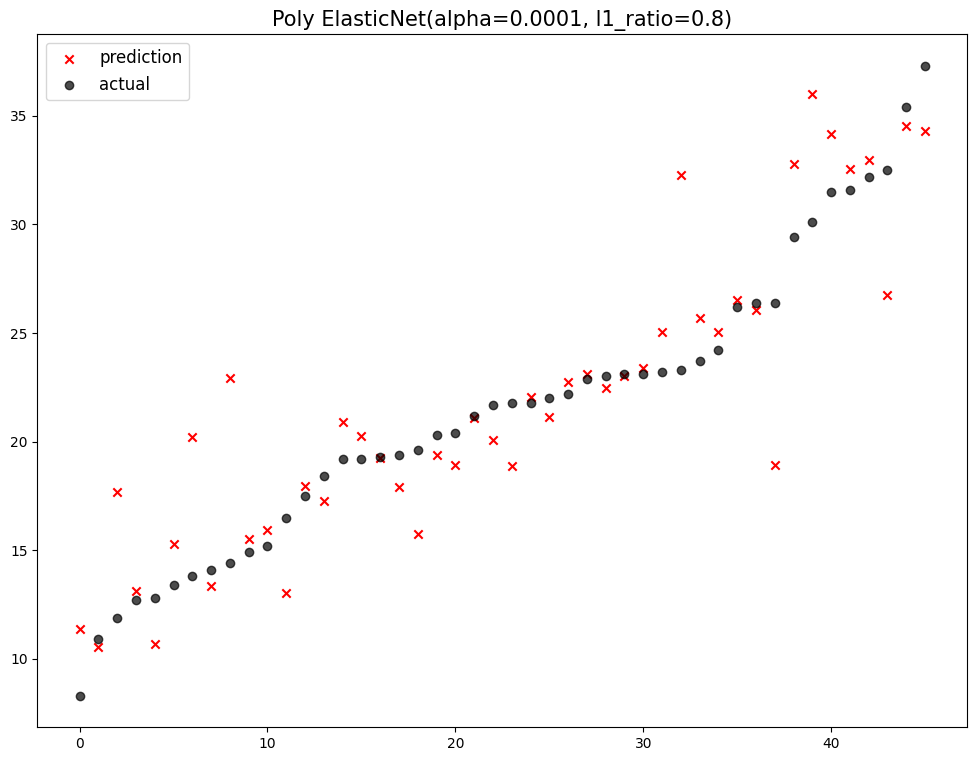


                                        model      rmse
0   Poly ElasticNet(alpha=0.01, l1_ratio=0.2)  3.031264
1                      Poly Ridge(alpha = 10)  3.039876
2   Poly ElasticNet(alpha=0.01, l1_ratio=0.5)  3.045711
3                    Poly Lasso(alpha = 0.01)  3.047416
4   Poly ElasticNet(alpha=0.01, l1_ratio=0.8)  3.060345
..                                        ...       ...
67         ElasticNet(alpha=10, l1_ratio=0.8)  6.764249
68                    Poly Lasso(alpha = 100)  6.764249
69   Poly ElasticNet(alpha=100, l1_ratio=0.2)  6.764249
70   Poly ElasticNet(alpha=100, l1_ratio=0.5)  6.764249
71   Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.764249

[72 rows x 2 columns]


In [44]:
for alpha in alphas: # 규제 강도를 조정해 가면서..
    for ratio in ratios: # 규제 혼합 비율을 조정해 가면서..
        # 모델 객체 생성
        poly_elasticnet = make_pipeline(
            PolynomialFeatures(degree = 2,include_bias = False),
            ElasticNet(alpha = alpha, l1_ratio = ratio)
        )
        poly_elasticnet.fit(scaled_X_train,y_train) # 학습
        poly_elasticnet_pred = poly_elasticnet.predict(scaled_X_valid) # 예측
        rmse_eval('Poly ElasticNet(alpha={}, l1_ratio={})'.format(alpha,ratio), poly_elasticnet_pred, y_valid) # 평가

### **5-7. 최종 회귀 모형 선택**

- RMSE 값이 가장 작은 **Poly ElasticNet(alpha=0.01, l1_ratio=0.2)** 모델이 가장 예측 성능이 좋은 회귀 모델이라 평가할 수 있다.

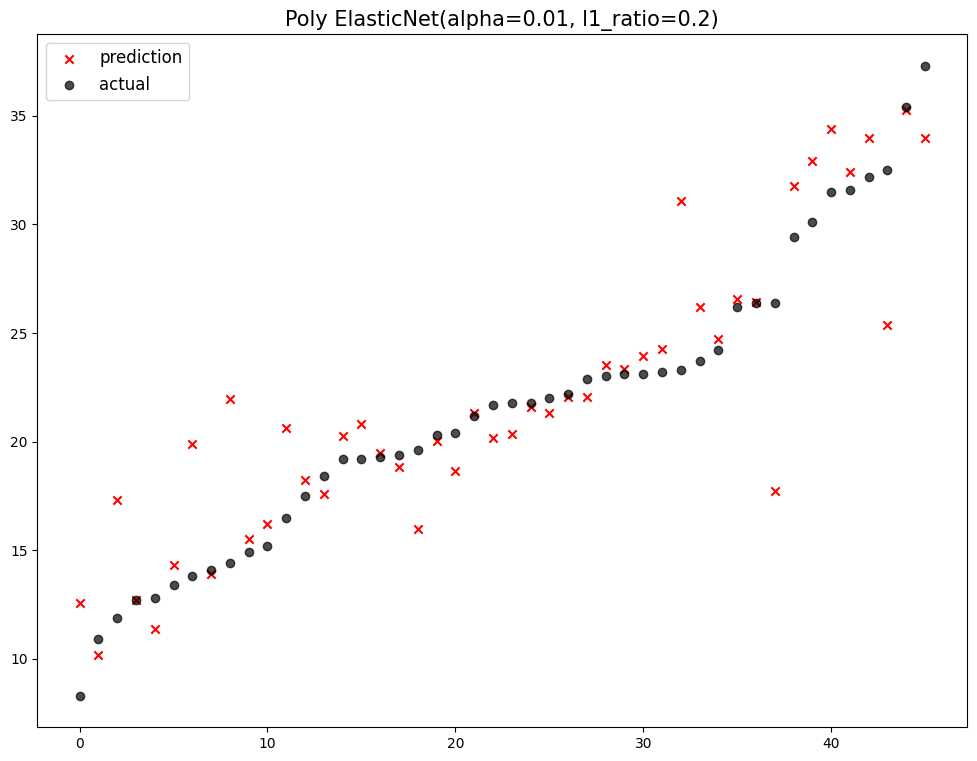

In [46]:
# 모델 객체 생성
poly_ela = make_pipeline(
    PolynomialFeatures(degree = 2,include_bias = False),
    ElasticNet(alpha = 0.01,l1_ratio = 0.2)
)
poly_ela.fit(scaled_X_train,y_train) # 학습
poly_ela_pred = poly_ela.predict(scaled_X_valid) # 예측

# **6. 제출 파일 생성**

In [47]:
### 정답 파일 예시 확인

submit = pd.read_csv('./datasets/sample_submission.csv')
submit.head(3) # 3개의 데이터만 확인

,ID,MEDV
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0


In [48]:
### 가장 성능이 좋았던 Poly ElasticNet(alpha = 100,l1_ratio = 0.5) 모델로 예측

submit['MEDV'] = poly_ela.predict(scaled_test)
submit.head()

,ID,MEDV
0,TEST_000,19.790139
1,TEST_001,49.746957
2,TEST_002,14.743592
3,TEST_003,21.836256
4,TEST_004,22.353599


In [49]:
### 제출 파일 저장

submit.to_csv('./submit_StandardScaler.csv', index=False)